# **Introduction**
Greetings and welcome to the documentation for the Sales Forecasting dataset.Within these pages,you will discover the feautues of this data ,helpful insights and answers to some relations and business questions that might help you in your decision making!

# **Data Source**

* The data for this project has been sourced from the Kaggle platform,a respected platform for sharing and discovering datasets across a wide range of fields.
* the dataset titled "Sales Forecasting" was uploaded in Kaggle 

#**Data Description**
* The dataset titled "Sales Forecasting" is a valuable repository of data, containing several important attributes that offer valuable insights into sales patterns.
* The dataset seems to provide insights into sales transactions, customer details, and product information

* Let's discover the fundamental columns, understand their significance, and grasp the types of data they hold.
 * **Order ID**: A unique identifier for each order placed.

 * **Order Date**: The date when the order was placed.

 * **Ship Date**: The date when the ordered items were shipped.

 * **Ship Mode**: The shipping mode chosen for the order (e.g., Second Class).

 * **Customer ID**: A unique identifier for each customer.

 * **Customer Name**: The name of the customer placing the order.

 * **Segment**: The market segment to which the customer belongs (e.g., Consumer, Corporate)

 * **Country**: The country where the order was placed (e.g., United States).

 * **City**: The city where the order was placed.

 * **State**: The state within the country where the order was placed.

 * **Postal Code**: The postal code associated with the order location.

 * **Region**: The region of the country where the order was placed (e.g., South, West).

 * **Product ID**: A unique identifier for each product.

 * **Category**: The broad category to which the product belongs (e.g., Furniture, Office Supplies).

 * **Sub-Category**: The specific sub-category to which the product belongs (e.g., Bookcases, Chairs)

 * **Product Name**: The name of the product ordered.

 * **Sales**: The sales amount associated with the order.

# Hypothesis tests 
    
   ### various hypotheses or questions to explore and analyze the data:
    
## Hypotheses to Explore in the Dataset:

1. **Sales Analysis by Region:**
   - Does sales performance vary significantly across different regions?
   - Which regions generate the highest and lowest sales?


2. **Impact of Discounts on Sales and Profits:**
   - Is there a correlation between the discount offered and the sales/profits?
   - Do higher discounts result in increased sales but reduced profits?


3. **Segment-based Analysis:**
   - Are there specific customer segments that contribute more to sales or profits?
   - Do certain segments respond differently to different shipping modes?


4. **Product Category Insights:**
   - Which product categories/sub-categories contribute the most to sales/profits?
   - Are there any specific products that significantly drive sales in certain regions?


5. **Shipping Analysis:**
   - Is there a relationship between the time taken to ship an order and customer satisfaction or sales?
   - Do different shipping modes affect sales in various regions differently?

6. **Customer Retention and Order Frequency:**
   - Are there recurring customers or patterns in customer orders over time?
   - Are there specific customer groups or cities that show higher order frequency?

7. **Profitability across States/Cities:**
   - Which states or cities show higher profitability in sales?
   - Are there specific products or categories more profitable in certain areas?

          
         


In [1610]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro
import numpy as np

# My Functions

In [1611]:
import matplotlib.pyplot as plt

def uni_cat_analysis(values, labels, title, feature):
    print('\n', '-' * 25, 'Value count % ', '-' * 25)
    print(df[feature].value_counts(normalize=True) * 100)
    print('\n', '-' * 25, 'Describe', '-' * 25)
    print(df[feature].describe())
    
    plt.figure(figsize=(15, 6))

    # Create a pie chart
    plt.subplot(121)
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')

    # Create a horizontal bar plot
    plt.subplot(122)
    plt.barh(labels, values)
    plt.xlabel('Number of Sales')
    plt.title(title + ' (Bar Plot)')

    plt.tight_layout()
    plt.show()
    
#-----------------------------------------------------------------
    
# create an entry to store the data
def store_results(name, y_pred, y_train, X_train, y_pred_test, y_test, X_test, model, folds, norm, Alpha):

    """    creates and entry to add to the resuts dataframe
    name: name of the model 
    y_pred: predicted y 
    y_train: true value of y
    X_train: features 
    model: model to be fit
    folds: number of folds in cv
    norm: L1 or L2
    Alpha: Value of regularization parameter"""
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train) # predictions on the train set.
    r2_val = r2_score(y_train,y_pred)
    r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
    rmse_error = mean_squared_error (y_train, y_pred, squared = False)
    y_pred_test = model.predict(X_test)
    r2_val_test = r2_score(y_test,y_pred_test)
    r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
    rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
    crossvalidation = cross_val_score(model, X_train, y_train, cv=folds, n_jobs=-1)
    
    entry = {'Model': [name],
         'R2Score': [r2_val],
         'Adjusted_R2Score': [r2_adj_val],
         'RMSE': [rmse_error],
         'R2Score_Test': [r2_val_test],
         'Adjusted_R2Score_test': [r2_adj_val_test],
         'RMSE_Test': [rmse_error_test],
          'CrossVal_Mean(r2)': [crossvalidation.mean()],           
          'CrossVal1(r2)': [crossvalidation[0]],
          'CrossVal2(r2)': [crossvalidation[1]],
          'CrossVal3(r2)': [crossvalidation[2]],
          'CrossVal4(r2)': [crossvalidation[3]],
          'CrossVal5(r2)': [crossvalidation[4]],
          }


    result = pd.DataFrame(entry)
    return result


encodings = ['utf-8', 'ISO-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv('Sample - Superstore.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass


rows = 9900 
cols = 4
num_nulls = 700
ata = np.random.rand(100, 5)
data
indices_to_null = [(random.randint(0, rows - 1), random.randint(4, 4)) for _ in range(num_nulls)]
for row, col in indices_to_null:
    df.iloc[row, col] = None

rows = 9900 
cols = 4
num_nulls = 700
ata = np.random.rand(100, 5)
data
indices_to_null = [(random.randint(0, rows - 1), random.randint(12,12)) for _ in range(num_nulls)]
for row, col in indices_to_null:
    df.iloc[row, col] = None

rows = 9900 
cols = 4
num_nulls = 450
ata = np.random.rand(100, 5)
data
indices_to_null = [(random.randint(0, rows - 1), random.randint(15,15)) for _ in range(num_nulls)]
for row, col in indices_to_null:
    df.iloc[row, col] = None

rows = 9900 
cols = 4
num_nulls = 450
ata = np.random.rand(100, 5)
data
indices_to_null = [(random.randint(0, rows - 1), random.randint(18,18)) for _ in range(num_nulls)]
for row, col in indices_to_null:
    df.iloc[row, col] = None

df.isnull().sum()

df.to_csv('Superstore.csv',index=False)

In [1612]:
df=pd.read_csv('Superstore.csv')
pd.options.display.float_format = "{:.2f}".format

In [1613]:
df.shape

(9994, 21)

In [1614]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016             NaN    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name  Sales  Quantity  \
0                  Bush Somerset Collection Bookcase 261.96      2.00   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,... 731.94      3.00   
2  Self-Adhesive Address Labels for Typewriters b...  14.62      2.00   
3      Bretford CR4500 Series Slim Rectangular Table 957.58      5.00   
4                     Eldon Fold 'N Roll Cart System  22.37      2.00   

   Discount  Profit  
0      0.00   41.91  
1      0.00  219.58  
2      0.00    6.87  
3      0.45 -383.03  
4      0.20    2.52

In [1615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9322 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9314 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9552 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [1616]:
#Rename sub-category since it contains '-'

df.rename(columns={'Sub-Category' : 'SubCategory'},inplace=True)
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'SubCategory',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Converting Order Date and Ship Date to date format 

In [1617]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

## Converting Postal code to Object

In [1618]:
df['Postal Code'].dtypes

dtype('int64')

In [1619]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [1620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9322 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9314 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  SubCategory    9552 n

In [1621]:
df.Country.value_counts()

Country
United States    9994
Name: count, dtype: int64

# Dropping Irrelevant Feature
## The features Country and Row ID are unuseable so i drop them first 

In [1622]:
df.drop(columns=['Row ID','Country'],inplace=True)

In [1623]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'SubCategory', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Handling Duplicated Values 

In [1624]:
df_nodup = df.drop_duplicates()

In [1625]:
print('Number of dropped duplicated :' , df.shape[0]-df_nodup.shape[0])

Number of dropped duplicated : 0


# Handling Missing Values

In [1626]:
df.isnull().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode        672
Customer ID        0
Customer Name      0
Segment            0
City               0
State              0
Postal Code        0
Region           680
Product ID         0
Category           0
SubCategory      442
Product Name       0
Sales              0
Quantity         443
Discount           0
Profit             0
dtype: int64

## Plot missnig value 

<Axes: >

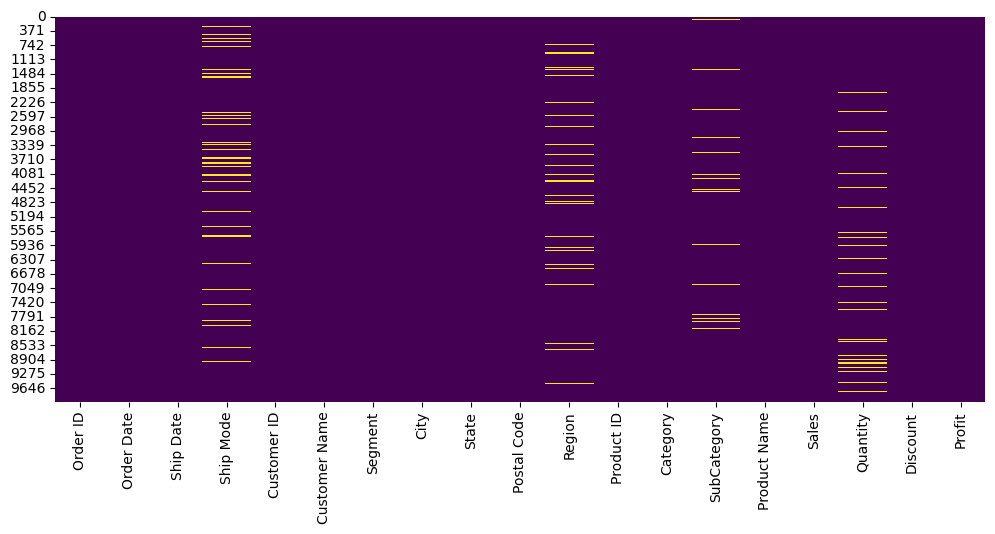

In [1627]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

## Calculate the missing value percentage for thos feature having missing value

In [1628]:
from colorama import Fore, Style
def pcnt_miss_values(df):
    col_names = df.columns
    print('\nThe percentage of miss values for those columns having missing value  \n')
    for col in col_names:
        n_value = df[col].isnull().sum()
        if n_value>0 :
            null_pcnt = round((n_value / df.shape[0])*100 , 2) 
            print(Fore.RED + Style.BRIGHT+'----> The percentage of null values for column {0} is {1} % \n '.format(df[col].name , null_pcnt))

In [1629]:
pcnt_miss_values(df)


The percentage of miss values for those columns having missing value  

----> The percentage of null values for column Ship Mode is 6.72 % 
 
----> The percentage of null values for column Region is 6.8 % 
 
----> The percentage of null values for column SubCategory is 4.42 % 
 
----> The percentage of null values for column Quantity is 4.43 % 
 


# Trying to impute Ship Mode 
    First I impute this feature with the mode of each category based on Order ID , if the feature Ship Mode is Null for that Order ID then I impute with the Mode of whole column
    

In [1630]:
# Find those order id having mode in Ship Mode and assign mode to it
grouped_modes = df.groupby('Order ID')['Ship Mode'].apply(lambda x : x.mode()[0] if not x.mode().empty else None)
df1=pd.DataFrame(grouped_modes.reset_index())
df1[df1['Ship Mode'].isnull()]

Order ID Ship Mode
11    CA-2014-100881      None
21    CA-2014-101462      None
22    CA-2014-101476      None
47    CA-2014-103373      None
80    CA-2014-105872      None
...              ...       ...
4890  US-2017-136784      None
4902  US-2017-141509      None
4940  US-2017-151316      None
4941  US-2017-152002      None
4960  US-2017-157224      None

[162 rows x 2 columns]

In [1631]:
# for other missing ship mode which are not having mode in order ID , define mode of the column
df1.loc[df1['Ship Mode'].isnull(),'Ship Mode'] = df['Ship Mode'].mode()[0]

In [1632]:
df1.loc[df1['Ship Mode'].isnull(),'Ship Mode']

Series([], Name: Ship Mode, dtype: object)

In [1633]:
order_id_ship_mode_map = df1.set_index('Order ID')['Ship Mode'].to_dict()

# Fill the NaN values in df['Ship Mode'] using the mapping from df1 based on 'Order ID'
df['Ship Mode'] = df['Ship Mode'].fillna(df['Order ID'].map(order_id_ship_mode_map))


In [1634]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    6040
Second Class      1906
First Class       1513
Same Day           535
Name: count, dtype: int64

In [1635]:
df.isnull().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
City               0
State              0
Postal Code        0
Region           680
Product ID         0
Category           0
SubCategory      442
Product Name       0
Sales              0
Quantity         443
Discount           0
Profit             0
dtype: int64

## Handling Region missing value
    I impute it using Region feature
    I create a dictionary based on state and region using set_index , in default it returns last value , if there is any null value it goes to the last and will put into dictionary , to avoid this issue first i sort it and put null value at the top of the list using na_position='first'  

In [1636]:
df.Region.value_counts()

Region
West       2978
East       2659
Central    2167
South      1510
Name: count, dtype: int64

In [1637]:
df.loc[df.State=='Texas','Region'].value_counts()

Region
Central    906
Name: count, dtype: int64

In [1638]:
 state_region_dict = df.set_index('State')['Region'].sort_values(na_position='first').to_dict()

In [1639]:
state_region_dict

{'Texas': 'Central',
 'Utah': 'West',
 'New York': 'East',
 'California': 'West',
 'Minnesota': 'Central',
 'Delaware': 'East',
 'Wisconsin': 'Central',
 'Ohio': 'East',
 'Michigan': 'Central',
 'Tennessee': 'South',
 'Illinois': 'Central',
 'New Jersey': 'East',
 'Florida': 'South',
 'Washington': 'West',
 'Colorado': 'West',
 'Georgia': 'South',
 'Montana': 'West',
 'Virginia': 'South',
 'Pennsylvania': 'East',
 'Kentucky': 'South',
 'Arizona': 'West',
 'Arkansas': 'South',
 'Nevada': 'West',
 'Massachusetts': 'East',
 'North Carolina': 'South',
 'District of Columbia': 'East',
 'Maryland': 'East',
 'Missouri': 'Central',
 'Mississippi': 'South',
 'New Hampshire': 'East',
 'Indiana': 'Central',
 'South Carolina': 'South',
 'Oregon': 'West',
 'Alabama': 'South',
 'Kansas': 'Central',
 'Oklahoma': 'Central',
 'Nebraska': 'Central',
 'Louisiana': 'South',
 'Maine': 'East',
 'Rhode Island': 'East',
 'Idaho': 'West',
 'Connecticut': 'East',
 'Vermont': 'East',
 'South Dakota': 'Central',


In [1640]:
df.loc[df.Region.isnull(),['Region','State']]

Region       State
14      NaN       Texas
24      NaN        Utah
38      NaN       Texas
55      NaN    New York
90      NaN  California
...     ...         ...
9816    NaN     Florida
9835    NaN       Texas
9844    NaN    Illinois
9850    NaN    New York
9897    NaN        Ohio

[680 rows x 2 columns]

In [1641]:
df2=df.copy()

In [1642]:
df2.loc[df2['Region'].isnull(),'Region'] 

14      NaN
24      NaN
38      NaN
55      NaN
90      NaN
       ... 
9816    NaN
9835    NaN
9844    NaN
9850    NaN
9897    NaN
Name: Region, Length: 680, dtype: object

In [1643]:
df2.loc[df2.Region.isnull(),['Region','State']]

Region       State
14      NaN       Texas
24      NaN        Utah
38      NaN       Texas
55      NaN    New York
90      NaN  California
...     ...         ...
9816    NaN     Florida
9835    NaN       Texas
9844    NaN    Illinois
9850    NaN    New York
9897    NaN        Ohio

[680 rows x 2 columns]

### check if there is any null value in dictionary

In [1644]:
for key, value in state_region_dict.items():
    if pd.isnull(value):
        print(f"Key: {key} has a None value.")

In [1645]:
df2['Region'].fillna(df2['State'].map(state_region_dict),inplace=True)

In [1646]:
df2.isnull().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
SubCategory      442
Product Name       0
Sales              0
Quantity         443
Discount           0
Profit             0
dtype: int64

In [1647]:
df=df2.copy()

# Handle missing values for Sub-Category

### lets take a look on category feature
    can not impute using category since it has several values

In [1648]:
df[df.Category=='Furniture']

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
10    CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
...              ...        ...        ...             ...         ...   
9962  CA-2015-168088 2015-03-19 2015-03-22     First Class    CM-12655   
9964  CA-2016-146374 2016-12-05 2016-12-10    Second Class    HE-14800   
9980  US-2015-151435 2015-09-06 2015-09-09    Second Class    SW-20455   
9989  CA-2014-110422 2014-01-21 2014-01-23    Second Class    TB-21400   
9990  CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   

         Customer Name      Segment             City       State Postal Code  \
0          Claire Gute     Consumer        Henderson    Kentucky       42420   
1          Claire Gute     Consumer        Henderson    Kentucky       42420   
3       Sean O'Donnell     Consumer  Fort Lauderdale     Florida       33311   
5      Brosina Hoffman     Consumer      Los Angeles  California       90032   
10     Brosina Hoffman     Consumer      Los Angeles  California       90032   
...                ...          ...              ...         ...         ...   
9962  Corinna Mitchell  Home Office          Houston       Texas       77041   
9964      Harold Engle    Corporate           Newark    Delaware       19711   
9980       Shaun Weien     Consumer        Lafayette   Louisiana       70506   
9989  Tom Boeckenhauer     Consumer            Miami     Florida       33180   
9990       Dave Brooks     Consumer       Costa Mesa  California       92627   

       Region       Product ID   Category  SubCategory  \
0       South  FUR-BO-10001798  Furniture    Bookcases   
1       South  FUR-CH-10000454  Furniture       Chairs   
3       South  FUR-TA-10000577  Furniture       Tables   
5        West  FUR-FU-10001487  Furniture          NaN   
10       West  FUR-TA-10001539  Furniture       Tables   
...       ...              ...        ...          ...   
9962  Central  FUR-BO-10004218  Furniture    Bookcases   
9964     East  FUR-FU-10002671  Furniture  Furnishings   
9980    South  FUR-TA-10001039  Furniture       Tables   
9989    South  FUR-FU-10001889  Furniture  Furnishings   
9990     West  FUR-FU-10000747  Furniture  Furnishings   

                                           Product Name   Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.96      2.00   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94      3.00   
3         Bretford CR4500 Series Slim Rectangular Table  957.58      5.00   
5     Eldon Expressions Wood and Plastic Desk Access...   48.86      7.00   
10             Chromcraft Rectangular Conference Tables 1706.18      9.00   
...                                                 ...     ...       ...   
9962  Bush Heritage Pine Collection 5-Shelf Bookcase...  383.47      4.00   
9964  Electrix 20W Halogen Replacement Bulb for Zoom...   13.40      1.00   
9980                         KI Adjustable-Height Table   85.98      1.00   
9989                             Ultra Door Pull Handle   25.25      3.00   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.96      2.00   

      Discount  Profit  
0         0.00   41.91  
1         0.00  219.58  
3         0.45 -383.03  
5         0.00   14.17  
10        0.20   85.31  
...        ...     ...  
9962      0.32  -67.67  
9964      0.00    6.43  
9980      0.00   22.35  
9989      0.20    4.10  
9990      0.00   15.63  

[2121 rows x 19 columns]

### lets take a look on Product ID feature
    All the same Product ID's have same sub-category 
    I extrac new feature from Product id , the second part of it 
    and make a dictionary between it and sub category

In [1649]:
df['product_sub_cat'] = df['Product ID'].apply(lambda x: x[4:6])

In [1650]:
df['product_sub_cat'].value_counts()

product_sub_cat
BI    1523
PA    1370
FU     957
PH     889
ST     846
AR     796
AC     775
CH     617
AP     466
LA     364
TA     319
EN     254
BO     228
FA     217
SU     190
MA     115
CO      68
Name: count, dtype: int64

In [1651]:
pro_cat_dict=df.set_index('product_sub_cat')['SubCategory'].to_dict()
pro_cat_dict

{'BO': 'Bookcases',
 'CH': 'Chairs',
 'LA': 'Labels',
 'TA': 'Tables',
 'ST': 'Storage',
 'FU': 'Furnishings',
 'AR': 'Art',
 'PH': 'Phones',
 'BI': 'Binders',
 'AP': 'Appliances',
 'PA': 'Paper',
 'AC': 'Accessories',
 'EN': 'Envelopes',
 'FA': 'Fasteners',
 'SU': 'Supplies',
 'MA': 'Machines',
 'CO': 'Copiers'}

In [1652]:
df['SubCategory'].fillna(df['product_sub_cat'].map(pro_cat_dict),inplace=True)

In [1653]:
df[df.Category=='Furniture']

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
10    CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
...              ...        ...        ...             ...         ...   
9962  CA-2015-168088 2015-03-19 2015-03-22     First Class    CM-12655   
9964  CA-2016-146374 2016-12-05 2016-12-10    Second Class    HE-14800   
9980  US-2015-151435 2015-09-06 2015-09-09    Second Class    SW-20455   
9989  CA-2014-110422 2014-01-21 2014-01-23    Second Class    TB-21400   
9990  CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   

         Customer Name      Segment             City       State Postal Code  \
0          Claire Gute     Consumer        Henderson    Kentucky       42420   
1          Claire Gute     Consumer        Henderson    Kentucky       42420   
3       Sean O'Donnell     Consumer  Fort Lauderdale     Florida       33311   
5      Brosina Hoffman     Consumer      Los Angeles  California       90032   
10     Brosina Hoffman     Consumer      Los Angeles  California       90032   
...                ...          ...              ...         ...         ...   
9962  Corinna Mitchell  Home Office          Houston       Texas       77041   
9964      Harold Engle    Corporate           Newark    Delaware       19711   
9980       Shaun Weien     Consumer        Lafayette   Louisiana       70506   
9989  Tom Boeckenhauer     Consumer            Miami     Florida       33180   
9990       Dave Brooks     Consumer       Costa Mesa  California       92627   

       Region       Product ID   Category  SubCategory  \
0       South  FUR-BO-10001798  Furniture    Bookcases   
1       South  FUR-CH-10000454  Furniture       Chairs   
3       South  FUR-TA-10000577  Furniture       Tables   
5        West  FUR-FU-10001487  Furniture  Furnishings   
10       West  FUR-TA-10001539  Furniture       Tables   
...       ...              ...        ...          ...   
9962  Central  FUR-BO-10004218  Furniture    Bookcases   
9964     East  FUR-FU-10002671  Furniture  Furnishings   
9980    South  FUR-TA-10001039  Furniture       Tables   
9989    South  FUR-FU-10001889  Furniture  Furnishings   
9990     West  FUR-FU-10000747  Furniture  Furnishings   

                                           Product Name   Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.96      2.00   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94      3.00   
3         Bretford CR4500 Series Slim Rectangular Table  957.58      5.00   
5     Eldon Expressions Wood and Plastic Desk Access...   48.86      7.00   
10             Chromcraft Rectangular Conference Tables 1706.18      9.00   
...                                                 ...     ...       ...   
9962  Bush Heritage Pine Collection 5-Shelf Bookcase...  383.47      4.00   
9964  Electrix 20W Halogen Replacement Bulb for Zoom...   13.40      1.00   
9980                         KI Adjustable-Height Table   85.98      1.00   
9989                             Ultra Door Pull Handle   25.25      3.00   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.96      2.00   

      Discount  Profit product_sub_cat  
0         0.00   41.91              BO  
1         0.00  219.58              CH  
3         0.45 -383.03              TA  
5         0.00   14.17              FU  
10        0.20   85.31              TA  
...        ...     ...             ...  
9962      0.32  -67.67              BO  
9964      0.00    6.43              FU  
9980      0.00   22.35              TA  
9989      0.20    4.10              FU  
9990      0.00   15.63              FU  

[2121 rows x 20 columns]

In [1654]:
df.isnull().sum()

Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
SubCategory          0
Product Name         0
Sales                0
Quantity           443
Discount             0
Profit               0
product_sub_cat      0
dtype: int64

# Handling missing values for Quantity           

In [1655]:
df.Quantity.value_counts()

Quantity
3.00     2302
2.00     2283
5.00     1177
4.00     1138
1.00      864
7.00      578
6.00      551
8.00      247
9.00      246
10.00      56
11.00      34
14.00      28
13.00      26
12.00      21
Name: count, dtype: int64

In [1656]:
df[df['Product ID']=='FUR-BO-10001798']

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
5399  CA-2016-117681 2016-04-09 2016-04-14  Standard Class    HF-14995   
8634  CA-2017-159793 2017-08-25 2017-08-29  Standard Class    SV-20365   
9334  CA-2017-110198 2017-05-01 2017-05-02     First Class    AG-10900   

        Customer Name   Segment           City         State Postal Code  \
0         Claire Gute  Consumer      Henderson      Kentucky       42420   
5399  Herbert Flentye  Consumer    Los Angeles    California       90004   
8634      Seth Vernon  Consumer   Philadelphia  Pennsylvania       19140   
9334    Arthur Gainer  Consumer  Coral Springs       Florida       33065   

     Region       Product ID   Category SubCategory  \
0     South  FUR-BO-10001798  Furniture   Bookcases   
5399   West  FUR-BO-10001798  Furniture   Bookcases   
8634   East  FUR-BO-10001798  Furniture   Bookcases   
9334  South  FUR-BO-10001798  Furniture   Bookcases   

                           Product Name  Sales  Quantity  Discount  Profit  \
0     Bush Somerset Collection Bookcase 261.96      2.00      0.00   41.91   
5399  Bush Somerset Collection Bookcase 556.66      5.00      0.15    6.55   
8634  Bush Somerset Collection Bookcase 130.98      2.00      0.50  -89.07   
9334  Bush Somerset Collection Bookcase 314.35      3.00      0.20  -15.72   

     product_sub_cat  
0                 BO  
5399              BO  
8634              BO  
9334              BO

In [1657]:
# for impute this feature , first i create Item_MRP feature (sales/Quantity) and then impute each null value with the mean of the quantity  

In [1658]:
df[df['Order ID']=='CA-2016-111682']

Order ID Order Date  Ship Date    Ship Mode Customer ID  \
55  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
56  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
57  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
58  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
59  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
60  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
61  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   

      Customer Name   Segment  City     State Postal Code Region  \
55  Ted Butterfield  Consumer  Troy  New York       12180   East   
56  Ted Butterfield  Consumer  Troy  New York       12180   East   
57  Ted Butterfield  Consumer  Troy  New York       12180   East   
58  Ted Butterfield  Consumer  Troy  New York       12180   East   
59  Ted Butterfield  Consumer  Troy  New York       12180   East   
60  Ted Butterfield  Consumer  Troy  New York       12180   East   
61  Ted Butterfield  Consumer  Troy  New York       12180   East   

         Product ID         Category  SubCategory  \
55  OFF-ST-10000604  Office Supplies      Storage   
56  OFF-PA-10001569  Office Supplies        Paper   
57  FUR-CH-10003968        Furniture       Chairs   
58  OFF-PA-10000587  Office Supplies        Paper   
59  TEC-AC-10002167       Technology  Accessories   
60  OFF-BI-10001460  Office Supplies      Binders   
61  OFF-AR-10001868  Office Supplies          Art   

                                         Product Name  Sales  Quantity  \
55                    Home/Office Personal File Carts 208.56      6.00   
56                                          Xerox 232  32.40      5.00   
57                           Novimex Turbo Task Chair 319.41       NaN   
58             Array Parchment Paper, Assorted Colors  14.56      2.00   
59  Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive  30.00      2.00   
60                              Plastic Binding Combs  48.48      4.00   
61                        Prang Dustless Chalk Sticks   1.68      1.00   

    Discount  Profit product_sub_cat  
55      0.00   52.14              ST  
56      0.00   15.55              PA  
57      0.10    7.10              CH  
58      0.00    6.99              PA  
59      0.00    3.30              AC  
60      0.20   16.36              BI  
61      0.00    0.84              AR

In [1659]:
df[df['Quantity'].isnull()]

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
13    CA-2016-161389 2016-12-05 2016-12-10  Standard Class    IM-15070   
23    US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
57    CA-2016-111682 2016-06-17 2016-06-18     First Class    TB-21055   
64    CA-2015-135545 2015-11-24 2015-11-30  Standard Class    KM-16720   
66    US-2015-164175 2015-04-30 2015-05-05  Standard Class    PS-18970   
...              ...        ...        ...             ...         ...   
9786  US-2014-114377 2014-11-05 2014-11-05        Same Day    BG-11035   
9806  CA-2016-136322 2016-10-21 2016-10-26  Standard Class    AP-10720   
9850  CA-2016-158155 2016-05-02 2016-05-06  Standard Class    EH-13765   
9861  CA-2017-113278 2017-01-14 2017-01-20  Standard Class    HR-14770   
9899  US-2014-117380 2014-03-28 2014-04-03  Standard Class    MP-18175   

        Customer Name      Segment             City         State Postal Code  \
13       Irene Maddox     Consumer          Seattle    Washington       98103   
23    Sandra Flanagan     Consumer     Philadelphia  Pennsylvania       19140   
57    Ted Butterfield     Consumer             Troy      New York       12180   
64       Kunst Miller     Consumer      Los Angeles    California       90004   
66     Paul Stevenson  Home Office          Chicago      Illinois       60610   
...               ...          ...              ...           ...         ...   
9786   Barry Gonzalez     Consumer          Hampton      Virginia       23666   
9806       Anne Pryor  Home Office  Fort Lauderdale       Florida       33311   
9850     Edward Hooks    Corporate    New York City      New York       10009   
9861   Hallie Redmond  Home Office         Richmond       Indiana       47374   
9899   Mike Pelletier  Home Office      Springfield          Ohio       45503   

       Region       Product ID         Category  SubCategory  \
13       West  OFF-BI-10003656  Office Supplies      Binders   
23       East  FUR-CH-10002774        Furniture       Chairs   
57       East  FUR-CH-10003968        Furniture       Chairs   
64       West  OFF-PA-10003892  Office Supplies        Paper   
66    Central  FUR-CH-10001146        Furniture       Chairs   
...       ...              ...              ...          ...   
9786    South  FUR-CH-10004754        Furniture       Chairs   
9806    South  OFF-BI-10004817  Office Supplies      Binders   
9850     East  FUR-FU-10000732        Furniture  Furnishings   
9861  Central  OFF-ST-10002562  Office Supplies      Storage   
9899     East  FUR-TA-10000198        Furniture       Tables   

                                           Product Name  Sales  Quantity  \
13          Fellowes PB200 Plastic Comb Binding Machine 407.98       NaN   
23                   Global Deluxe Stacking Chair, Gray  71.37       NaN   
57                             Novimex Turbo Task Chair 319.41       NaN   
64                                           Xerox 1943 146.73       NaN   
66          Global Value Mid-Back Manager's Chair, Gray 213.12       NaN   
...                                                 ...    ...       ...   
9786                Global Stack Chair with Arms, Black 149.90       NaN   
9806                       GBC Personal VeloBind Strips  28.75       NaN   
9850                   Eldon 200 Class Desk Accessories  12.56       NaN   
9861                                      Staple magnet  18.76       NaN   
9899  Chromcraft Bull-Nose Wood Oval Conference Tabl... 330.59       NaN   

      Discount  Profit product_sub_cat  
13        0.20  132.59              BI  
23        0.30   -1.02              CH  
57        0.10    7.10              CH  
64        0.00   68.96              PA  
66        0.30  -15.22              CH  
...        ...     ...             ...  
9786      0.00   40.47              CH  
9806      0.70  -21.08              BI  
9850      0.00    4.02              FU  
9861      0.00    5.25              ST  
9899      0.40 -1

In [1660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         9994 non-null   object        
 1   Order Date       9994 non-null   datetime64[ns]
 2   Ship Date        9994 non-null   datetime64[ns]
 3   Ship Mode        9994 non-null   object        
 4   Customer ID      9994 non-null   object        
 5   Customer Name    9994 non-null   object        
 6   Segment          9994 non-null   object        
 7   City             9994 non-null   object        
 8   State            9994 non-null   object        
 9   Postal Code      9994 non-null   object        
 10  Region           9994 non-null   object        
 11  Product ID       9994 non-null   object        
 12  Category         9994 non-null   object        
 13  SubCategory      9994 non-null   object        
 14  Product Name     9994 non-null   object 

In [1661]:
num_col = ['Sales','Discount','Quantity']

In [1662]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=7)

In [1663]:
df_filled = pd.DataFrame(knn.fit_transform(df[num_col]),columns=num_col)

In [1664]:
df_filled = pd.concat([df.drop(columns=num_col),df_filled],axis=1)

In [1665]:
df_filled.isnull().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
SubCategory        0
Product Name       0
Profit             0
product_sub_cat    0
Sales              0
Discount           0
Quantity           0
dtype: int64

In [1666]:
df_filled[df_filled['Order ID']=='CA-2016-111682']

Order ID Order Date  Ship Date    Ship Mode Customer ID  \
55  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
56  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
57  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
58  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
59  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
60  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   
61  CA-2016-111682 2016-06-17 2016-06-18  First Class    TB-21055   

      Customer Name   Segment  City     State Postal Code Region  \
55  Ted Butterfield  Consumer  Troy  New York       12180   East   
56  Ted Butterfield  Consumer  Troy  New York       12180   East   
57  Ted Butterfield  Consumer  Troy  New York       12180   East   
58  Ted Butterfield  Consumer  Troy  New York       12180   East   
59  Ted Butterfield  Consumer  Troy  New York       12180   East   
60  Ted Butterfield  Consumer  Troy  New York       12180   East   
61  Ted Butterfield  Consumer  Troy  New York       12180   East   

         Product ID         Category  SubCategory  \
55  OFF-ST-10000604  Office Supplies      Storage   
56  OFF-PA-10001569  Office Supplies        Paper   
57  FUR-CH-10003968        Furniture       Chairs   
58  OFF-PA-10000587  Office Supplies        Paper   
59  TEC-AC-10002167       Technology  Accessories   
60  OFF-BI-10001460  Office Supplies      Binders   
61  OFF-AR-10001868  Office Supplies          Art   

                                         Product Name  Profit product_sub_cat  \
55                    Home/Office Personal File Carts   52.14              ST   
56                                          Xerox 232   15.55              PA   
57                           Novimex Turbo Task Chair    7.10              CH   
58             Array Parchment Paper, Assorted Colors    6.99              PA   
59  Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive    3.30              AC   
60                              Plastic Binding Combs   16.36              BI   
61                        Prang Dustless Chalk Sticks    0.84              AR   

    Sales  Discount  Quantity  
55 208.56      0.00      6.00  
56  32.40      0.00      5.00  
57 319.41      0.10      6.86  
58  14.56      0.00      2.00  
59  30.00      0.00      2.00  
60  48.48      0.20      4.00  
61   1.68      0.00      1.00

In [1667]:
df=df_filled.copy()

# Handling Outliers

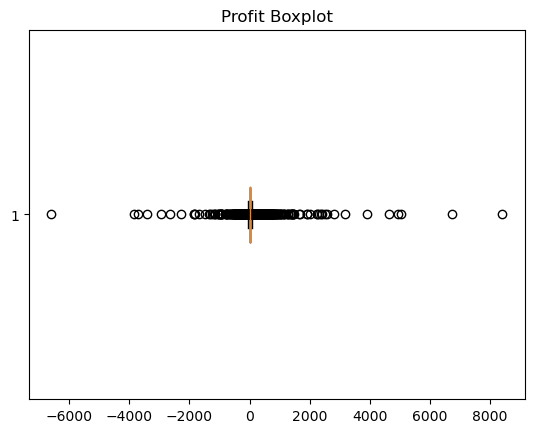

In [1668]:
plt.boxplot(x='Profit',data=df,vert=False)
plt.title('Profit Boxplot')
plt.show()

Profit


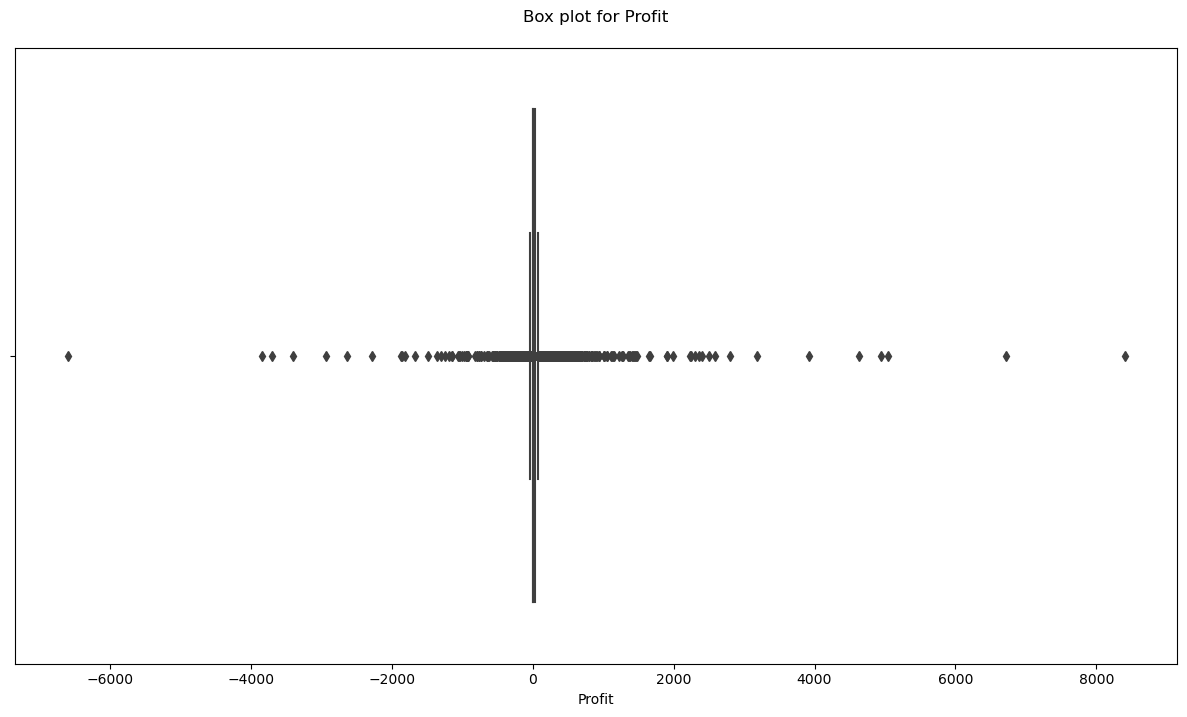

Discount


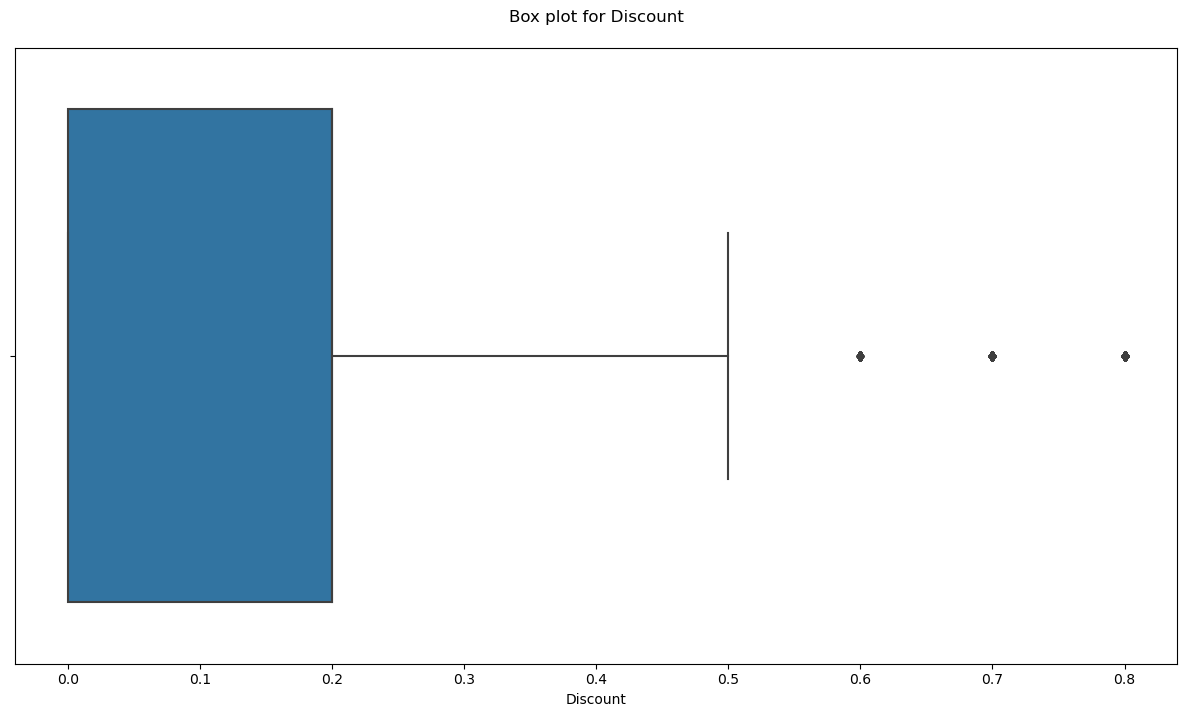

Quantity


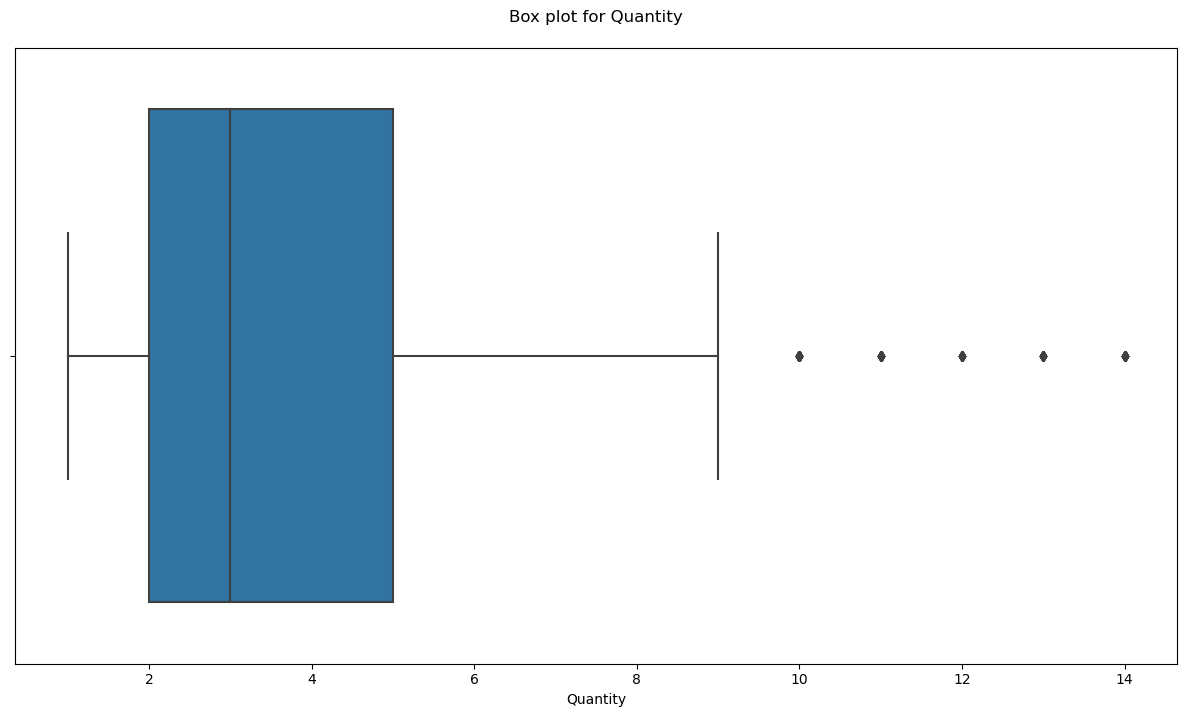

In [1669]:
import matplotlib.pyplot as plt
def num_boxplot(df) :
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64' :
            print(col)
            plt.figure(figsize=(15,8))
            sns.boxplot(x=col,data=df)
            plt.title('Box plot for '+col+'\n')
            print(Fore.RED , Style.BRIGHT,'\033[1m ',100*'=')
            plt.show()
            
num_boxplot(df.drop('Sales',axis=1))

In [1670]:
def iqr(df,col) :
    if df[col].dtype != 'object':
        q1=df[col].quantile(.25)
        q3=df[col].quantile(.75)
        iqr = q3-q1 
        lower_b = q1 - 1.5 * iqr
        ex_lower_b = q1-3 * iqr
        upper_b = q3+1.5 * iqr
        ex_upper_b = q3 + 3 * iqr
        return ex_lower_b , ex_upper_b , upper_b , lower_b

In [1671]:
def find_number_of_ext_outliers(df,label):
    list_col=[]
    df = df.drop(label , axis=1 )
    for col in df.columns :
        if df[col].dtype != 'object':
            ex_lower_b , ex_upper_b,  upper_b , lower_b = iqr(df,col)
            num_ex_outliers = df[(df[col]>ex_upper_b) | (df[col]<ex_lower_b)].shape[0]
            if num_ex_outliers > 0 :
                print('\n \033[1m Number of Exterme Outliers for {0}: ( values > {1} or values <{2})\n'.format(col,ex_upper_b,ex_lower_b))
                print(Fore.RED ,'\033[1m', Style.BRIGHT,(num_ex_outliers))
                print(Style.RESET_ALL)
                list_col.append(col)

    if len(list_col)==0 :
        print('There is no any exterme outliers in dataset ')                
    else:
        return list_col


In [1672]:
list_col_outliers = find_number_of_ext_outliers(df,'Sales')



  Number of Exterme Outliers for Profit: ( values > 112.26975 or values <-81.17699999999999)

   1168



In [1673]:
df.Profit.describe()

count    9994.00
mean       28.66
std       234.26
min     -6599.98
25%         1.73
50%         8.67
75%        29.36
max      8399.98
Name: Profit, dtype: float64

# Put extreme outiers into the range of q3 + 3 * iqr

In [1674]:
df1=df.copy()

In [1675]:
def put_outliers_inrange(df,feature,uthresh,lthresh):

    iqr = df[feature].quantile(.75)-df[feature].quantile(.25)

    upper_b = df[feature].quantile(.75)+3*iqr
    lower_b = df[feature].quantile(.25)-3*iqr
    df.loc[df[feature]>uthresh,feature] = upper_b
    df.loc[df[feature]<lthresh,feature] = lower_b

In [1676]:
put_outliers_inrange(df1,'Profit',112.26975,-81.176)

In [1677]:
list_col_outliers = find_number_of_ext_outliers(df1,'Sales')


There is no any exterme outliers in dataset 


In [1678]:
df1.Profit.describe()

count   9994.00
mean      18.25
std       42.02
min      -81.18
25%        1.73
50%        8.67
75%       29.36
max      112.27
Name: Profit, dtype: float64

In [1679]:
df=df1.copy()

# Feature engineering ad extracting 

In [1680]:
df['Order ID'].value_counts()

Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64

In [1681]:
df.set_index('Order ID')['Order Date']

Order ID
CA-2016-152156   2016-11-08
CA-2016-152156   2016-11-08
CA-2016-138688   2016-06-12
US-2015-108966   2015-10-11
US-2015-108966   2015-10-11
                    ...    
CA-2014-110422   2014-01-21
CA-2017-121258   2017-02-26
CA-2017-121258   2017-02-26
CA-2017-121258   2017-02-26
CA-2017-119914   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

### Extracting order_destination from order_ID

In [1682]:
df['order_destination'] =df['Order ID'].apply(lambda x: x.split('-')[0])

In [1683]:
df['order_destination'].value_counts()

order_destination
CA    8308
US    1686
Name: count, dtype: int64

In [1684]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [1685]:
df['Order_year'] = df['Order Date'].apply(lambda x:x.year)
df['Order_month']=df['Order Date'].apply(lambda x : x.month)
df['Order_DayInMonth']=df['Order Date'].apply(lambda x : x.day)
df['Order_DayName']=df['Order Date'].apply(lambda x : x.day_name())

In [1686]:
df['Order_DayName'].value_counts()

Order_DayName
Monday       1871
Friday       1818
Sunday       1710
Saturday     1655
Thursday     1463
Tuesday      1106
Wednesday     371
Name: count, dtype: int64

In [1687]:
df['Ship_year'] =df['Ship Date'].apply(lambda x:x.year)
df['Ship_month'] =df['Ship Date'].apply(lambda x:x.month)
df['Ship_DayInMonth'] =df['Ship Date'].apply(lambda x:x.day)
df['Ship_DayName'] = df['Ship Date'].apply(lambda x:x.day_name())

In [1688]:
df['Ship_DayName'].value_counts()

Ship_DayName
Wednesday    1593
Tuesday      1566
Friday       1562
Saturday     1429
Thursday     1415
Monday       1241
Sunday       1188
Name: count, dtype: int64

In [1689]:
df['ship_duraition'] = (df['Ship Date'] - df['Order Date']).dt.days
df['ship_duraition'].value_counts()


ship_duraition
4    2774
5    2169
2    1334
6    1203
3    1005
7     621
0     519
1     369
Name: count, dtype: int64

In [1690]:
df['Ship_year'].value_counts()

Ship_year
2017    3303
2016    2578
2015    2131
2014    1940
2018      42
Name: count, dtype: int64

In [1691]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'SubCategory', 'Product Name', 'Profit',
       'product_sub_cat', 'Sales', 'Discount', 'Quantity', 'order_destination',
       'Order_year', 'Order_month', 'Order_DayInMonth', 'Order_DayName',
       'Ship_year', 'Ship_month', 'Ship_DayInMonth', 'Ship_DayName',
       'ship_duraition'],
      dtype='object')

In [1692]:
df['Customer ID'].value_counts()

Customer ID
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: count, Length: 793, dtype: int64

In [1693]:
df['Customer_cat'] = df['Customer ID'].apply(lambda x :x.split('-')[0])
df['Customer_cat'].value_counts()

Customer_cat
SC    210
DB    142
CS    140
TB    135
CC    131
     ... 
CH      4
FW      3
PH      2
EL      2
AO      1
Name: count, Length: 292, dtype: int64

In [1694]:
df['Customer Name'].value_counts()

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64

### Create new feature named HasDiscount , if the order has discount i put 1 otherwise 0

In [1695]:
df[df['Discount']>0]

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
7     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
8     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
10    CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
...              ...        ...        ...             ...         ...   
9978  US-2016-103674 2016-12-06 2016-12-10  Standard Class    AP-10720   
9979  US-2016-103674 2016-12-06 2016-12-10  Standard Class    AP-10720   
9981  CA-2017-163566 2017-08-03 2017-08-06     First Class    TB-21055   
9989  CA-2014-110422 2014-01-21 2014-01-23    Second Class    TB-21400   
9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class    DB-13060   

         Customer Name      Segment             City       State Postal Code  \
3       Sean O'Donnell     Consumer  Fort Lauderdale     Florida       33311   
4       Sean O'Donnell     Consumer  Fort Lauderdale     Florida       33311   
7      Brosina Hoffman     Consumer      Los Angeles  California       90032   
8      Brosina Hoffman     Consumer      Los Angeles  California       90032   
10     Brosina Hoffman     Consumer      Los Angeles  California       90032   
...                ...          ...              ...         ...         ...   
9978        Anne Pryor  Home Office      Los Angeles  California       90032   
9979        Anne Pryor  Home Office      Los Angeles  California       90032   
9981   Ted Butterfield     Consumer        Fairfield        Ohio       45014   
9989  Tom Boeckenhauer     Consumer            Miami     Florida       33180   
9991       Dave Brooks     Consumer       Costa Mesa  California       92627   

     Region       Product ID         Category  SubCategory  \
3     South  FUR-TA-10000577        Furniture       Tables   
4     South  OFF-ST-10000760  Office Supplies      Storage   
7      West  TEC-PH-10002275       Technology       Phones   
8      West  OFF-BI-10003910  Office Supplies      Binders   
10     West  FUR-TA-10001539        Furniture       Tables   
...     ...              ...              ...          ...   
9978   West  OFF-BI-10003727  Office Supplies      Binders   
9979   West  OFF-BI-10002026  Office Supplies      Binders   
9981   East  OFF-LA-10004484  Office Supplies       Labels   
9989  South  FUR-FU-10001889        Furniture  Furnishings   
9991   West  TEC-PH-10003645       Technology       Phones   

                                           Product Name  Profit  \
3         Bretford CR4500 Series Slim Rectangular Table  -81.18   
4                        Eldon Fold 'N Roll Cart System    2.52   
7                        Mitel 5320 IP Phone VoIP phone   90.72   
8     DXL Angle-View Binders with Locking Rings by S...    5.78   
10             Chromcraft Rectangular Conference Tables   85.31   
...                                                 ...     ...   
9978  Avery Durable Slant Ring Binders With Label Ho...    4.68   
9979                  Ibico Recycled Linen-Style Covers  112.27   
9981                                          Avery 476    5.37   
9989                             Ultra Door Pull Handle    4.10   
9991                              Aastra 57i VoIP phone   19.39   

     product_sub_cat   Sales  Discount  Quantity order_destination  \
3                 TA  957.58      0.45      5.00                US   
4                 ST   22.37      0.20      2.00                US   
7                 PH  907.15      0.20      6.00                CA   
8                 BI   18.50      0.20      3.00                CA   
10                TA 1706.18      0.20      9.00                CA   
...              ...     ...       ...       ...               ...   
9978              BI   13.38      0.20      4.00                US   
9979              BI  437.47      0.20     14.00    

In [1696]:
df['HasDiscount'] = df.Discount.apply(lambda x : 1 if x>0 else 0)

## As we can see here the first part of the customer ID is a combination of first letter of customers fname and lname , and its not valuable 
    ** So i decided to drop this feature

# Hypothesis tests 
    
   ### various hypotheses or questions to explore and analyze the data:
    
## Hypotheses to Explore in the Dataset:

1. **Sales Analysis by Region:**
   - Does sales performance vary significantly across different regions?
   - Which regions generate the highest and lowest sales?


2. **Impact of Discounts on Sales and Profits:**
   - Is there a correlation between the discount offered and the sales/profits?
   - Do higher discounts result in increased sales but reduced profits?


3. **Segment-based Analysis:**
   - Are there specific customer segments that contribute more to sales or profits?
   - Do certain segments respond differently to different shipping modes?


4. **Product Category Insights:**
   - Which product categories/sub-categories contribute the most to sales/profits?
   - Are there any specific products that significantly drive sales in certain regions?


5. **Shipping Analysis:**
   - Is there a relationship between the time taken to ship an order and customer satisfaction or sales?
   - Do different shipping modes affect sales in various regions differently?

6. **Customer Retention and Order Frequency:**
   - Are there recurring customers or patterns in customer orders over time?
   - Are there specific customer groups or cities that show higher order frequency?

7. **Profitability across States/Cities:**
   - Which states or cities show higher profitability in sales?
   - Are there specific products or categories more profitable in certain areas?

          
         


1. **Sales Analysis by Region:**
   - Does sales performance vary significantly across different regions?
   - Which regions generate the highest and lowest sales?

In [1697]:
pd.crosstab(index=df['Region'], columns='Total Sales', values=df['Sales'], aggfunc='sum').sort_values(by = 'Total Sales' ,ascending=False)




col_0    Total Sales
Region              
West       725457.82
East       678781.24
Central    501239.89
South      391721.91

#### The table shows that the West region has the highest total sales, followed by the East, Central, and South regions, in descending order.

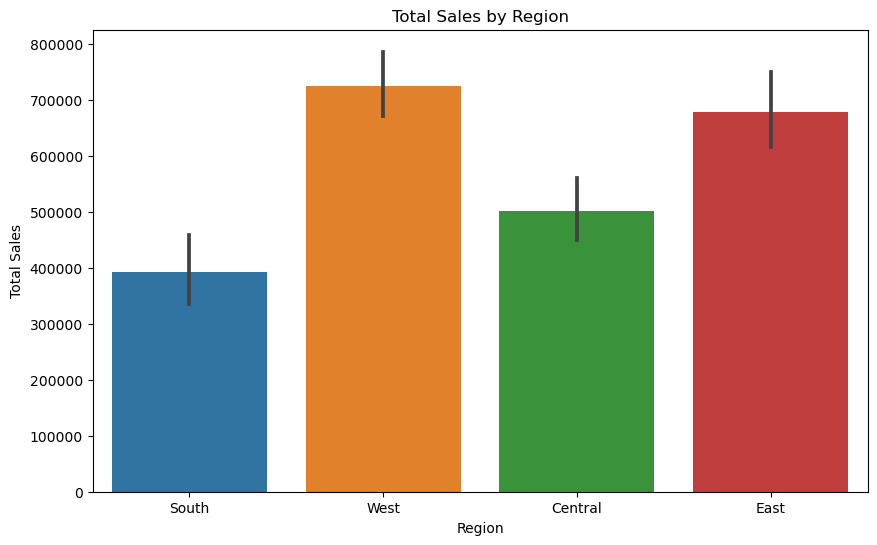

In [1698]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Region') 
plt.xlabel('Region') 
plt.ylabel('Total Sales')  

plt.show()


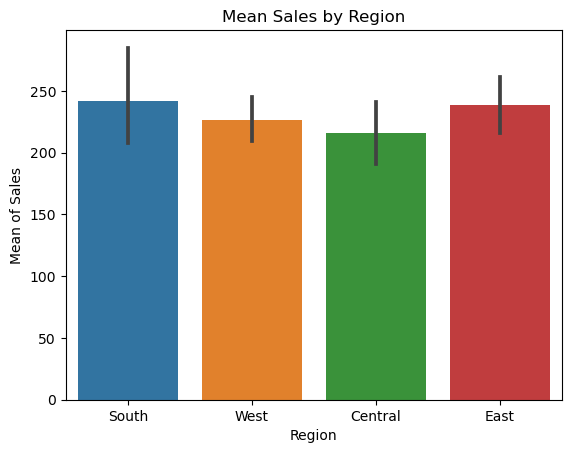

In [1699]:
sns.barplot(x='Region',y='Sales' , data=df , estimator='mean')
plt.title("Mean Sales by Region")
plt.xlabel('Region')
plt.ylabel('Mean of Sales')
plt.show()

# perform an analysis of variance (ANOVA) to determine if there's a statistically significant difference in sales across the regions
    First i check the assumption :
    - Independence of observations: Each observation is independent of the others
    - Normality: The data within each group (each region in this case) should be approximately normally distributed

## Normality check

In [1700]:
region_sales_data = [df['Sales'][df.Region==region] for region in df.Region.unique()]

In [1701]:
normality_test = [shapiro(sales) for sales in region_sales_data]

In [1702]:
for i,region in enumerate(df['Region'].unique()):
    p_value = normality_test[i][1]
    print('Shapiro-Wilk test for normality in {0} : p-value = {1}'.format(region ,p_value ))

    if(p_value<0.5) :
        print(f"The data in {region} does not follow a normal distribution.")
    else:
        print(f"The data in{region} follows a normal distribution")
    print("-"*70)


Shapiro-Wilk test for normality in South : p-value = 0.0
The data in South does not follow a normal distribution.
----------------------------------------------------------------------
Shapiro-Wilk test for normality in West : p-value = 0.0
The data in West does not follow a normal distribution.
----------------------------------------------------------------------
Shapiro-Wilk test for normality in Central : p-value = 0.0
The data in Central does not follow a normal distribution.
----------------------------------------------------------------------
Shapiro-Wilk test for normality in East : p-value = 0.0
The data in East does not follow a normal distribution.
----------------------------------------------------------------------


## Homogeneity of Variance:
    Checking homogeneity of variance assumption using Levene's test.
    Null Hypothesis : The variances across different regions are homogeneous.
    Alternative Hypothesis : The variances across different regions are not homogeneous.

In [1703]:

from scipy.stats import levene

stat, p = levene(*region_sales_data)

print(f"Levene's test p-value for homogeneity of variance : {p}")

if p < 0.05:
    print('Since P-Value < 0.05, reject the null hypothesis. The variances across different regions are not homogeneous.')
else:
    print('Since P-Value > 0.05, there is no evidence to reject the Null Hypothesis, so the variances across different regions are homogeneous.')


Levene's test p-value for homogeneity of variance : 0.5510954449822956
Since P-Value > 0.05, there is no evidence to reject the Null Hypothesis, so the variances across different regions are homogeneous.


##### the assumption of normality is not met, and the assumption of homogeneity of variance is satisfied,I opt for Kruskal-Wallis test non-parametric tests.

In [1704]:
region_sales_mean = df.groupby('Region')['Sales'].mean()
region_sales_mean

Region
Central   215.77
East      238.34
South     241.80
West      226.49
Name: Sales, dtype: float64

## it is NOT Normally distributed so we should compare medians between distributions, not mean

In [1705]:
from scipy.stats import kruskal

stat , p = kruskal(* region_sales_data)

print(f"Kruskal-Wallis test p-value: {p}")

if p < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in the Median sales among different regions.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the Median sales among different regions.")

Kruskal-Wallis test p-value: 9.069027824652193e-06

Reject the null hypothesis. There is a significant difference in the Median sales among different regions.


# Second Hypothesis : 
        
        Impact of Discounts on Sales and Profits:

            Is there a correlation between the discount offered and the sales/profits?
            Do higher discounts result in increased sales but reduced profits?

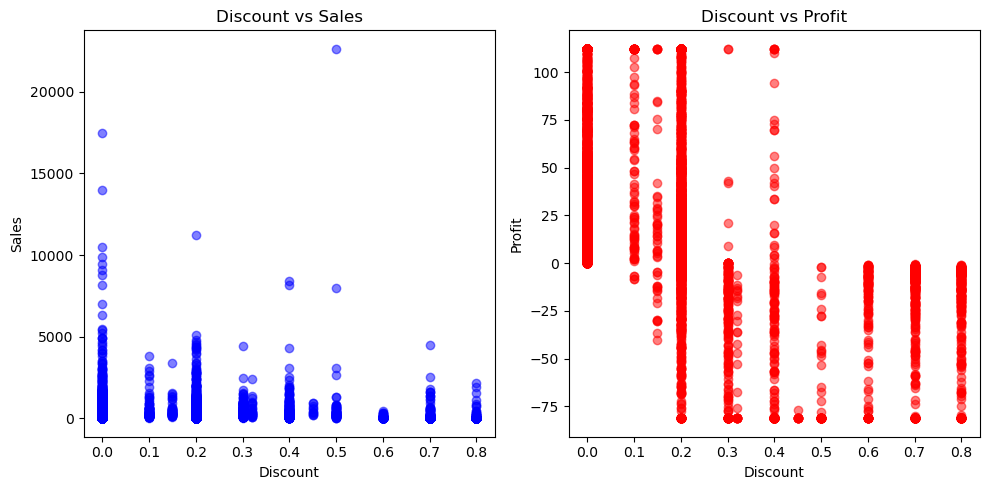

In [1706]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Scatter plot for Discount vs Sales
plt.subplot(1, 2, 1)
plt.scatter(df['Discount'], df['Sales'], color='blue', alpha=0.5)
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

# Scatter plot for Discount vs Profit
plt.subplot(1, 2, 2)
plt.scatter(df['Discount'], df['Profit'], color='red', alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()


In [1707]:
# Correlation between Discount and Sales 
df.Discount.corr(df.Sales)

-0.028190124157535506

#### As we can see there is no any strong relation between Discount and Sales

In [1708]:
df.Discount.corr(df.Profit)

-0.46988072295857314

#### As we can see there is a negative weak relation between Discount and profit

# Third Hypothesis : Segment-based Analysis:

    Are there specific customer segments that contribute more to sales or profits?
    Do certain segments respond differently to different shipping modes?

In [1709]:
df.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [1710]:
pd.crosstab(index=df['Segment'],values=df['Sales'] , columns='Total sale' ,aggfunc='sum').sort_values(by='Total sale',ascending=False)

col_0        Total sale
Segment                
Consumer     1161401.34
Corporate     706146.37
Home Office   429653.15

### The table shows that the Consumer has the highest total sales, followed by the Corporate, and Home Office, in descending order.

Text(0.5, 1.0, 'segment by mean of sales')

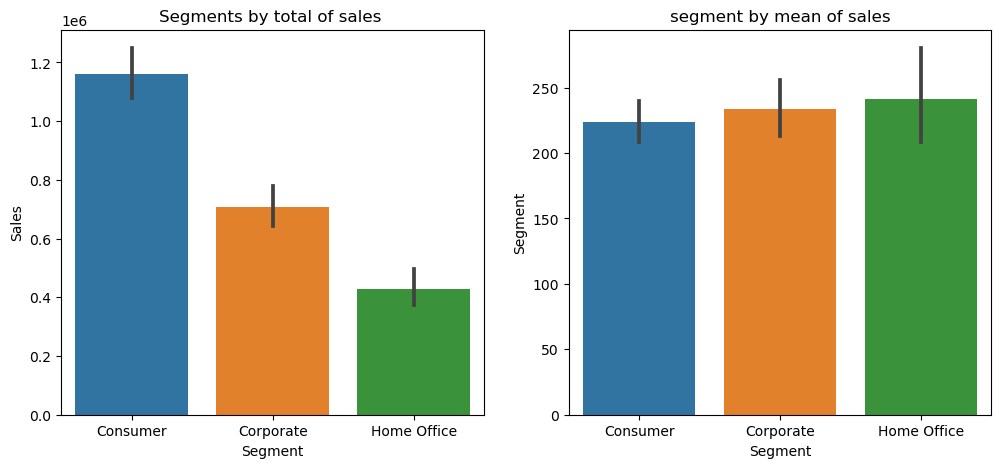

In [1711]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Segment' , y = 'Sales' , data=df,estimator='sum')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Segments by total of sales ' )

plt.subplot(1,2,2)
sns.barplot(x='Segment' , y = 'Sales' , data=df)
plt.xlabel('Segment')
plt.ylabel('Segment')
plt.title('segment by mean of sales')

# check the assumption for one way Anova 

### 1 - Groups are independent 

### 2 - Normality of each group 

In [1712]:
sales_segment_data = [df['Sales'][df['Segment']==seg] for seg in df.Segment.unique()]


In [1713]:
normality_test  = [shapiro(seg) for seg in sales_segment_data]

In [1714]:
for i,seg in enumerate(df.Segment.unique()):
    p_value = normality_test[i][1]
    if p_value<0.05:
        print(f"The data in {seg} does not follow a normal distribution.")
    else:
        print(f"The data in{seg} follows a normal distribution")
    print("-"*70)



The data in Consumer does not follow a normal distribution.
----------------------------------------------------------------------
The data in Corporate does not follow a normal distribution.
----------------------------------------------------------------------
The data in Home Office does not follow a normal distribution.
----------------------------------------------------------------------


### The normality distribution assumption is not met

## 3 - Hemogenity assumption - using levene
    Checking homogeneity of variance assumption using Levene's test.
    Null Hypothesis : The variances across different regions are homogeneous.
    Alternative Hypothesis : The variances across different regions are not homogeneous.

In [1715]:
stat , p = levene(*sales_segment_data)

print(f"Levene's test p-value for homogeneity of variance : {p}")

if p < 0.05:
    print('Since P-Value < 0.05, reject the null hypothesis. The variances across different segments are not homogeneous.')
else:
    print('Since P-Value > 0.05, there is no evidence to reject the Null Hypothesis, so the variances across different segmens are homogeneous.')


Levene's test p-value for homogeneity of variance : 0.5346457893998786
Since P-Value > 0.05, there is no evidence to reject the Null Hypothesis, so the variances across different segmens are homogeneous.


## Using not- parametric test (Kruskal test) to compare the median among the diffrent groups since ther are not normally distributed

In [1716]:
stat,p = kruskal(*sales_segment_data)
print(f"Kruskal-Wallis test p-value: {p}")

if p < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in the Median sales among different segmens.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the Median sales among different segments.")

Kruskal-Wallis test p-value: 0.7103020663105177

Fail to reject the null hypothesis. There is no significant difference in the Median sales among different segments.


## Fourth Hypothesis : Product Category Insights:

    Which product categories/sub-categories contribute the most to sales/profits?
    Are there any specific products that significantly drive sales in certain regions?

In [1717]:
df.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [1718]:
pd.crosstab(index=df.Category,values=df.Sales , columns='Total Sales' , aggfunc='sum').sort_values(by='Total Sales' , ascending=False)

col_0            Total Sales
Category                    
Technology         836154.03
Furniture          741999.80
Office Supplies    719047.03

#### The table among the diffrent Categories shows that the Technology has the highest total sales, followed by the Furniture, and Office Supplies, in descending order.

In [1719]:
pd.crosstab(index=df.SubCategory , values=df.Sales , columns='total sale',aggfunc='sum').sort_values(by='total sale',ascending=False)

col_0        total sale
SubCategory            
Phones        330007.05
Chairs        328449.10
Storage       223843.61
Tables        206965.53
Binders       203412.73
Machines      189238.63
Accessories   167380.32
Copiers       149528.03
Bookcases     114880.00
Appliances    107532.16
Furnishings    91705.16
Paper          78479.21
Supplies       46673.54
Art            27118.79
Envelopes      16476.40
Labels         12486.31
Fasteners       3024.28

#### The table among the diffrent SubCategories shows that the Phones has the highest total sales, followed by the Chairs, and Storage while the Fasteners has the lowest sale

# One-Way ANOVA

### check the assumptions

##### 1 - All the groups are independent 

#### 2 - Normality distribution of each group : 

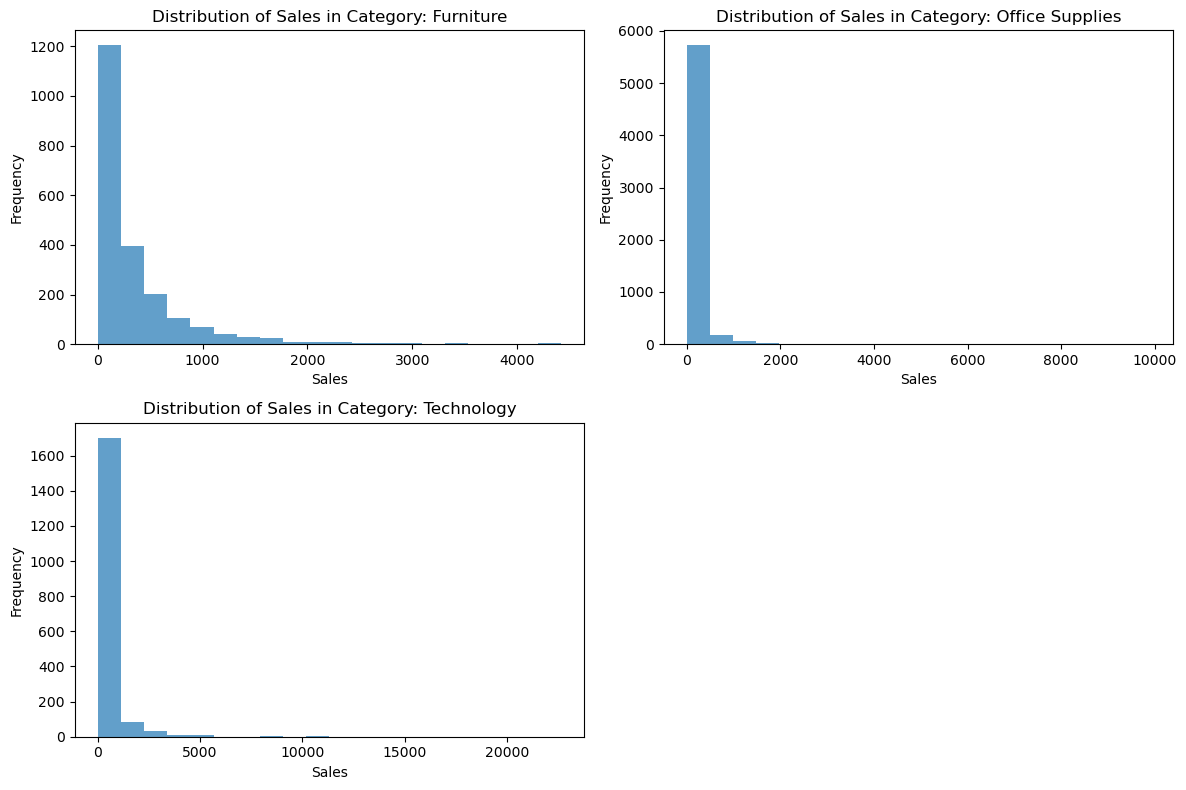

In [1720]:
categories = df['Category'].unique()

plt.figure(figsize=(12, 8))

for i, cat in enumerate(categories, start=1):
    plt.subplot(2, 2, i)  # Creating subplots for each category
    sales_data = df[df['Category'] == cat]['Sales']
    plt.hist(sales_data, bins=20, alpha=0.7)
    plt.title(f'Distribution of Sales in Category: {cat}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [1721]:
sales_cat_data = [df['Sales'][df.Category==cat] for cat in df.Category.unique()]
normality_test_cat = [shapiro(cat) for cat in sales_cat_data] 

for i , cat in enumerate(df.Category.unique()) :
    p_value = normality_test_cat[i][1]
    print(f"The Pvalue for {cat} is {p_value}")
    if p_value<0.05 :
        print(f"Since pvalue<0.05 we reject null hypothesis and {cat} is not normal distributed")
    else :
        print(f"Since pvalue>0.05 we can not reject null hypothesis and {cat} is normal distributed")
    print("-"*70)
        
        


The Pvalue for Furniture is 0.0
Since pvalue<0.05 we reject null hypothesis and Furniture is not normal distributed
----------------------------------------------------------------------
The Pvalue for Office Supplies is 0.0
Since pvalue<0.05 we reject null hypothesis and Office Supplies is not normal distributed
----------------------------------------------------------------------
The Pvalue for Technology is 0.0
Since pvalue<0.05 we reject null hypothesis and Technology is not normal distributed
----------------------------------------------------------------------


### 3 - homogenity assumption using levene

In [1722]:
stat,p = levene(*sales_cat_data)
print(f"Pvalue is {p}")
if p < 0.05:
    print('Since P-Value < 0.05, reject the null hypothesis. The variances across different Categories are not homogeneous.')
else:
    print('Since P-Value > 0.05, there is no evidence to reject the Null Hypothesis, so the variances across different Categories are homogeneous.')


Pvalue is 1.209140834981453e-79
Since P-Value < 0.05, reject the null hypothesis. The variances across different Categories are not homogeneous.


# Applying Non parametric Kruskal test 

In [1723]:
stat,p = kruskal(*sales_cat_data)
print(f"Kruskal-Wallis test p-value: {p}")

if p < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in the Median sales among different Categories.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the Median sales among different Categories.")

Kruskal-Wallis test p-value: 0.0

Reject the null hypothesis. There is a significant difference in the Median sales among different Categories.


# Fifth Fourth Hypothesis Shipping Analysis:

    Is there a relationship between the time taken to ship an order and customer sales?
    Do different shipping modes affect sales in various regions differently?

In [1724]:
df.ship_duraition.value_counts()

ship_duraition
4    2774
5    2169
2    1334
6    1203
3    1005
7     621
0     519
1     369
Name: count, dtype: int64

In [1725]:
df.ship_duraition.corr(df.Sales)

-0.007353537093501145

#### As we can see the corr between ship duration and sales , there is no any strong association between these 2 

<Axes: xlabel='ship_duraition', ylabel='Sales'>

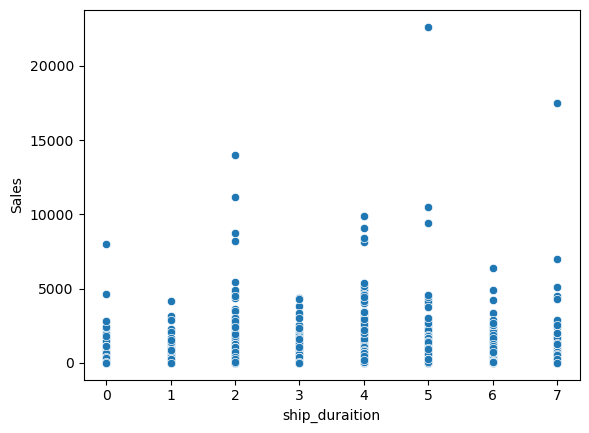

In [1726]:
sns.scatterplot(x=df.ship_duraition,y=df.Sales , data=df)

#### Ship Duration is a numeric feature with limit number of values , so i deal with it as a categorical value and going to apply One-way ANOVA to compare the diffrent groups

In [1727]:
df.ship_duraition.unique()

array([3, 4, 7, 5, 2, 6, 1, 0], dtype=int64)

In [1728]:
shipduration_sales_data = [df['Sales'][df['ship_duraition']==ship] for ship in df.ship_duraition.unique()]

# check the Assumption for one-way ANOVA

### 1 - Each group is independent

### 2 - Normally distribution for each group

In [1729]:
normality_test_shipduration = [shapiro(ship) for ship in shipduration_sales_data]


In [1730]:
for i,shipd in enumerate(df.ship_duraition.unique()):
    p_value=normality_test_shipduration[i][1]
    print(f"The Pvalue for {shipd} is {p_value}")
    if p_value<0.05 :
        print(f"Since pvalue<0.05 we reject null hypothesis and {shipd} is not normal distributed")
    else :
        print(f"Since pvalue>0.05 we can not reject null hypothesis and {shipd} is normal distributed")
    print("-"*70)
        
    

The Pvalue for 3 is 0.0
Since pvalue<0.05 we reject null hypothesis and 3 is not normal distributed
----------------------------------------------------------------------
The Pvalue for 4 is 0.0
Since pvalue<0.05 we reject null hypothesis and 4 is not normal distributed
----------------------------------------------------------------------
The Pvalue for 7 is 2.5223372357846707e-44
Since pvalue<0.05 we reject null hypothesis and 7 is not normal distributed
----------------------------------------------------------------------
The Pvalue for 5 is 0.0
Since pvalue<0.05 we reject null hypothesis and 5 is not normal distributed
----------------------------------------------------------------------
The Pvalue for 2 is 0.0
Since pvalue<0.05 we reject null hypothesis and 2 is not normal distributed
----------------------------------------------------------------------
The Pvalue for 6 is 0.0
Since pvalue<0.05 we reject null hypothesis and 6 is not normal distributed
--------------------------

### 3 - Homogeneity of Variance:
    Checking homogeneity of variance assumption using Levene's test.
    Null Hypothesis : The variances across different ship duration are homogeneous.
    Alternative Hypothesis : The variances across different ship duration are not homogeneous.

In [1731]:
stat , p =levene(*shipduration_sales_data)
print(f"Pvalue is {p}")
if p < 0.05:
    print('Since P-Value < 0.05, reject the null hypothesis. The variances across different ship duration are not homogeneous.')
else:
    print('Since P-Value > 0.05, there is no evidence to reject the Null Hypothesis, so the variances across different ship duration are homogeneous.')


Pvalue is 0.027493458503452757
Since P-Value < 0.05, reject the null hypothesis. The variances across different ship duration are not homogeneous.


# Applying Non parametric Kruskal test

In [1732]:
stat , p = kruskal(*shipduration_sales_data)

print(f"Kruskal-Wallis test p-value: {p}")

if p < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in the Median sales among different duration ship.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the Median sales among different duration ship.")


Kruskal-Wallis test p-value: 0.07309626958516842

Fail to reject the null hypothesis. There is no significant difference in the Median sales among different duration ship.


## Is there a relationship between the ship mode of an order and customer sales?

<Axes: xlabel='Ship Mode', ylabel='Sales'>

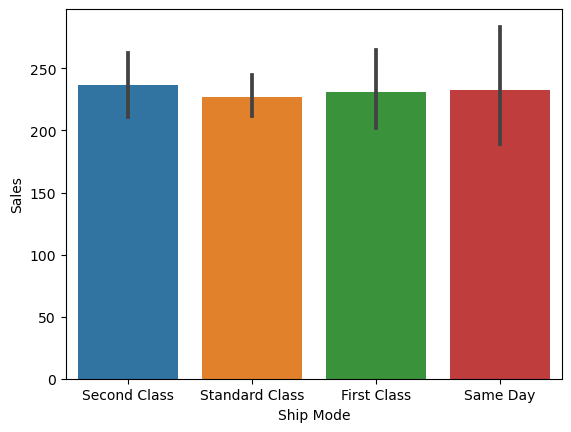

In [1733]:
sns.barplot(x='Ship Mode' , y='Sales',data=df )

In [1734]:
pd.crosstab(index=df['Ship Mode'] , values=df.Sales , columns='total sale' , aggfunc='sum').sort_values(by='total sale' , ascending=False)

col_0           total sale
Ship Mode                 
Standard Class  1372626.78
Second Class     450760.76
First Class      349350.48
Same Day         124462.84

### Standard Class shipment mode has highest sale among other modes with a huge difrrent 

### lets compare the means of each groups using ANOVA Test , before that i check the assumptions 

### 1- All groups are independent

### 2 - Test of Normality

In [1735]:
#seprate all groups 

shipmode_sales_data =[ df['Sales'][df['Ship Mode']==shipmode] for shipmode in df['Ship Mode'].unique()]


In [1736]:
normality_test_shipmode = [shapiro(shipmode) for shipmode in shipmode_sales_data]


In [1737]:
for i , shipmode in enumerate(df['Ship Mode'].unique()):
    p_value = normality_test_shipmode[i][1]
    print(f"The Pvalue for {shipmode} is {p_value}")
    if p_value<0.05 :
        print(f"Since pvalue<0.05 we reject null hypothesis and {shipmode} is not normal distributed")
    else :
        print(f"Since pvalue>0.05 we can not reject null hypothesis and {shipmode} is normal distributed")
    print("-"*70)

The Pvalue for Second Class is 0.0
Since pvalue<0.05 we reject null hypothesis and Second Class is not normal distributed
----------------------------------------------------------------------
The Pvalue for Standard Class is 0.0
Since pvalue<0.05 we reject null hypothesis and Standard Class is not normal distributed
----------------------------------------------------------------------
The Pvalue for First Class is 0.0
Since pvalue<0.05 we reject null hypothesis and First Class is not normal distributed
----------------------------------------------------------------------
The Pvalue for Same Day is 1.7412864022839293e-38
Since pvalue<0.05 we reject null hypothesis and Same Day is not normal distributed
----------------------------------------------------------------------


### 3 - Homogeneity of Variance (Homoscedasticity)

In [1738]:
stat , p = levene(*shipmode_sales_data)
print(p)
if p<0.05:
    print('reject h0 variance across the groups are not equal')
else:
    print('fail to reject h0 variance across the groups are equal')

0.9628596947813803
fail to reject h0 variance across the groups are equal


# َApplying non parametric Kruskal test 

In [1739]:
stat , p = kruskal(*shipmode_sales_data)

print(f"Kruskal-Wallis test p-value: {p}")

if p < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in the Median sales among different ship modes.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the Median sales among different ship modes.")



Kruskal-Wallis test p-value: 0.5670815233365718

Fail to reject the null hypothesis. There is no significant difference in the Median sales among different ship modes.


# Checking if there is a relation between ship mode and ship duration

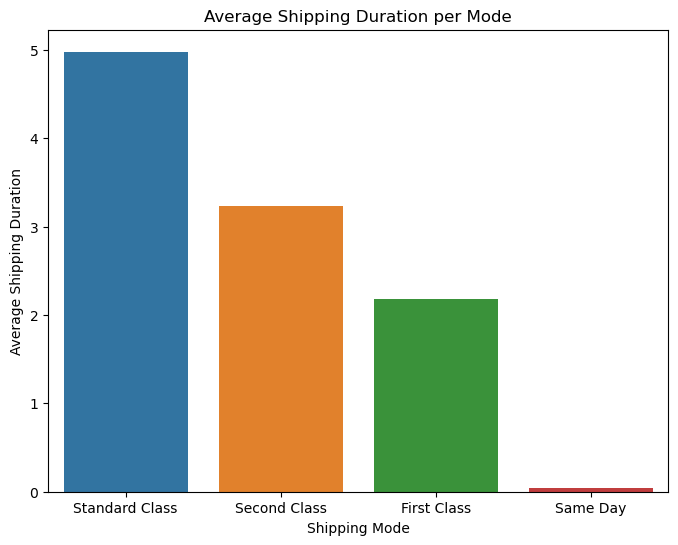

In [1740]:
ship_mode_duration = df[['Ship Mode', 'ship_duraition']]

# Calculate average ship duration for each shipping mode
avg_duration_per_mode = ship_mode_duration.groupby('Ship Mode')['ship_duraition'].mean().reset_index()
avg_duration_per_mode = avg_duration_per_mode.sort_values(by='ship_duraition',ascending=False)

# Visualize the average shipping duration per mode
plt.figure(figsize=(8, 6))
sns.barplot(x='Ship Mode', y='ship_duraition', data=avg_duration_per_mode)
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Duration')
plt.title('Average Shipping Duration per Mode')
plt.show()

#### As we see here Standard class shipment mode has highest mean of the duration of shipment

#### Perform statistical tests to determine if there's a significant difference in shipping duration among different shipping modes.
    i apply Anova test , and before that check the assumptions :

1 - Each group is independent 

2 - check the normality distribution across all the ship mode groups 

In [1741]:
shipmode_duration_data =[ df['ship_duraition'][df['Ship Mode']==shipmode] for shipmode in df['Ship Mode'].unique()]


In [1742]:
normality_test_shipping = [shapiro(shipmode) for shipmode in shipmode_duration_data]

In [1743]:
for i , shipmode in enumerate(df['Ship Mode'].unique()):
    p_value = normality_test_shipping[i][1]

    print(f"The Pvalue for {shipmode} is {p_value}")
    if p_value<0.05 :
        print(f"Since pvalue<0.05 we reject null hypothesis and {shipmode} is not normal distributed")
    else :
        print(f"Since pvalue>0.05 we can not reject null hypothesis and {shipmode} is normal distributed")
    print("-"*70)
        
    

The Pvalue for Second Class is 1.678755560261131e-42
Since pvalue<0.05 we reject null hypothesis and Second Class is not normal distributed
----------------------------------------------------------------------
The Pvalue for Standard Class is 0.0
Since pvalue<0.05 we reject null hypothesis and Standard Class is not normal distributed
----------------------------------------------------------------------
The Pvalue for First Class is 4.219631974728819e-40
Since pvalue<0.05 we reject null hypothesis and First Class is not normal distributed
----------------------------------------------------------------------
The Pvalue for Same Day is 1.7039789326189776e-42
Since pvalue<0.05 we reject null hypothesis and Same Day is not normal distributed
----------------------------------------------------------------------


3 - Homogeneity of Variance (Homoscedasticity)

In [1744]:
stat,p = levene(*shipmode_duration_data)
print(p)
if p<0.05:
    print('reject h0 variance across the groups are not equal')
else:
    print('fail to reject h0 variance across the groups are equal')

6.304568804879559e-254
reject h0 variance across the groups are not equal


# Applying non parametric Kruskal test

In [1745]:
stat,p = kruskal(*ship_mode_duration)
print(f"Kruskal-Wallis test p-value: {p}")

if p < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in the Median ship duration among different ship modes.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the Median ship duration among different ship modes.")



Kruskal-Wallis test p-value: 0.31731050786291115

Fail to reject the null hypothesis. There is no significant difference in the Median ship duration among different ship modes.


# UNIVARIATE AND BIVARIATE ANALYSIS

### The statistical summary of the dataset

# Dropping Irrelevant Feature

In [1746]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'SubCategory', 'Product Name', 'Profit',
       'product_sub_cat', 'Sales', 'Discount', 'Quantity', 'order_destination',
       'Order_year', 'Order_month', 'Order_DayInMonth', 'Order_DayName',
       'Ship_year', 'Ship_month', 'Ship_DayInMonth', 'Ship_DayName',
       'ship_duraition', 'Customer_cat', 'HasDiscount'],
      dtype='object')

In [1747]:
df.drop(columns=['Ship Date','Order Date'],inplace=True)

In [1748]:
df.drop(columns=['Customer_cat'],inplace=True)

#### Descriptive Statistic

In [1749]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()# for only numeric columns

Profit    Sales  Discount  Quantity  Order_year  Order_month  \
count 9994.00  9994.00   9994.00   9994.00     9994.00      9994.00   
mean    18.25   229.86      0.16      3.80     2015.72         7.81   
std     42.02   623.25      0.21      2.19        1.12         3.28   
min    -81.18     0.44      0.00      1.00     2014.00         1.00   
25%      1.73    17.28      0.00      2.00     2015.00         5.00   
50%      8.67    54.49      0.20      3.00     2016.00         9.00   
75%     29.36   209.94      0.20      5.00     2017.00        11.00   
max    112.27 22638.48      0.80     14.00     2017.00        12.00   

       Order_DayInMonth  Ship_year  Ship_month  Ship_DayInMonth  \
count           9994.00    9994.00     9994.00          9994.00   
mean              15.47    2015.74        7.74            15.88   
std                8.75       1.13        3.34             8.80   
min                1.00    2014.00        1.00             1.00   
25%                8.00    2015.00        5.00             8.00   
50%               15.00    2016.00        9.00            16.00   
75%               23.00    2017.00       11.00            24.00   
max               31.00    2018.00       12.00            31.00   

       ship_duraition  HasDiscount  
count         9994.00      9994.00  
mean             3.96         0.52  
std              1.75         0.50  
min              0.00         0.00  
25%              3.00         0.00  
50%              4.00         1.00  
75%              5.00         1.00  
max              7.00         1.00

In [1750]:
df.describe(include='all').T

count unique              top   freq    mean    std  \
Order ID             9994   5009   CA-2017-100111     14     NaN    NaN   
Ship Mode            9994      4   Standard Class   6040     NaN    NaN   
Customer ID          9994    793         WB-21850     37     NaN    NaN   
Customer Name        9994    793    William Brown     37     NaN    NaN   
Segment              9994      3         Consumer   5191     NaN    NaN   
City                 9994    531    New York City    915     NaN    NaN   
State                9994     49       California   2001     NaN    NaN   
Postal Code       9994.00 631.00         10035.00 263.00     NaN    NaN   
Region               9994      4             West   3203     NaN    NaN   
Product ID           9994   1862  OFF-PA-10001970     19     NaN    NaN   
Category             9994      3  Office Supplies   6026     NaN    NaN   
SubCategory          9994     17          Binders   1523     NaN    NaN   
Product Name         9994   1850  Staple envelope     48     NaN    NaN   
Profit            9994.00    NaN              NaN    NaN   18.25  42.02   
product_sub_cat      9994     17               BI   1523     NaN    NaN   
Sales             9994.00    NaN              NaN    NaN  229.86 623.25   
Discount          9994.00    NaN              NaN    NaN    0.16   0.21   
Quantity          9994.00    NaN              NaN    NaN    3.80   2.19   
order_destination    9994      2               CA   8308     NaN    NaN   
Order_year        9994.00    NaN              NaN    NaN 2015.72   1.12   
Order_month       9994.00    NaN              NaN    NaN    7.81   3.28   
Order_DayInMonth  9994.00    NaN              NaN    NaN   15.47   8.75   
Order_DayName        9994      7           Monday   1871     NaN    NaN   
Ship_year         9994.00    NaN              NaN    NaN 2015.74   1.13   
Ship_month        9994.00    NaN              NaN    NaN    7.74   3.34   
Ship_DayInMonth   9994.00    NaN              NaN    NaN   15.88   8.80   
Ship_DayName         9994      7        Wednesday   1593     NaN    NaN   
ship_duraition    9994.00    NaN              NaN    NaN    3.96   1.75   
HasDiscount       9994.00    NaN              NaN    NaN    0.52   0.50   

                      min     25%     50%     75%      max  
Order ID              NaN     NaN     NaN     NaN      NaN  
Ship Mode             NaN     NaN     NaN     NaN      NaN  
Customer ID           NaN     NaN     NaN     NaN      NaN  
Customer Name         NaN     NaN     NaN     NaN      NaN  
Segment               NaN     NaN     NaN     NaN      NaN  
City                  NaN     NaN     NaN     NaN      NaN  
State                 NaN     NaN     NaN     NaN      NaN  
Postal Code           NaN     NaN     NaN     NaN      NaN  
Region                NaN     NaN     NaN     NaN      NaN  
Product ID            NaN     NaN     NaN     NaN      NaN  
Category              NaN     NaN     NaN     NaN      NaN  
SubCategory           NaN     NaN     NaN     NaN      NaN  
Product Name          NaN     NaN     NaN     NaN      NaN  
Profit             -81.18    1.73    8.67   29.36   112.27  
product_sub_cat       NaN     NaN     NaN     NaN      NaN  
Sales                0.44   17.28   54.49  209.94 22638.48  
Discount             0.00    0.00    0.20    0.20     0.80  
Quantity             1.00    2.00    3.00    5.00    14.00  
order_destination     NaN     NaN     NaN     NaN      NaN  
Order_year        2014.00 2015.00 2016.00 2017.00  2017.00  
Order_month          1.00    5.00    9.00   11.00    12.00  
Order_DayInMonth     1.00    8.00   15.00   23.00    31.00  
Order_DayName         NaN     NaN     NaN     NaN      NaN  
Ship_year         2014.00 2015.00 2016.00 2017.00  2018.00  
Ship_month           1.00    5.00    9.00   11.00    12.00  
Ship_DayInMonth      1.00    8.00   16.00   24.00    31.00  
Ship_DayName          NaN     NaN     NaN     NaN      NaN  
ship_duraition       0.00    3.00    4.00    5.00     7.00  


In [1751]:
df.astype('object').describe().T

count  unique              top    freq
Order ID             9994    5009   CA-2017-100111      14
Ship Mode            9994       4   Standard Class    6040
Customer ID          9994     793         WB-21850      37
Customer Name        9994     793    William Brown      37
Segment              9994       3         Consumer    5191
City                 9994     531    New York City     915
State                9994      49       California    2001
Postal Code          9994     631            10035     263
Region               9994       4             West    3203
Product ID           9994    1862  OFF-PA-10001970      19
Category             9994       3  Office Supplies    6026
SubCategory          9994      17          Binders    1523
Product Name         9994    1850  Staple envelope      48
Profit            9994.00 6267.00           112.27  795.00
product_sub_cat      9994      17               BI    1523
Sales             9994.00 5825.00            12.96   56.00
Discount          9994.00   12.00             0.00 4798.00
Quantity          9994.00   54.00             3.00 2328.00
order_destination    9994       2               CA    8308
Order_year           9994       4             2017    3312
Order_month          9994      12               11    1471
Order_DayInMonth     9994      31               20     398
Order_DayName        9994       7           Monday    1871
Ship_year            9994       5             2017    3303
Ship_month           9994      12               11    1436
Ship_DayInMonth      9994      31               26     406
Ship_DayName         9994       7        Wednesday    1593
ship_duraition       9994       8                4    2774
HasDiscount          9994       2                1    5196

In [1752]:
df.apply(lambda x: len(x.unique()))

Order ID             5009
Ship Mode               4
Customer ID           793
Customer Name         793
Segment                 3
City                  531
State                  49
Postal Code           631
Region                  4
Product ID           1862
Category                3
SubCategory            17
Product Name         1850
Profit               6267
product_sub_cat        17
Sales                5825
Discount               12
Quantity               54
order_destination       2
Order_year              4
Order_month            12
Order_DayInMonth       31
Order_DayName           7
Ship_year               5
Ship_month             12
Ship_DayInMonth        31
Ship_DayName            7
ship_duraition          8
HasDiscount             2
dtype: int64

### Find the Frequency of each items(levels)

In [1753]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'SubCategory', 'Product Name', 'product_sub_cat', 'order_destination',
       'Order_DayName', 'Ship_DayName'],
      dtype='object')

In [1754]:
for col in df_cat.columns:
    print(df_cat[col].value_counts())
    print('-'*50)

Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64
--------------------------------------------------
Ship Mode
Standard Class    6040
Second Class      1906
First Class       1513
Same Day           535
Name: count, dtype: int64
--------------------------------------------------
Customer ID
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: count, Length: 793, dtype: int64
--------------------------------------------------
Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
C

In [1755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           9994 non-null   object 
 1   Ship Mode          9994 non-null   object 
 2   Customer ID        9994 non-null   object 
 3   Customer Name      9994 non-null   object 
 4   Segment            9994 non-null   object 
 5   City               9994 non-null   object 
 6   State              9994 non-null   object 
 7   Postal Code        9994 non-null   object 
 8   Region             9994 non-null   object 
 9   Product ID         9994 non-null   object 
 10  Category           9994 non-null   object 
 11  SubCategory        9994 non-null   object 
 12  Product Name       9994 non-null   object 
 13  Profit             9994 non-null   float64
 14  product_sub_cat    9994 non-null   object 
 15  Sales              9994 non-null   float64
 16  Discount           9994 

# UNIVARIATE ANALYSIS

# Ship Mode

In [1756]:
df['Ship Mode'].value_counts(normalize=True)*100

Ship Mode
Standard Class   60.44
Second Class     19.07
First Class      15.14
Same Day          5.35
Name: proportion, dtype: float64

In [1757]:
df['Ship Mode'].describe()

count               9994
unique                 4
top       Standard Class
freq                6040
Name: Ship Mode, dtype: object

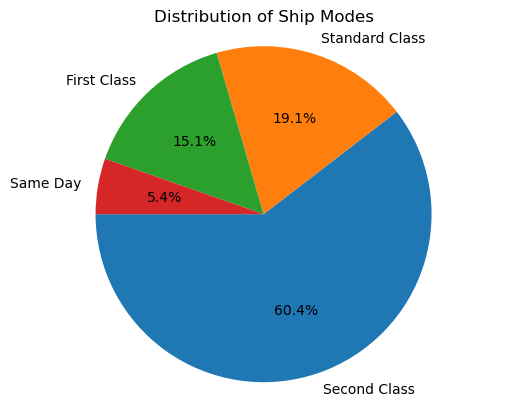

In [1758]:

plt.pie(df['Ship Mode'].value_counts() ,labels=df['Ship Mode'].unique(),autopct='%1.1f%%',startangle=180)
plt.title('Distribution of Ship Modes')
plt.axis('equal')
plt.show()


###### It demonstrates the proportional breakdown of shipping methods, revealing that Standard Class is the most commonly used, followed by Second Class, First Class, and Same Day, in decreasing order of prevalence.

# Customer ID

In [1759]:
data_type = df['Customer ID'].dtype
print(data_type)

object


In [1760]:
df['Customer ID'].value_counts()

Customer ID
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: count, Length: 793, dtype: int64

In [1761]:
df['Customer Name'].value_counts()

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64

###### first part of customer ID is combination of first name and last name of the customer

# Customer Name

In [1762]:
df['Customer Name'].describe().T

count              9994
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object


 ------------------------- Value count %  -------------------------
Customer Name
William Brown         0.37
John Lee              0.34
Matt Abelman          0.34
Paul Prost            0.34
Chloris Kastensmidt   0.32
                      ... 
Lela Donovan          0.01
Anthony O'Donnell     0.01
Carl Jackson          0.01
Ricardo Emerson       0.01
Jocasta Rupert        0.01
Name: proportion, Length: 793, dtype: float64

 ------------------------- Describe -------------------------
count              9994
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object


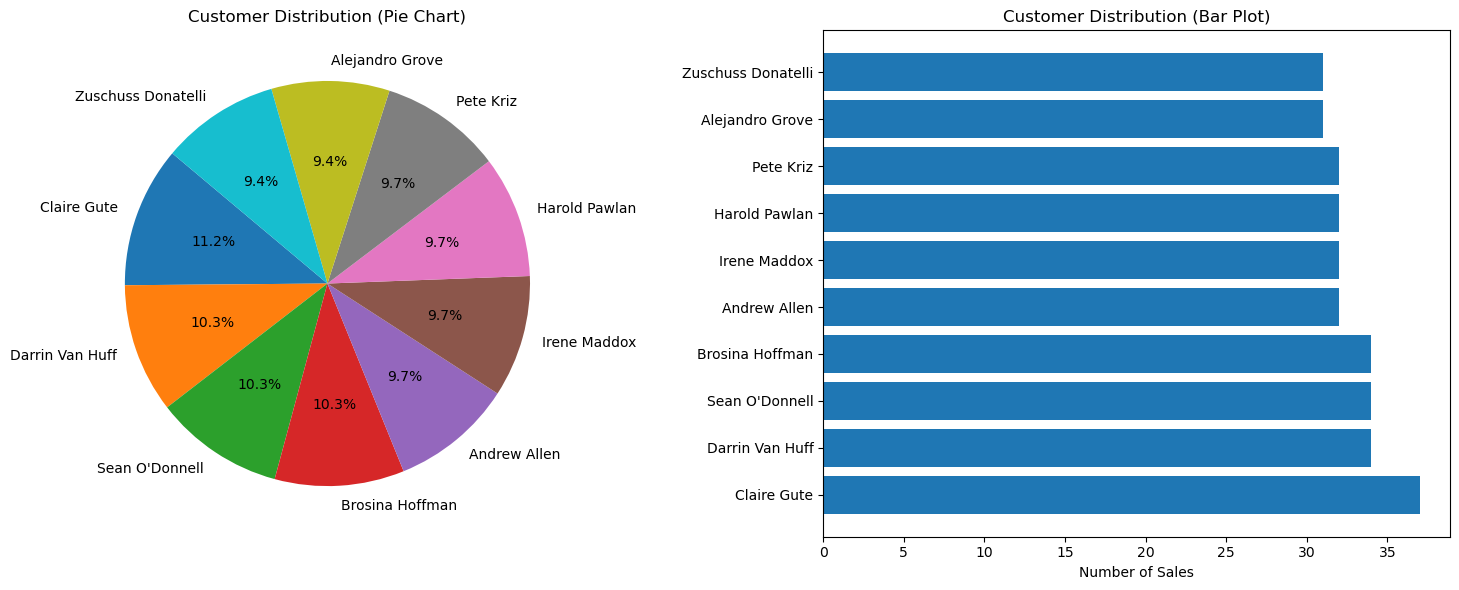

In [1763]:
uni_cat_analysis(df['Customer Name'].value_counts()[:10],df['Customer Name'].unique()[:10],'Customer Distribution','Customer Name')

# Segment

In [1764]:
print(df['Segment'].dtype)


object


In [1765]:
df['Segment'].value_counts(normalize=True)*100

Segment
Consumer      51.94
Corporate     30.22
Home Office   17.84
Name: proportion, dtype: float64

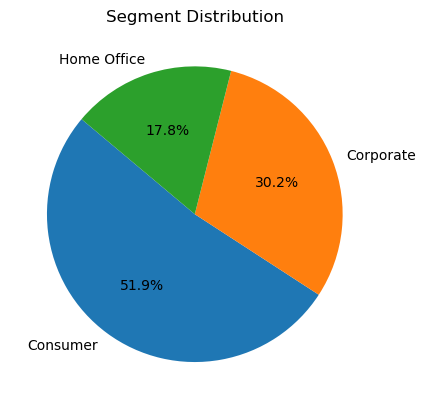

In [1766]:
plt.pie(df.Segment.value_counts() , labels=df.Segment.unique(),autopct= '%1.1f%%',startangle=140)
plt.title('Segment Distribution')
plt.show()

###### It indicates the relative presence of each segment, illustrating that Consumer holds the largest portion, followed by Corporate and Home Office in decreasing order of prevalence.

# City

In [1767]:
print(df.City.dtype)

object


In [1768]:
df.City.value_counts(normalize=True) * 100

City
New York City     9.16
Los Angeles       7.47
Philadelphia      5.37
San Francisco     5.10
Seattle           4.28
                  ... 
Glenview          0.01
Missouri City     0.01
Rochester Hills   0.01
Palatine          0.01
Manhattan         0.01
Name: proportion, Length: 531, dtype: float64

In [1769]:
df.City.describe()

count              9994
unique              531
top       New York City
freq                915
Name: City, dtype: object

## Define a function to generate pichart


 ------------------------- Value count %  -------------------------
City
New York City     9.16
Los Angeles       7.47
Philadelphia      5.37
San Francisco     5.10
Seattle           4.28
                  ... 
Glenview          0.01
Missouri City     0.01
Rochester Hills   0.01
Palatine          0.01
Manhattan         0.01
Name: proportion, Length: 531, dtype: float64

 ------------------------- Describe -------------------------
count              9994
unique              531
top       New York City
freq                915
Name: City, dtype: object


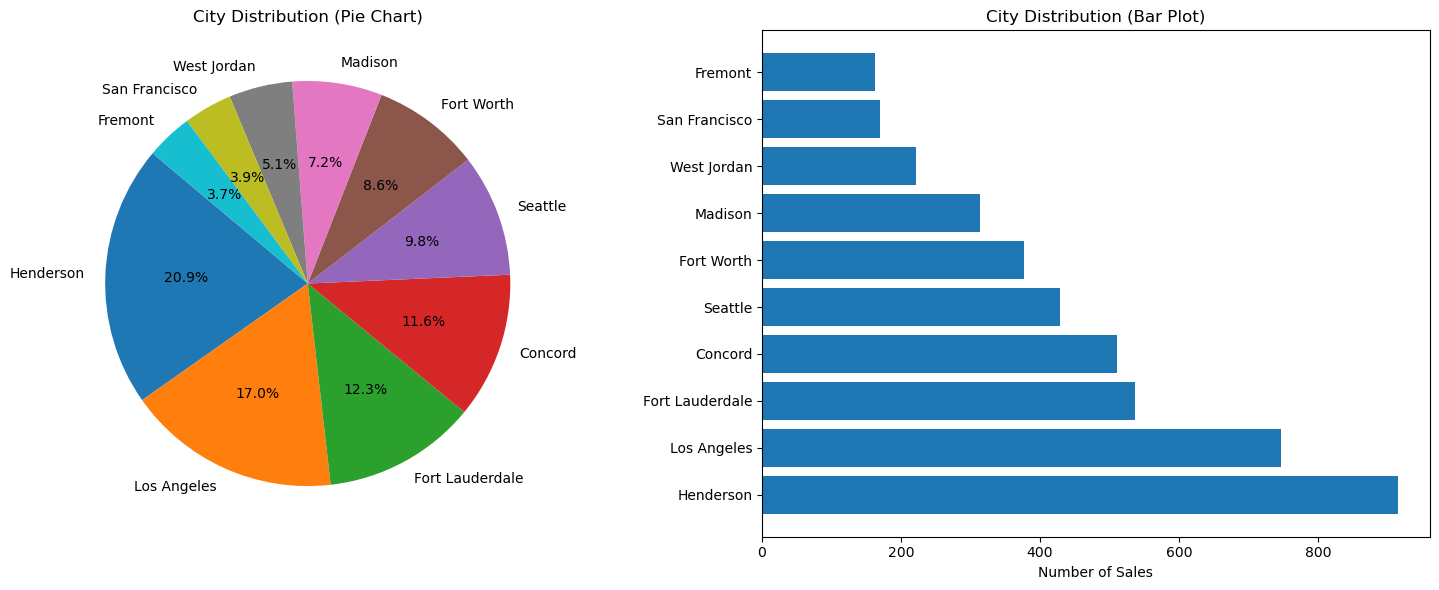

In [1770]:
uni_cat_analysis(df.City.value_counts()[:10],df.City.unique()[:10],'City Distribution','City')

In [1771]:
df.City.value_counts()[:10]

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: count, dtype: int64

#### These numbers represent the number of sales in each city within the dataset, ranking them from the highest count (New York City) to the lowest count (Springfield) among the top 10 cities.

# State

In [1772]:
df.State.nunique()

49


 ------------------------- Value count %  -------------------------
State
California             20.02
New York               11.29
Texas                   9.86
Pennsylvania            5.87
Washington              5.06
Illinois                4.92
Ohio                    4.69
Florida                 3.83
Michigan                2.55
North Carolina          2.49
Arizona                 2.24
Virginia                2.24
Georgia                 1.84
Tennessee               1.83
Colorado                1.82
Indiana                 1.49
Kentucky                1.39
Massachusetts           1.35
New Jersey              1.30
Oregon                  1.24
Wisconsin               1.10
Maryland                1.05
Delaware                0.96
Minnesota               0.89
Connecticut             0.82
Oklahoma                0.66
Missouri                0.66
Alabama                 0.61
Arkansas                0.60
Rhode Island            0.56
Utah                    0.53
Mississippi             0.

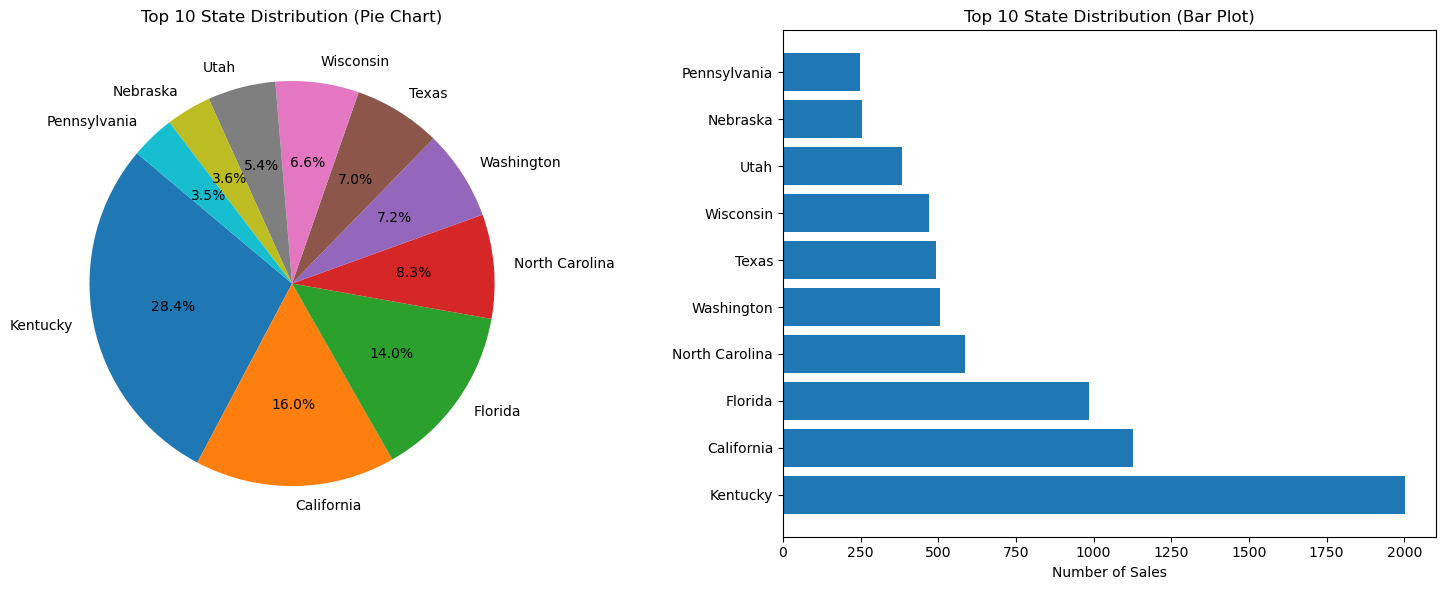

In [1773]:
uni_cat_analysis(df.State.value_counts()[:10],df.State.unique()[:10],'Top 10 State Distribution','State')

#### These figures represent the proportion of sales attributed to each state in the dataset. California accounts for the highest percentage of sales, followed by New York and Texas, and so forth in decreasing order of sales contribution among the top 10 states.

# Postal Code

In [1774]:
df['Postal Code'].nunique()

631


 ------------------------- Value count %  -------------------------
Postal Code
10035   2.63
10024   2.30
10009   2.29
94122   2.03
10011   1.93
        ... 
27534   0.01
53186   0.01
32503   0.01
94509   0.01
63376   0.01
Name: proportion, Length: 631, dtype: float64

 ------------------------- Describe -------------------------
count      9994
unique      631
top       10035
freq        263
Name: Postal Code, dtype: int64


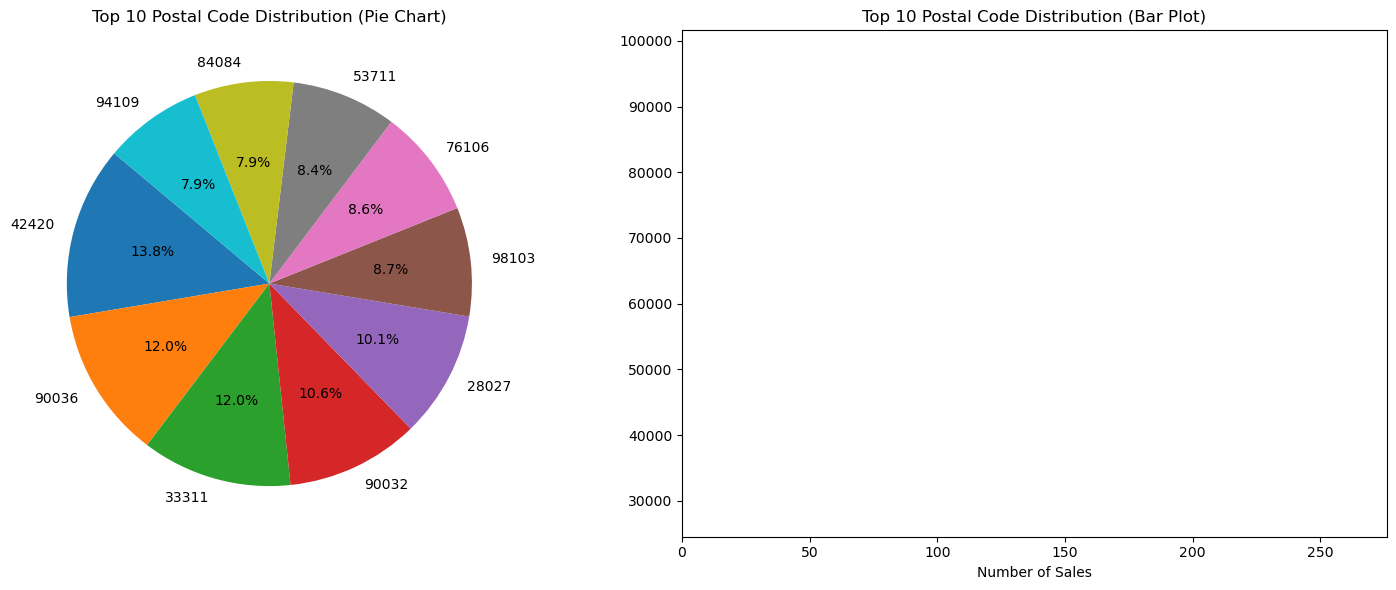

In [1775]:
uni_cat_analysis(df['Postal Code'].value_counts()[0:10],df['Postal Code'].unique()[0:10],'Top 10 Postal Code Distribution' ,'Postal Code')


# Product ID

In [1776]:
df['Product ID']

0       FUR-BO-10001798
1       FUR-CH-10000454
2       OFF-LA-10000240
3       FUR-TA-10000577
4       OFF-ST-10000760
             ...       
9989    FUR-FU-10001889
9990    FUR-FU-10000747
9991    TEC-PH-10003645
9992    OFF-PA-10004041
9993    OFF-AP-10002684
Name: Product ID, Length: 9994, dtype: object

In [1777]:
df.Category

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object

In [1778]:
df.SubCategory

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9989    Furnishings
9990    Furnishings
9991         Phones
9992          Paper
9993     Appliances
Name: SubCategory, Length: 9994, dtype: object

#### Product ID consists of 3 parts : first part is category , second part is subCategory and the third one is the ID
    I used it to fill out the misiing values , it is not valuable anymore , im gonna drop it 

In [1779]:
df.drop(columns='Product ID',inplace=True)

# Region


 ------------------------- Value count %  -------------------------
Region
West      32.05
East      28.50
Central   23.24
South     16.21
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count     9994
unique       4
top       West
freq      3203
Name: Region, dtype: object


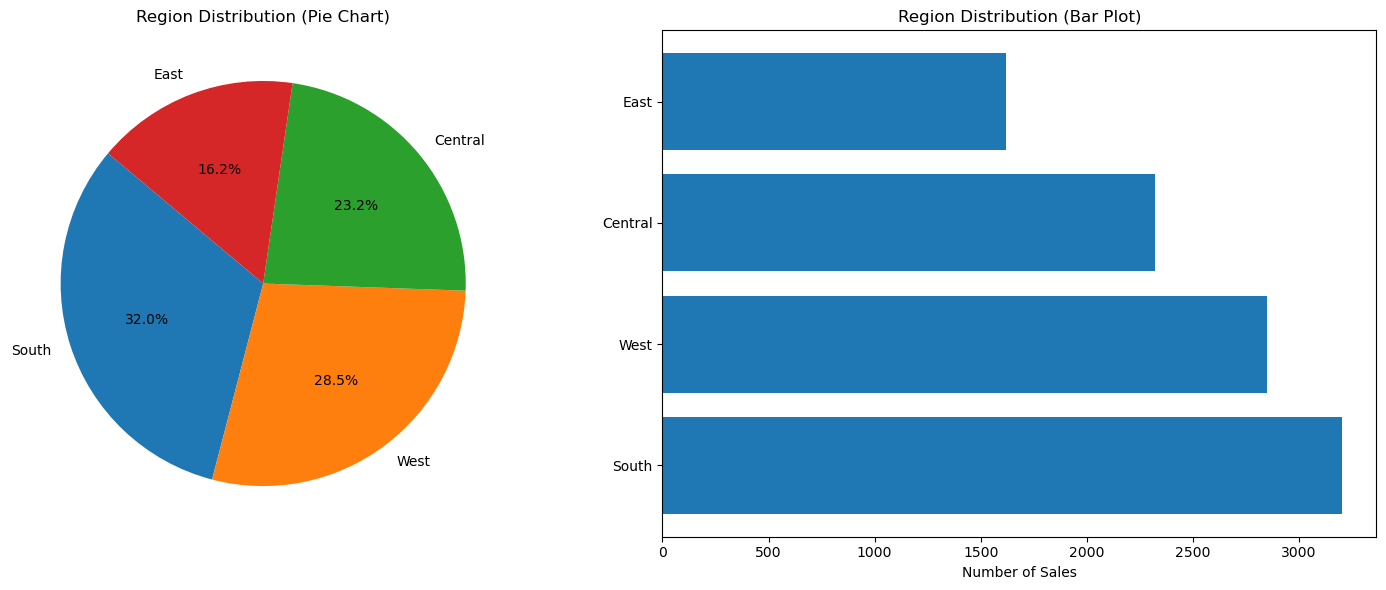

In [1780]:
uni_cat_analysis(df.Region.value_counts(),df.Region.unique(),'Region Distribution','Region')

#### This data highlights the varying proportions of sales across different regions, demonstrating that the West region has the highest share of sales, followed by the East, Central, and then the South in decreasing order of sales contribution among the regions.

# Category


 ------------------------- Value count %  -------------------------
Category
Office Supplies   60.30
Furniture         21.22
Technology        18.48
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object


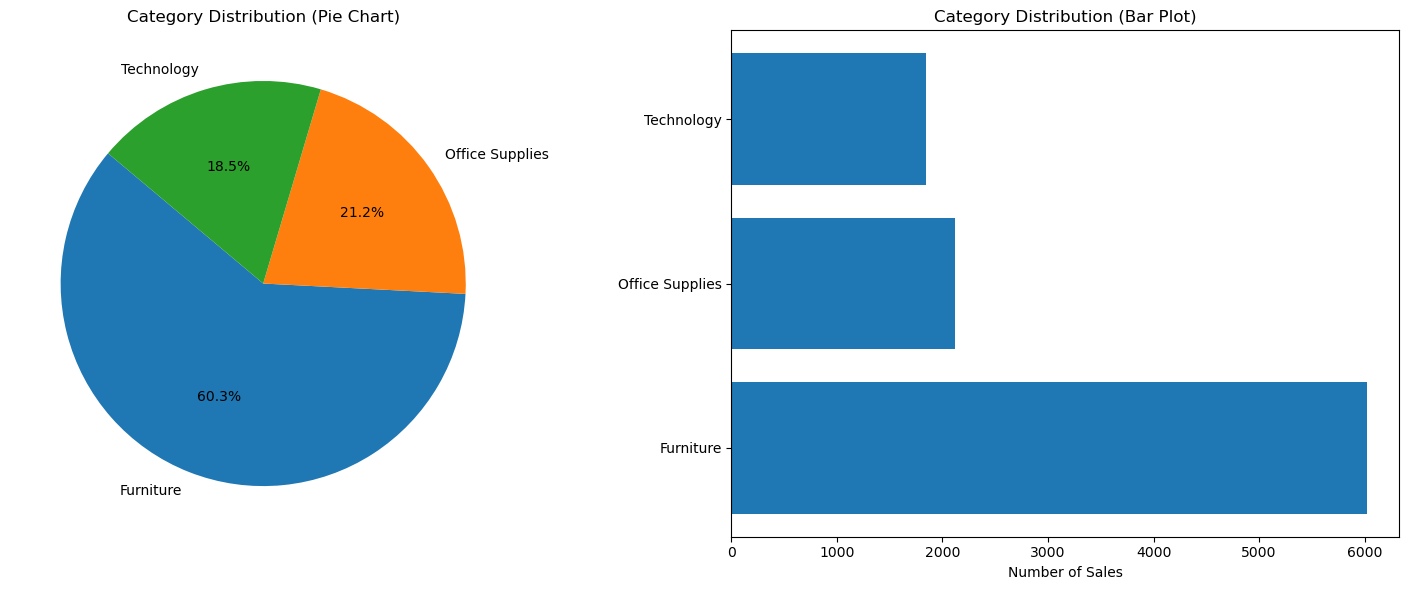

In [1781]:
uni_cat_analysis(df.Category.value_counts(),df.Category.unique(),'Category Distribution','Category')

#### This information showcases the varying proportions of sales across different product categories, indicating that Office Supplies account for the largest share of sales, followed by Furniture and then Technology in decreasing order of sales contribution among the categories.






# SubCategory


 ------------------------- Value count %  -------------------------
SubCategory
Binders       15.24
Paper         13.71
Furnishings    9.58
Phones         8.90
Storage        8.47
Art            7.96
Accessories    7.75
Chairs         6.17
Appliances     4.66
Labels         3.64
Tables         3.19
Envelopes      2.54
Bookcases      2.28
Fasteners      2.17
Supplies       1.90
Machines       1.15
Copiers        0.68
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count        9994
unique         17
top       Binders
freq         1523
Name: SubCategory, dtype: object


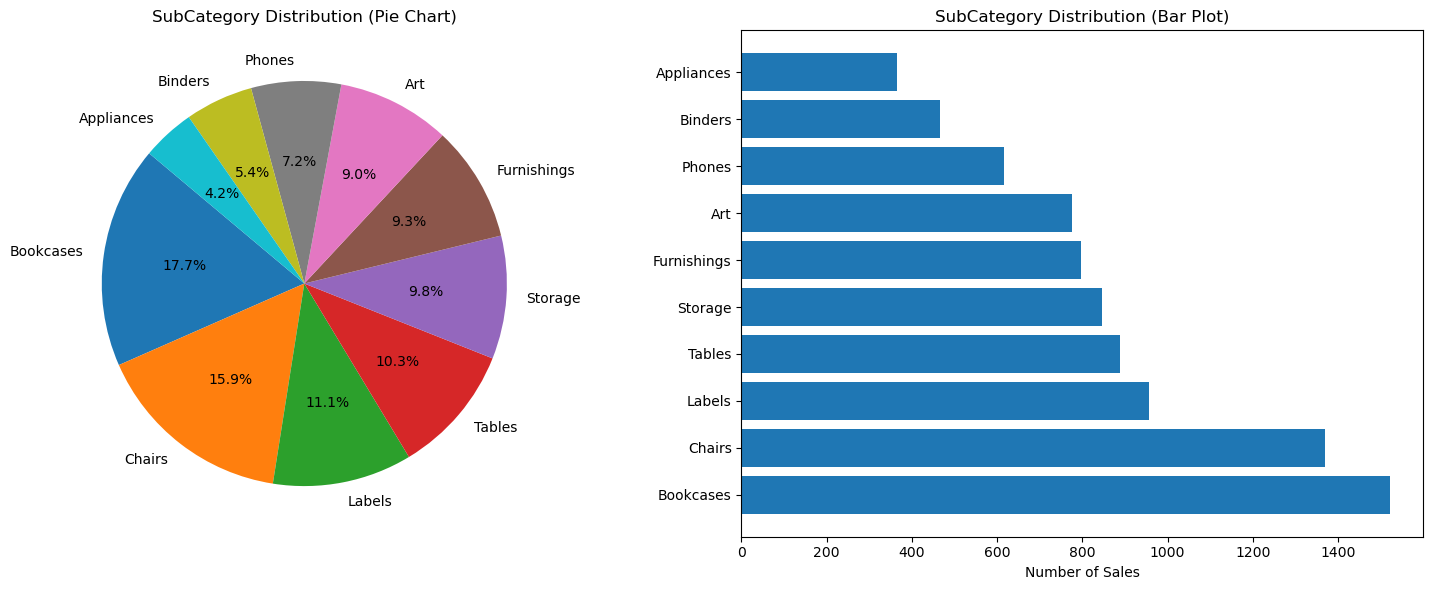

In [1782]:
uni_cat_analysis(df.SubCategory.value_counts()[:10],df.SubCategory.unique()[:10],'SubCategory Distribution','SubCategory')

#### These figures display the proportions of sales attributed to each subcategory, highlighting the varying contributions among the top 10 subcategories in the dataset.the data indicates that "Binders" have the highest proportion of sales, accounting for approximately 15.24% of the total sales


# Product Name

In [1783]:
df['Product Name'].nunique()

1850

In [1784]:
(df['Product Name'].value_counts(normalize=True)*100)[:10]

Product Name
Staple envelope                                             0.48
Staples                                                     0.46
Easy-staple paper                                           0.46
Avery Non-Stick Binders                                     0.20
Staples in misc. colors                                     0.19
Staple remover                                              0.18
KI Adjustable-Height Table                                  0.18
Storex Dura Pro Binders                                     0.17
Staple-based wall hangings                                  0.16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling   0.15
Name: proportion, dtype: float64


 ------------------------- Value count -------------------------
Product Name
Staple envelope                                                                       0.48
Staples                                                                               0.46
Easy-staple paper                                                                     0.46
Avery Non-Stick Binders                                                               0.20
Staples in misc. colors                                                               0.19
                                                                                      ... 
Boston 1900 Electric Pencil Sharpener                                                 0.01
RCA ViSYS 25423RE1 Corded phone                                                       0.01
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner   0.01
Newell 342                                                                            0.01
Eldon Jumbo

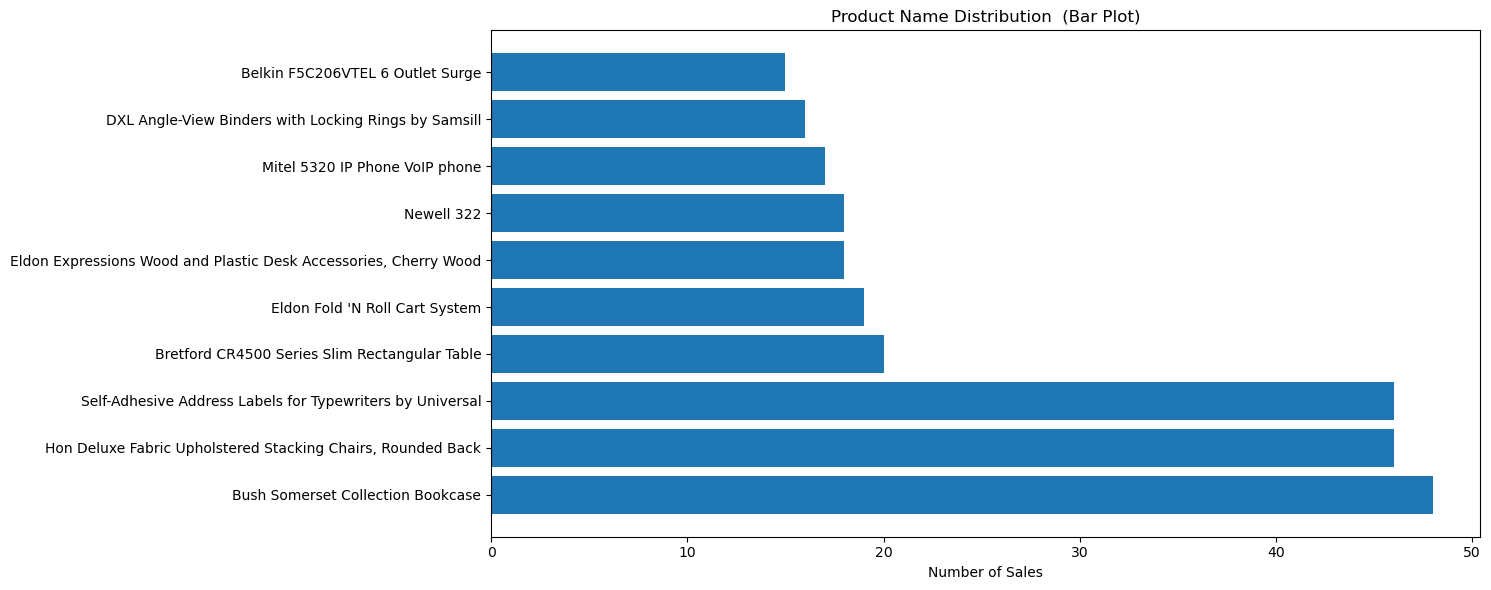

In [1785]:

print('\n', '-' * 25, 'Value count', '-' * 25)
print(df['Product Name'].value_counts(normalize=True) * 100)
print('\n', '-' * 25, 'Describe', '-' * 25)
print(df['Product Name'].describe())

plt.figure(figsize=(15, 6))

# Create a horizontal bar plot
plt.barh(df['Product Name'].unique()[:10], df['Product Name'].value_counts()[:10])
plt.xlabel('Number of Sales')
plt.title('Product Name Distribution ' + ' (Bar Plot)')

plt.tight_layout()
plt.show()

#### The figures represent the top 10 products based on their sales percentages within the dataset. They indicate the relative sales contributions of these products compared to others in the top 10 list, despite their smaller proportions in the overall sales.

# Sales

In [1786]:
print(df.Sales.describe())

count    9994.00
mean      229.86
std       623.25
min         0.44
25%        17.28
50%        54.49
75%       209.94
max     22638.48
Name: Sales, dtype: float64


In [1787]:
from scipy.stats import skew

print(skew(df['Sales']))

12.970805179533526


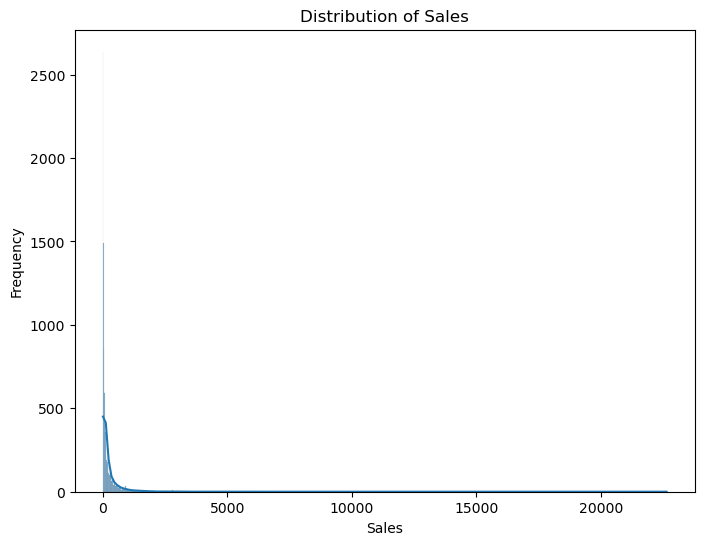

In [1788]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sales', kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Quantity

In [1789]:
df.Quantity.nunique()

54

In [1790]:
df.Quantity.describe()

count   9994.00
mean       3.80
std        2.19
min        1.00
25%        2.00
50%        3.00
75%        5.00
max       14.00
Name: Quantity, dtype: float64

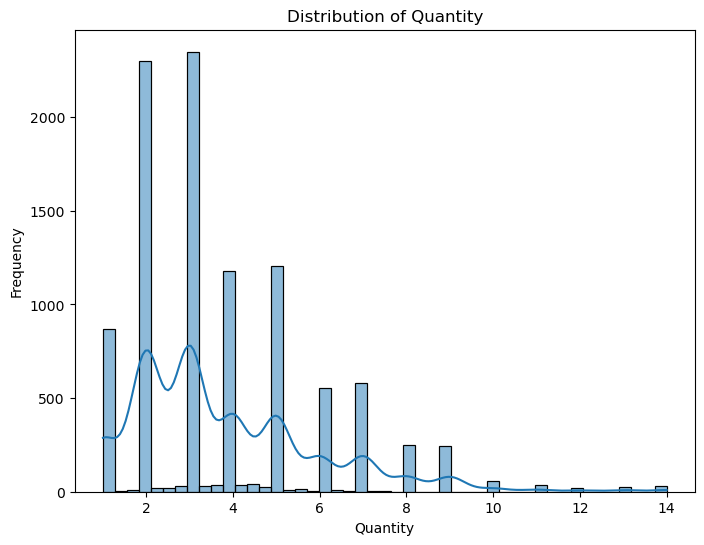

In [1791]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Quantity', kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# product_sub_cat

In [1792]:
df.product_sub_cat.nunique()

17

In [1793]:
print(df.product_sub_cat.dtype)

object


##### I created this new feature by extracting information from the 'Order ID', using it to populate missing values in the 'SubCategory' feature. This new feature comprises abbreviated versions of the 'SubCategory' feature.So it is not valueable anymore and im goona drop it 

In [1794]:
df.drop(columns='product_sub_cat' , inplace=True)

# Discount

In [1795]:
df.Discount.describe()

count   9994.00
mean       0.16
std        0.21
min        0.00
25%        0.00
50%        0.20
75%        0.20
max        0.80
Name: Discount, dtype: float64

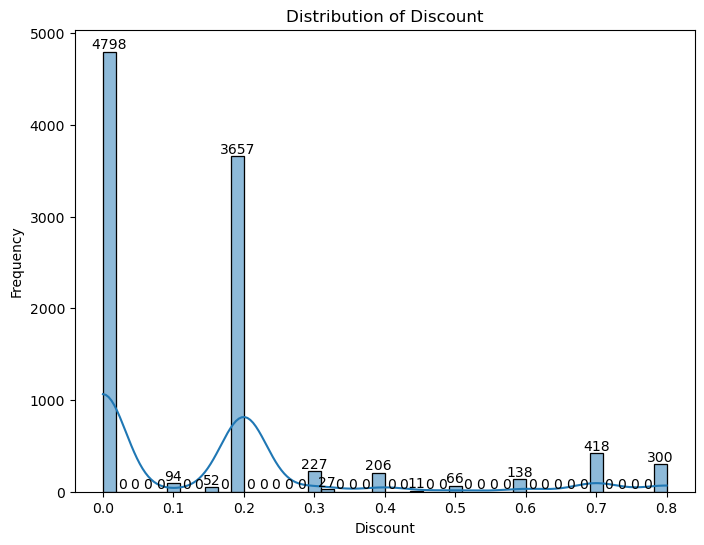

In [1796]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Discount', kde=True)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
for rect in plt.gca().patches:
    plt.gca().annotate(f"{rect.get_height():.0f}", (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

plt.show()


##### Most of the orders do not include a discount (4978 times). This can be investigated by examining the sales status to determine its impact on sales or profit

In [1797]:
sales_sum_with_discount = (df[df['HasDiscount']==1]['Sales']).sum()
sales_sum_without_discount = (df[df['HasDiscount']==0]['Sales']).sum()
profit_sum_with_discount = (df[df['HasDiscount']==1]['Profit']).sum()
profit_sum_without_discount = (df[df['HasDiscount']==0]['Profit']).sum()

In [1798]:
sales_sum_with_discount,sales_sum_without_discount

(1209292.3903, 1087908.4700000002)

In [1799]:
profit_sum_with_discount,profit_sum_without_discount

(19041.771500000003, 163336.03915)

# Analysis Summary

## Sales and Profit Comparison:

- **Sales Sum with Discount:** $900,082.22

- **Sales Sum without Discount:** $756,349.65

- **Profit Sum with Discount:** -$34,590.58

- **Profit Sum without Discount:** $320,987.60

    This data suggests that the total sales amount is higher when a discount is applied. However, the total profit is surprisingly negative when a discount is involved. On the other hand, the profit is notably higher when orders are placed without any discount.



# order_destination / Order Distributer

In [1800]:
df.order_destination.nunique()

2


 ------------------------- Value count %  -------------------------
order_destination
CA   83.13
US   16.87
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count     9994
unique       2
top         CA
freq      8308
Name: order_destination, dtype: object


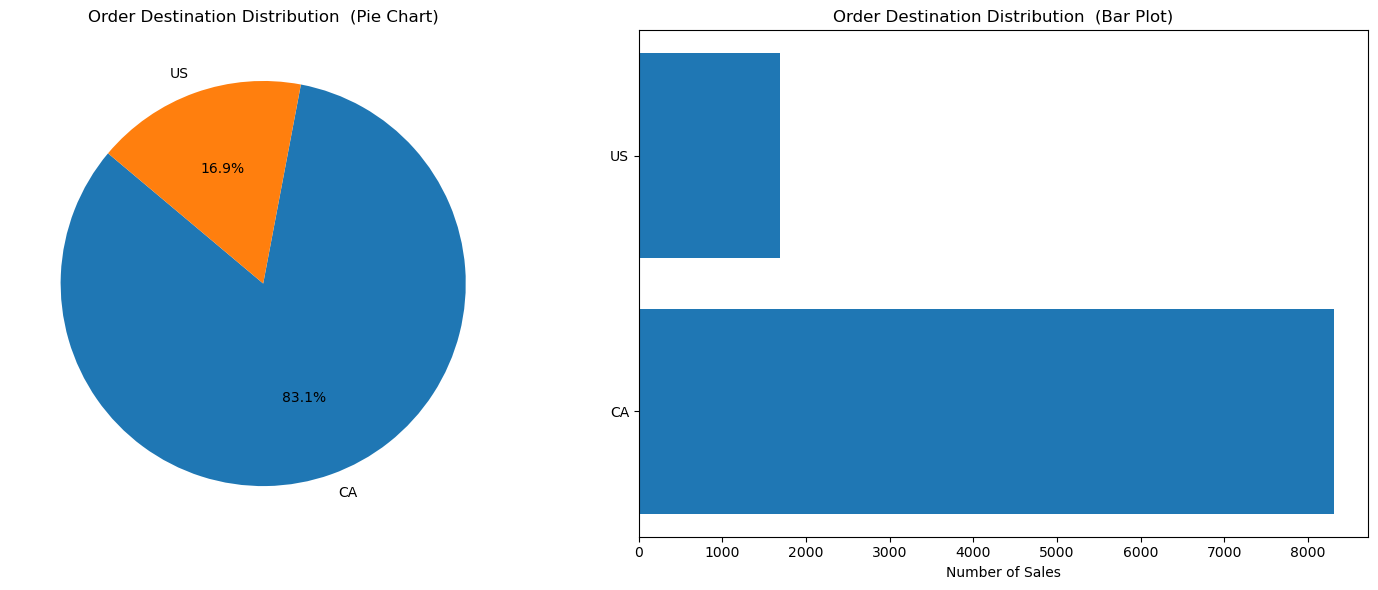

In [1801]:
uni_cat_analysis(df.order_destination.value_counts(),df.order_destination.unique(),'Order Destination Distribution ','order_destination')

### This suggests that the majority of the orders, approximately 83.13%, are destined for a location labeled as 'CA', potentially indicating a specific region or entity, while the remaining 16.87% of orders are directed to other locations represented by 'US' within the dataset.






# Order_year


 ------------------------- Value count %  -------------------------
Order_year
2017   33.14
2016   25.89
2015   21.03
2014   19.94
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count   9994.00
mean    2015.72
std        1.12
min     2014.00
25%     2015.00
50%     2016.00
75%     2017.00
max     2017.00
Name: Order_year, dtype: float64


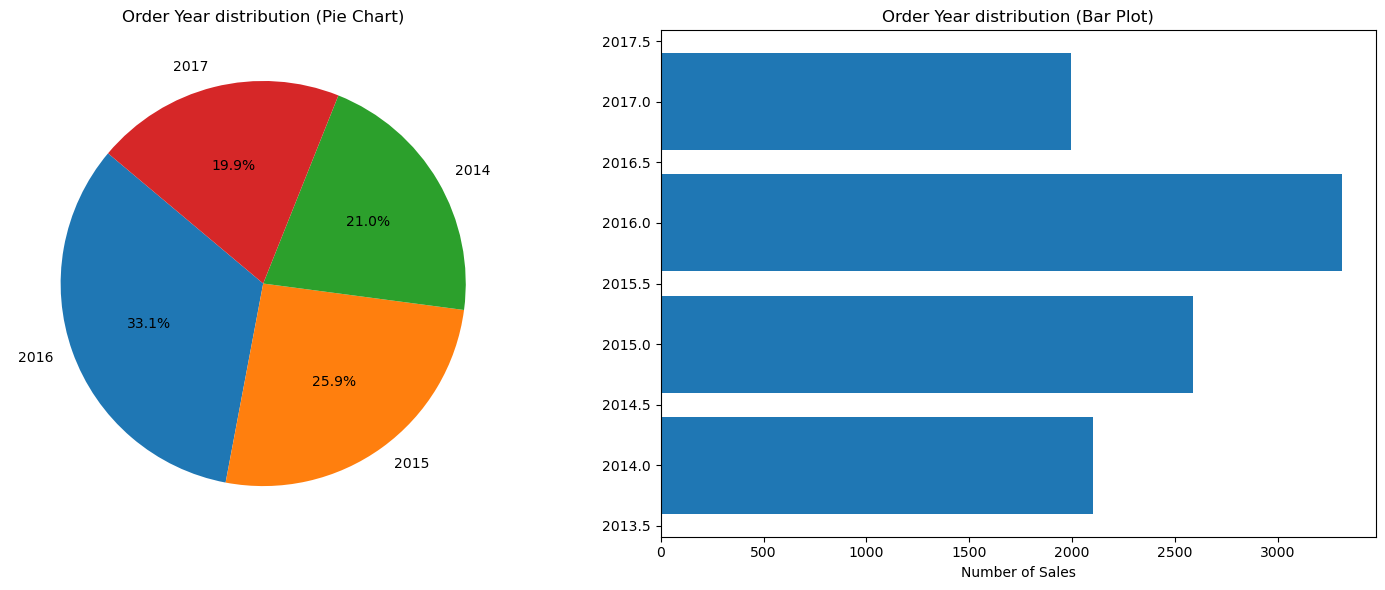

In [1802]:
uni_cat_analysis(df.Order_year.value_counts() , df.Order_year.unique(),'Order Year distribution' ,'Order_year')

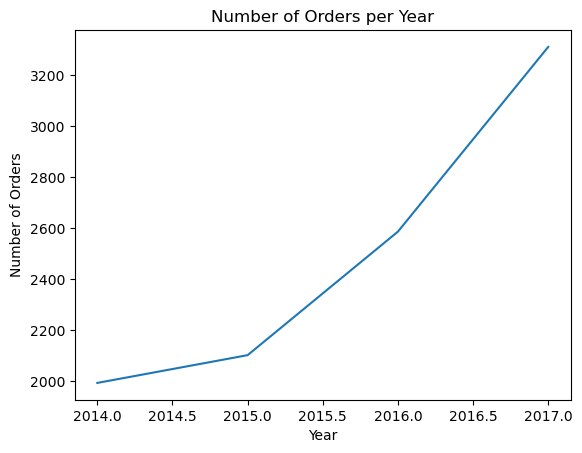

In [1803]:
order_counts = df['Order_year'].value_counts().sort_index()
# Plotting the line plot
sns.lineplot(x=order_counts.index, y=order_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Year')
plt.show()


### This indicates a consistent upward trend in sales over the four-year period. The numbers suggest a positive growth trajectory, reflecting an increase in sales revenue from year to year.






# Order_month


 ------------------------- Value count %  -------------------------
Order_month
11   14.72
12   14.09
9    13.84
10    8.19
5     7.35
6     7.17
7     7.10
8     7.06
3     6.96
4     6.68
1     3.81
2     3.00
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count   9994.00
mean       7.81
std        3.28
min        1.00
25%        5.00
50%        9.00
75%       11.00
max       12.00
Name: Order_month, dtype: float64


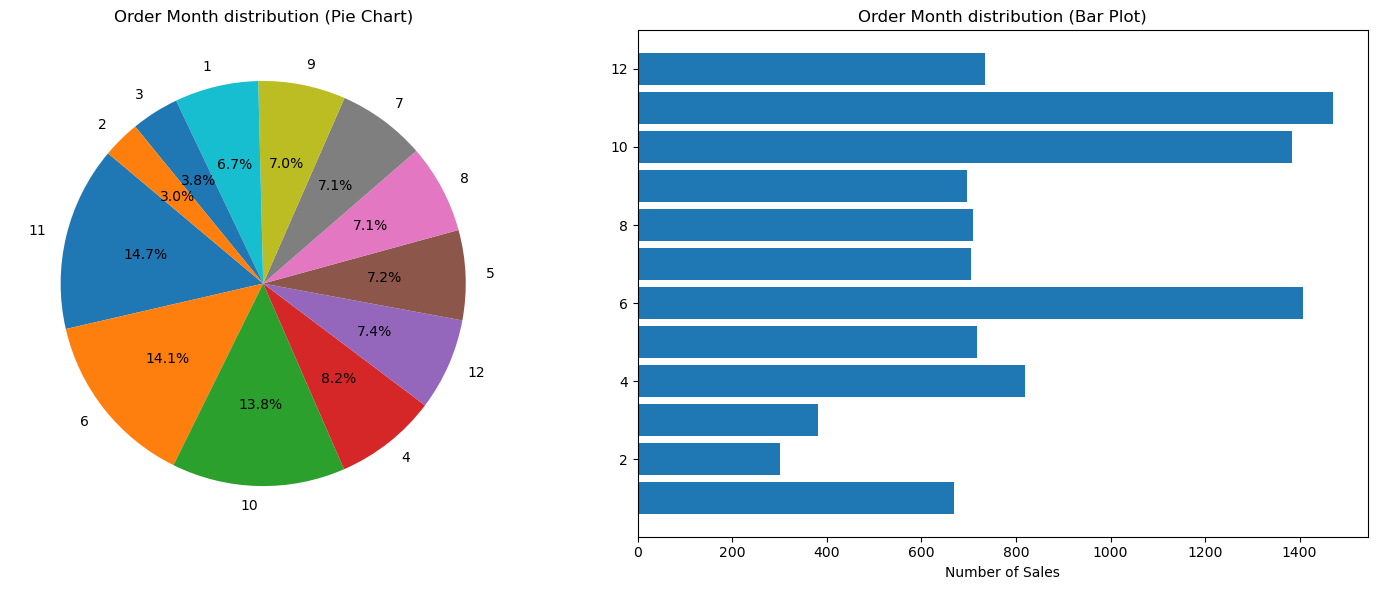

In [1804]:
uni_cat_analysis(df.Order_month.value_counts(),df.Order_month.unique() , 'Order Month distribution' , 'Order_month')

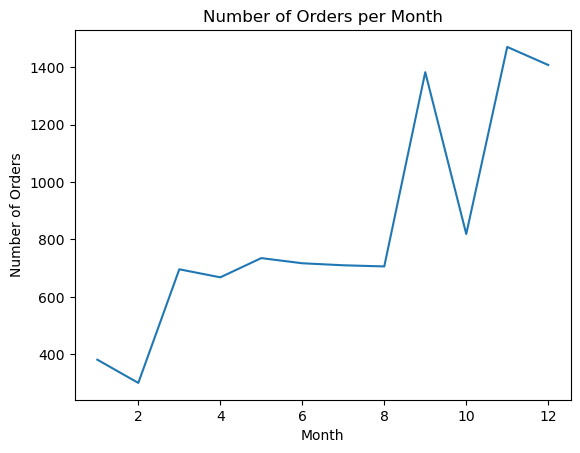

In [1805]:
order_month_values = df.Order_month.value_counts().sort_index()
sns.lineplot(x=order_month_values.index , y=order_month_values.values)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.show()

##### This data provides insights into the seasonal variation in the number of orders. November and December exhibit higher order counts, possibly due to holiday seasons and events like Black Friday, Christmas, and New Year's. On the other hand, the lower counts in January and February might be attributed to post-holiday lulls or reduced consumer spending after the festive season. The variations in the mid-year months indicate a relatively stable period for orders.

# Order_DayInMonth


 ------------------------- Value count %  -------------------------
Order_DayInMonth
20   3.98
21   3.96
2    3.79
5    3.66
3    3.65
26   3.65
11   3.59
23   3.58
8    3.56
17   3.52
14   3.48
12   3.45
9    3.44
13   3.38
1    3.37
19   3.35
25   3.34
18   3.28
4    3.08
24   3.02
10   3.00
7    2.98
30   2.95
6    2.85
22   2.84
28   2.84
27   2.73
15   2.71
16   2.69
29   2.39
31   1.83
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count   9994.00
mean      15.47
std        8.75
min        1.00
25%        8.00
50%       15.00
75%       23.00
max       31.00
Name: Order_DayInMonth, dtype: float64


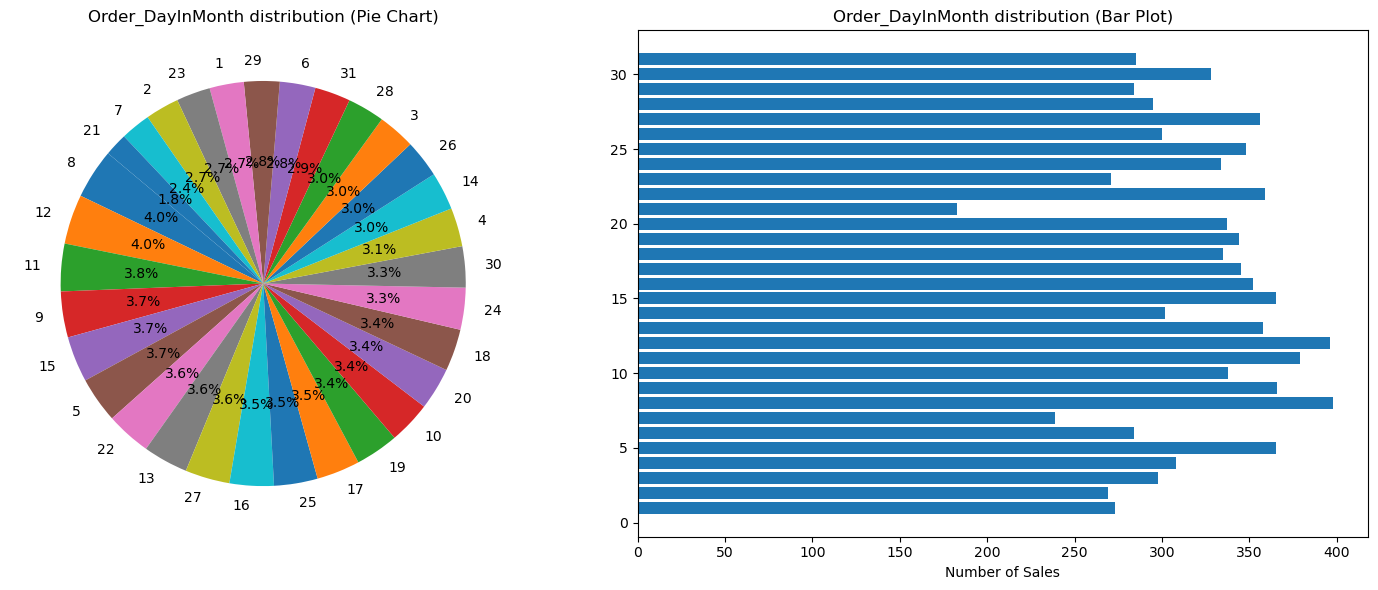

In [1806]:
uni_cat_analysis(df.Order_DayInMonth.value_counts(),df.Order_DayInMonth.unique() , 'Order_DayInMonth distribution' , 'Order_DayInMonth')

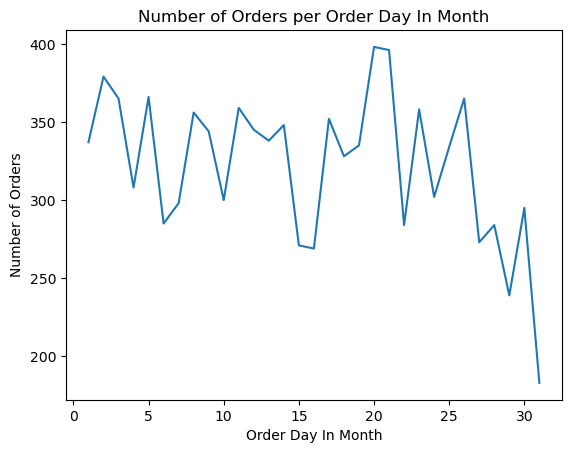

In [1807]:
order_DayInMonth_values = df.Order_DayInMonth.value_counts().sort_index()
sns.lineplot(x=order_DayInMonth_values.index , y=order_DayInMonth_values.values)
plt.xlabel('Order Day In Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Order Day In Month')
plt.show()

**The 20th and 21st of the month have the highest order counts, with 398 and 396 orders, respectively.**

**Days at the beginning and the end of the month tend to have lower order counts.**

**The 2nd, 3rd, 5th, and 26th have moderately high counts ranging between 365 to 379 orders.**

**Mid-month days, from the 11th to the 17th, have counts ranging from 328 to 359 orders**

The end of the month, specifically the 29th and 31st, sees a decrease in orders, with 239 and 183 orders, respectively.
The 1st of the month has a count of 337 orders, but orders tend to be lower for other dates closer to the end of the month.
This data could suggest several things: certain days of the month, such as the 20th and 21st, might be linked to events like paydays or promotions that lead to increased orders. Days at the beginning or end of the month might witness fewer orders, potentially due to factors like financial cycles, bill payments, or seasonal influences.



# Order_DayName


 ------------------------- Value count %  -------------------------
Order_DayName
Monday      18.72
Friday      18.19
Sunday      17.11
Saturday    16.56
Thursday    14.64
Tuesday     11.07
Wednesday    3.71
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count       9994
unique         7
top       Monday
freq        1871
Name: Order_DayName, dtype: object


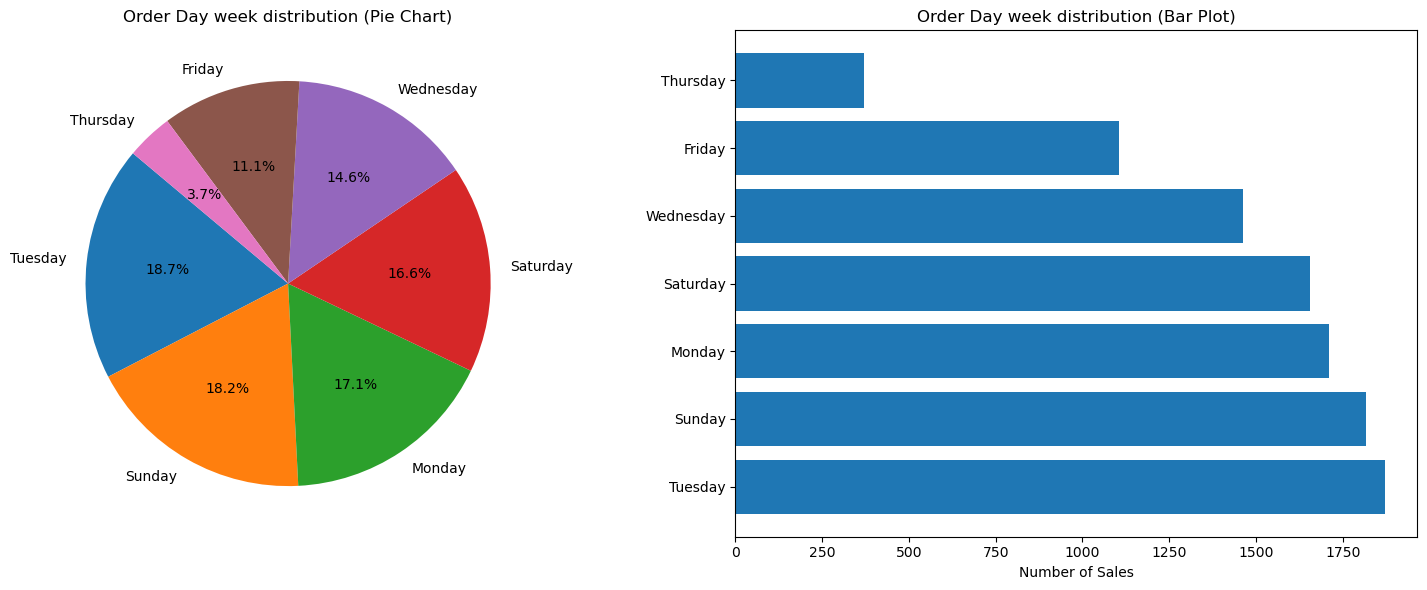

In [1808]:
uni_cat_analysis(df.Order_DayName.value_counts(),df.Order_DayName.unique() , 'Order Day week distribution' , 'Order_DayName')

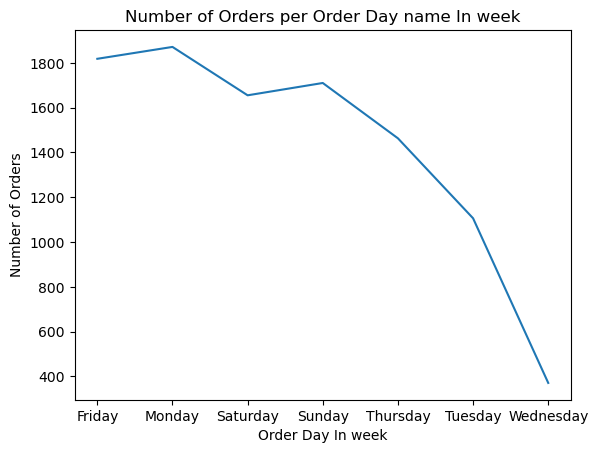

In [1809]:
order_DayInweek_values = df.Order_DayName.value_counts().sort_index()
sns.lineplot(x=order_DayInweek_values.index , y=order_DayInweek_values.values)
plt.xlabel('Order Day In week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Order Day name In week')
plt.show()

#### This data suggests varying order patterns throughout the days of the week. Typically, higher order counts on Mondays and Fridays might indicate increased shopping activity at the beginning and towards the end of the standard workweek. Sunday's high count could indicate weekend shopping, while the lower counts on Wednesdays might suggest reduced shopping activity midweek.

# ship_duraition

In [1810]:
df.ship_duraition.describe()

count   9994.00
mean       3.96
std        1.75
min        0.00
25%        3.00
50%        4.00
75%        5.00
max        7.00
Name: ship_duraition, dtype: float64


 ------------------------- Value count %  -------------------------
ship_duraition
4   27.76
5   21.70
2   13.35
6   12.04
3   10.06
7    6.21
0    5.19
1    3.69
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count   9994.00
mean       3.96
std        1.75
min        0.00
25%        3.00
50%        4.00
75%        5.00
max        7.00
Name: ship_duraition, dtype: float64


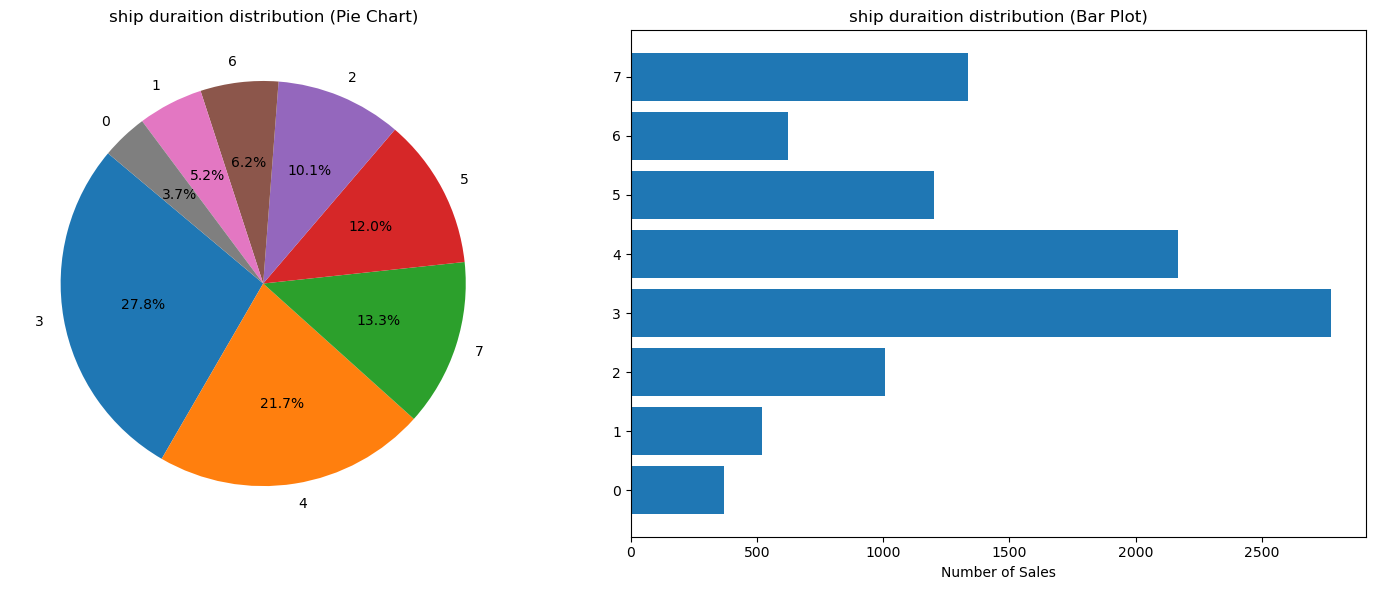

In [1811]:
uni_cat_analysis(df.ship_duraition.value_counts(),df.ship_duraition.unique() , 'ship duraition distribution' , 'ship_duraition')

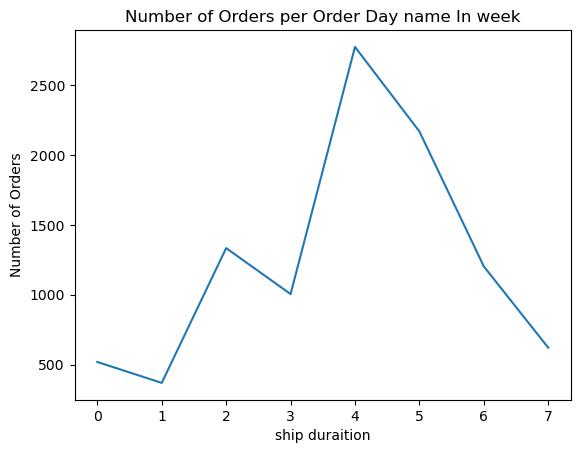

In [1812]:
order_DayInweek_values = df.ship_duraition.value_counts().sort_index()
sns.lineplot(x=order_DayInweek_values.index , y=order_DayInweek_values.values)
plt.xlabel('ship duraition')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Order Day name In week')
plt.show()

4 days shipping duration has the highest count of orders, with 2774 occurrences.

Following that, 5 days shipping duration is the next highest with 2169 occurrences.

2 days and 6 days shipping durations come after, with 1334 and 1203 occurrences, respectively.

3 days shipping duration has 1005 occurrences.

7 days shipping duration follows with 621 occurrences.

There are orders with a 0-day shipping duration, indicating perhaps same-day delivery or pickup, with 519 occurrences.

The lowest count is for 1-day shipping duration, with 369 occurrences.


# HasDiscount


 ------------------------- Value count %  -------------------------
HasDiscount
1   51.99
0   48.01
Name: proportion, dtype: float64

 ------------------------- Describe -------------------------
count   9994.00
mean       0.52
std        0.50
min        0.00
25%        0.00
50%        1.00
75%        1.00
max        1.00
Name: HasDiscount, dtype: float64


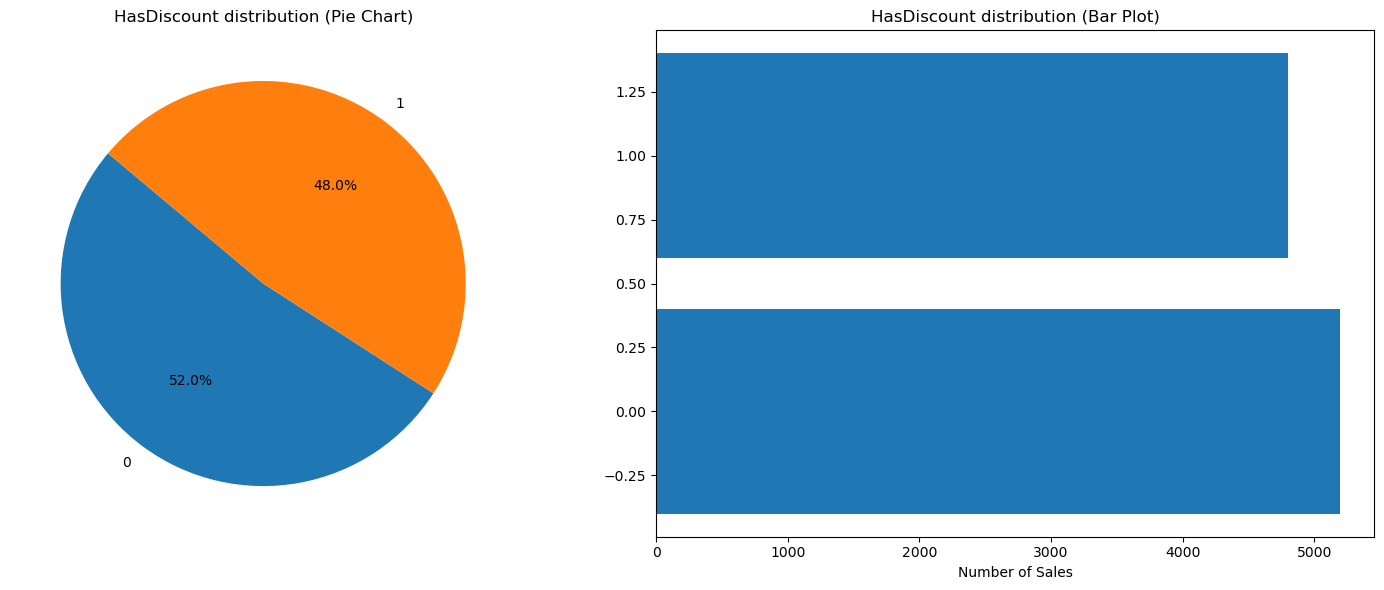

In [1813]:
uni_cat_analysis(df.HasDiscount.value_counts(),df.HasDiscount.unique() , 'HasDiscount distribution' , 'HasDiscount')

#### 5196 orders have a discount (HasDiscount = 1).
#### 4798 orders do not have a discount (HasDiscount = 0).
    This data shows the distribution of orders between those that receive a discount and those that do not

In [1814]:
df_copy=df.copy()

# Bi-variate Analysis

In [1815]:
df=df_copy.copy()

## What is the average order value for each shipping mode?


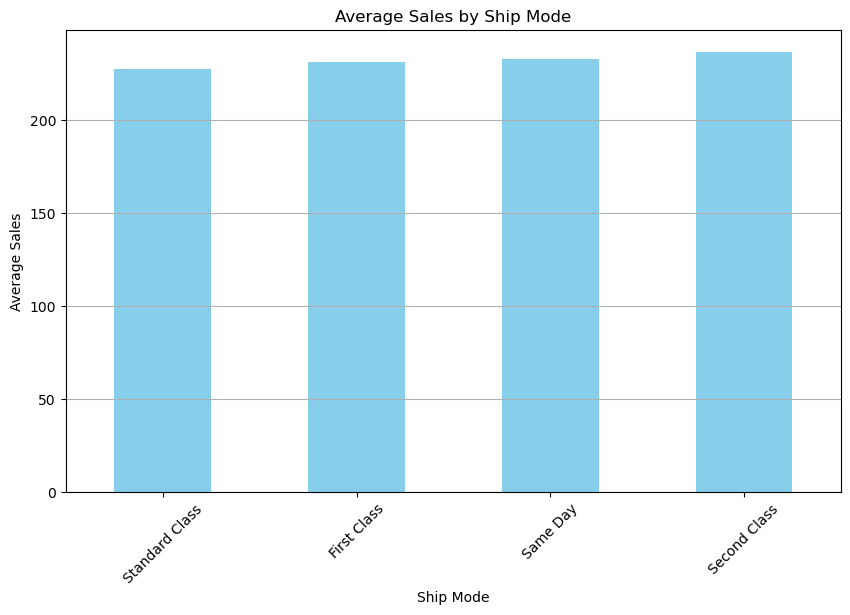

Ship Mode
Standard Class   227.26
First Class      230.90
Same Day         232.64
Second Class     236.50
Name: Sales, dtype: float64

In [1816]:
average_sales_ship_mode = df.groupby('Ship Mode')['Sales'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
average_sales_ship_mode.plot(kind='bar', color='skyblue')
plt.ylabel('Average Sales')
plt.title('Average Sales by Ship Mode')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
average_sales_ship_mode

## What is the average sales value for each sub-category product?


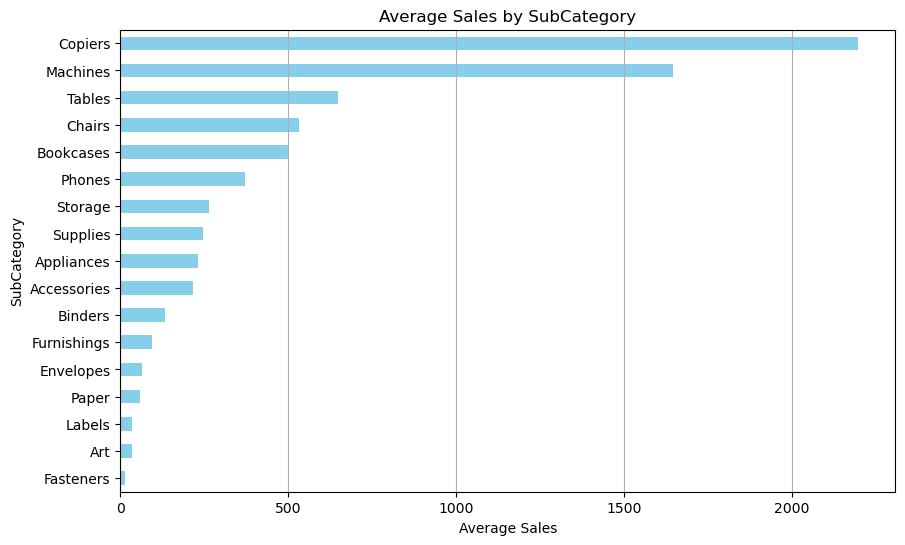

In [1817]:
average_sales = df.groupby('SubCategory')['Sales'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
average_sales.plot(kind='barh', color='skyblue')
plt.xlabel('Average Sales')
plt.title('Average Sales by SubCategory')
plt.grid(axis='x')
plt.show()


In [1818]:
average_sales


SubCategory
Fasteners       13.94
Art             34.07
Labels          34.30
Paper           57.28
Envelopes       64.87
Furnishings     95.83
Binders        133.56
Accessories    215.97
Appliances     230.76
Supplies       245.65
Storage        264.59
Phones         371.21
Bookcases      503.86
Chairs         532.33
Tables         648.79
Machines      1645.55
Copiers       2198.94
Name: Sales, dtype: float64

## How does the average order value for each customer segment?


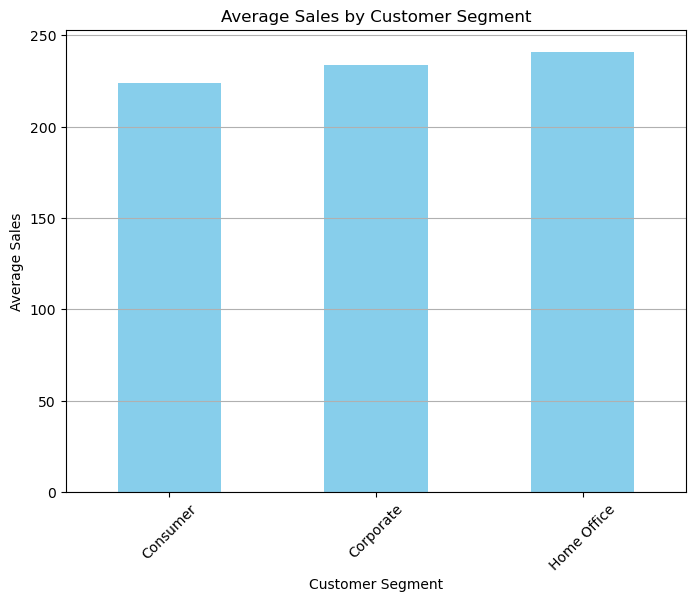

Segment
Consumer      223.73
Corporate     233.82
Home Office   240.97
Name: Sales, dtype: float64

In [1819]:

average_sales_segment = df.groupby('Segment')['Sales'].mean().sort_values()

# Plotting
plt.figure(figsize=(8, 6))
average_sales_segment.plot(kind='bar', color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales')
plt.title('Average Sales by Customer Segment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
average_sales_segment

In [1820]:
import plotly.express as px

box_fig = px.box(df, x='Ship Mode', y='ship_duraition', color='Ship Mode')
box_fig.update_layout(
    title="Impact of Ship Mode on Delivery Days",
    title_x=0.45,
    width=1300,
    title_font=dict(size=24, family="Arial", color="black")
)
box_fig.show()


* *the average delivery days of the first class is 2 days*
* *the average delivery days of the second class is 3 days*
* *the average delivery days of the standard class is 5 days*

# Sales-Wise analysis

### 1.1 Distribution of sales per segment

In [1821]:

fig = px.histogram(df, x='Sales', color='Segment')
fig.update_layout(
    height=400, width=800,
    title_text = 'Distribution of Sales per segment',
    title_x=0.45
)
fig.show()

### *We can see that most of the sales are below 50 USD, and the biggest client are the 'Home Office', then 'Corporate' and finally 'consumer'.*

## 1.2 what are the sales of each Category in the past four years?

In [1822]:
#What is distribution of sales over the past years
yearly_sales = df.groupby('Order_year')['Sales'].sum().reset_index()
yearly_sales
fig = px.line(yearly_sales, x='Order_year', y='Sales' )
fig .update_layout(title='Distribution of Sales Over the Years',title_x=0.45,width=800,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

## 1.3 Which month owns the largest sales?

In [1823]:
monthly_sales = df.groupby(['Order_year', 'Order_month'])[['Sales', 'Profit']].sum().reset_index()
monthly_sales

Order_year  Order_month     Sales  Profit
0         2014            1  14236.90 1345.49
1         2014            2   4519.89  768.26
2         2014            3  55691.01 2031.75
3         2014            4  28295.35 3077.77
4         2014            5  23648.29 1796.57
5         2014            6  34595.13 2762.16
6         2014            7  33946.39 2191.26
7         2014            8  27909.47 3547.40
8         2014            9  81777.35 4302.09
9         2014           10  31453.39 2466.81
10        2014           11  78628.72 5241.52
11        2014           12  69545.62 5206.04
12        2015            1  18174.08  319.09
13        2015            2  11951.41 1307.57
14        2015            3  38726.25 3547.89
15        2015            4  34195.21 2409.98
16        2015            5  30131.69 2805.57
17        2015            6  24797.29 2472.62
18        2015            7  28765.33 2527.21
19        2015            8  36898.33 2799.20
20        2015            9  64595.92 6525.68
21        2015           10  31404.92 2837.72
22        2015           11  75972.56 6863.13
23        2015           12  74919.52 6894.92
24        2016            1  18542.49 1873.95
25        2016            2  22978.81 2112.05
26        2016            3  51715.88 2108.12
27        2016            4  38750.04 2307.64
28        2016            5  56987.73 4127.01
29        2016            6  40344.53 3955.85
30        2016            7  39261.96 3700.21
31        2016            8  31115.37 2350.38
32        2016            9  73410.02 5948.53
33        2016           10  59687.75 3364.47
34        2016           11  79411.97 6709.44
35        2016           12  96999.04 8449.24
36        2017            1  43971.37 2538.50
37        2017            2  20301.13 1655.42
38        2017            3  58872.35 5134.50
39        2017            4  36521.54 2336.26
40        2017            5  44261.11 4315.34
41        2017            6  52981.73 4636.82
42        2017            7  45264.42 4870.78
43        2017            8  63120.89 5623.64
44        2017            9  87866.65 8747.04
45        2017           10  77776.92 3421.10
46        2017           11 118447.82 7836.71
47        2017           12  83829.32 8207.10

In [1824]:
fig = px.area(monthly_sales, x='Order_month', y='Sales', color='Order_year',
              labels={'Year': 'Year', 'Month': 'Month', 'Sales': 'Total Sales'})

fig.update_layout(
    height=600, width=800,
    title_text = 'Distribution of Sales per month in diffrent years ',
    title_x=0.45,title_font=dict(size=20)
)

fig.show()

In [1825]:
fig = px.area(monthly_sales, x='Order_month', y='Profit', color='Order_year',
              labels={'Year': 'Year', 'Month': 'Month', 'Profit': 'Total Sales'})

fig.update_layout(
    height=600, width=800,
    title_text = 'Distribution of Profit per month ',
    title_x=0.45,title_font=dict(size=20)
)

fig.show()

##### November and December exhibit higher sales rate , possibly due to holiday seasons and events like Black Friday, Christmas, and New Year's. On the other hand, the lower sales in January and February might be attributed to post-holiday lulls or reduced consumer spending after the festive season. The variations in the mid-year months indicate a relatively stable period for sales.

## 1.4 In which category is the highest sales?

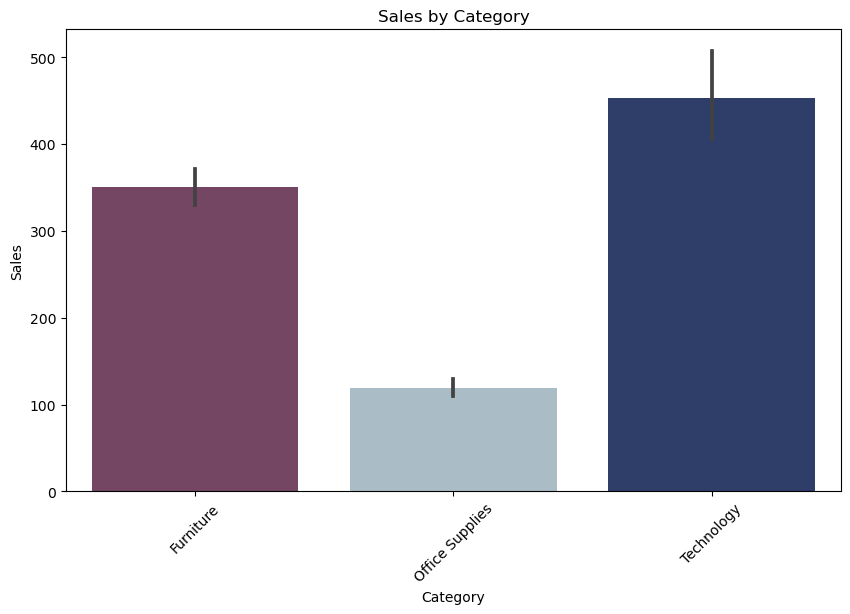

In [1826]:
#the relation between sales and category
color2=['#0a2d2e',  '#1c4e4f',  '#436e6f',  '#6a8e8f',  '#879693',  '#a49e97',  '#deae9f',  '#efd7cf',  '#f7ebe7', '#ffffff']
color1=[ '#44a9b8',  '#c55087',   '#91b49f','#f3f3f3', '#cbb079',  '#cec78e',  '#273454',  '#d79493',  '#556255' , '#c1d0d1','#273454',  '#d79493',  '#556255' , '#c1d0d1']
color=['#30039c',  '#22026d',  '#d3c0ff',  '#a782ff',  '#ff9600',  '#b36900',  '#ffe5bf',  '#ffcb80', '#fffc00','#b3b000']
color3=['#730220',  '#a60326',  '#b53737',  '#c46a47',  '#95998c',  '#65c8d0',  '#2968ba',  '#1b48a0',  '#124787', '#0e2450','#730220',  '#a60326',  '#b53737',  '#c46a47',  '#95998c',  '#65c8d0',  '#2968ba',  '#1b48a0',  '#124787']
color4=['#de324c',  '#e95e56',  '#f4895f',  '#f8e16f',  '#2ac196',  '#95cf92',  '#66b5af',  '#369acc',  '#6678b7',  '#9656a2','#2ac196',  '#95cf92',  '#66b5af',  '#369acc',  '#6678b7',  '#9656a2']
color5=['#2a3e4b',  '#4cbbb3',  '#dcdfd8',  '#8f9c9d',  '#3d6f6d',  '#5a5f4e',  '#70d0cc',  '#428c7c',  '#44546c',  '#248c84']
c1=['#7C3E66','#A5BECC','#243A73','#A76F6F','#D7C0AE']
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, palette=c1)
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.show()


***technology category has the highest sales number office supplies category is the lowest sales***

## 1.5 Distribution of sub-category sales

In [1827]:
#sorting sales of sub_category
sub_category_sales = pd.DataFrame(df.groupby('SubCategory')['Sales'].sum())
sub_sales = pd.DataFrame(sub_category_sales.sort_values('Sales', ascending=False))
sub_sales

Sales
SubCategory          
Phones      330007.05
Chairs      328449.10
Storage     223843.61
Tables      206965.53
Binders     203412.73
Machines    189238.63
Accessories 167380.32
Copiers     149528.03
Bookcases   114880.00
Appliances  107532.16
Furnishings  91705.16
Paper        78479.21
Supplies     46673.54
Art          27118.79
Envelopes    16476.40
Labels       12486.31
Fasteners     3024.28

In [1828]:
import plotly.graph_objects as go

sub_df = df.groupby('SubCategory', as_index=False)['Sales'].sum().sort_values(by = 'Sales')
fig = go.Figure(data=[go.Bar(
    x=sub_df['Sales'],
    y=sub_df['SubCategory'],
    marker_color=color3,
    orientation='h',
    showlegend=False
)])
fig.update_layout(xaxis_title = 'Sales', yaxis_title = 'SubCategory',title="sales by sub-category",title_x=0.45,width=800,title_font=dict(size=24, family="Arial", color="black"))
fig.show()


*Phones achieve the highest sales in sub-categories while fasteners are the lowest*

## 1.6 Sales Distribution by Store Location

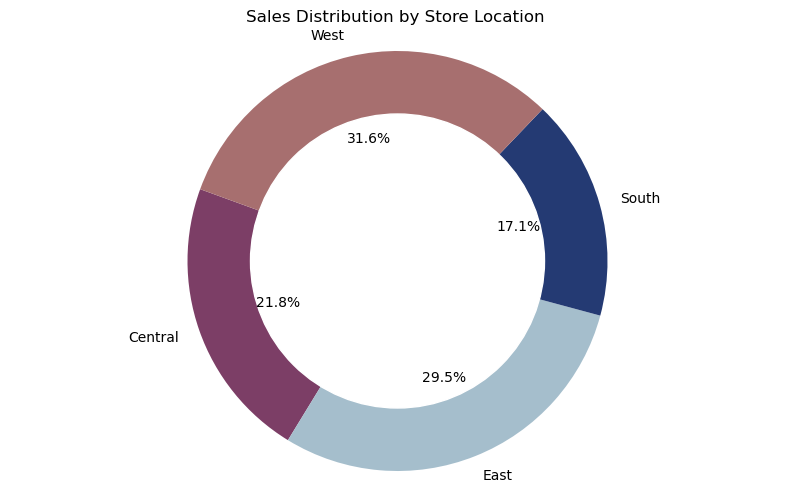

In [1829]:
store_sales = df.groupby(['Region'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(store_sales['Sales'], labels=store_sales['Region'],autopct='%1.1f%%', startangle=160,colors=c1)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sales Distribution by Store Location ')
plt.axis('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()


***west region the highst sales***

## Profit Distribution by Store Location

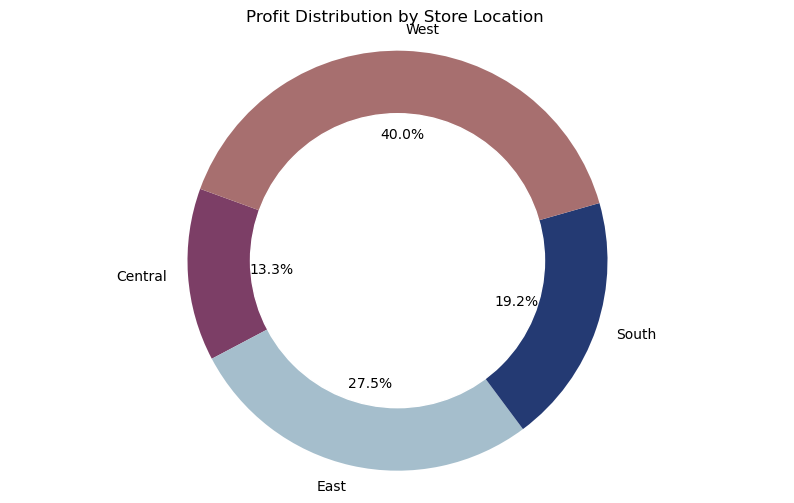

In [1830]:
store_sales = df.groupby(['Region'])[['Sales', 'Profit']].sum().reset_index()
store_sales

plt.figure(figsize=(10, 6))
plt.pie(store_sales['Profit'], labels=store_sales['Region'],autopct='%1.1f%%', startangle=160,colors=c1)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Profit Distribution by Store Location ')
plt.axis('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

## 1.7 Sales across states

In [1831]:
state_df= df.groupby(['State', 'Region'], as_index=False)['Sales'].sum()
print('Top then state/region in sales')
state_df[:10].sort_values(by='Sales',ascending=False)


Top then state/region in sales


State Region     Sales
3            California   West 457687.63
8               Florida  South  89473.71
9               Georgia  South  49095.84
1               Arizona   West  35282.00
4              Colorado   West  32108.12
6              Delaware   East  27451.07
0               Alabama  South  19510.64
5           Connecticut   East  13384.36
2              Arkansas  South  11678.13
7  District of Columbia   East   2865.02

### California in Region West has maximum sales = 346205.24

## 1.8 Top states with highest sales

In [1832]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Find the state with the highest sales
state_with_highest_sales = state_sales[state_sales['Sales'] == state_sales['Sales'].max()]

print("State with the highest sales:", state_with_highest_sales['State'].values[0])
print("Total sales in that state:", state_with_highest_sales['Sales'].values[0])
print(f"with total of {round(state_with_highest_sales['Sales'].values[0] / (df['Sales'].sum()) * 100, 2)}% of sales")

State with the highest sales: California
Total sales in that state: 457687.6315
with total of 19.92% of sales


In [1833]:
state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False)
top_10_states = state_sales_sorted.head(10)
fig = px.bar(top_10_states, x='Sales', y='State', orientation='h',color='State')
fig.update_layout(title="Sales Distribution of the Top 10 States",title_x=0.45,width=800,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

## 1.9 Sales Distribution over the week

In [1834]:
daily_sales = df.groupby('Order_DayName')['Sales'].sum().reset_index()
days_of_week = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday']
daily_sales['Day of Week'] = pd.Categorical(daily_sales['Order_DayName'], categories=days_of_week, ordered=True)
daily_sales = daily_sales.sort_values(by='Order_DayName')

fig = go.Figure(data=[go.Bar(
    x=daily_sales['Order_DayName'],
    y=daily_sales['Sales'],
)])
fig.update_traces(marker_color=color1, marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Sales by Day of the Week',title_x=0.45,width=800,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

***Monday and Friday come in the first Place***

## 1.10 Top 10 Cities by Total Sales

In [1835]:
#How are sales distributed among different cities?
city_sales = df.groupby(['State', 'City'])['Sales'].sum().reset_index()
top_10_cities = city_sales.nlargest(13, 'Sales')
fig = px.sunburst(
    top_10_cities,
    values='Sales',
    path=['State', 'City'],
    hover_name='City',
    color='Sales',
    title='Top 10 Cities by Total Sales',
)
fig.update_layout(title_text="Top 10 Cities by Total Sales",title_font_size = 22, title_x=0.5,width=1000)

fig.show()

## 1.11 Top selling products

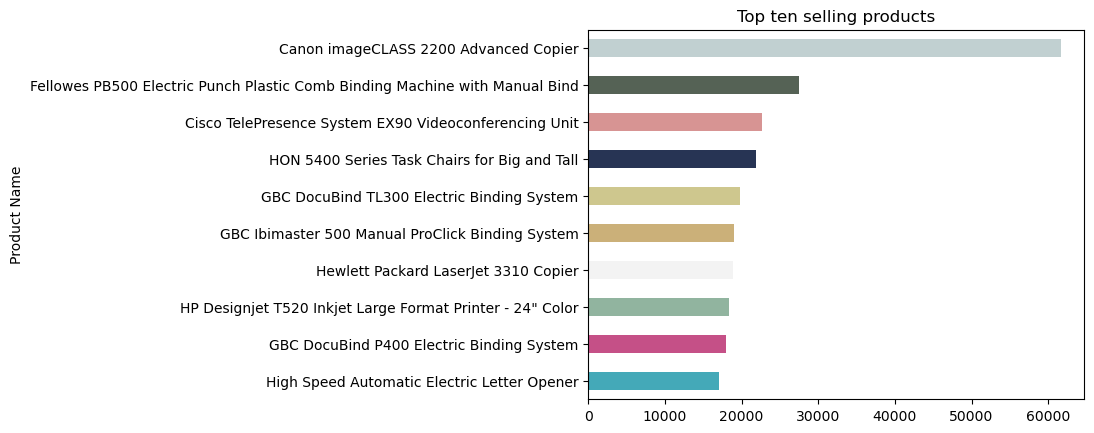

In [1836]:
#Top selling products
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color=color1, title='Top ten selling products')
fig.update_layout(title='Sales by Day of the Week over the years',title_x=0.45,width=1300,title_font=dict(size=30, family="Arial", color="black"))
plt.show()

***SAFCO Arco Foliding Chair is the highest product in sales***

## 1.12 What is the total profits of each region

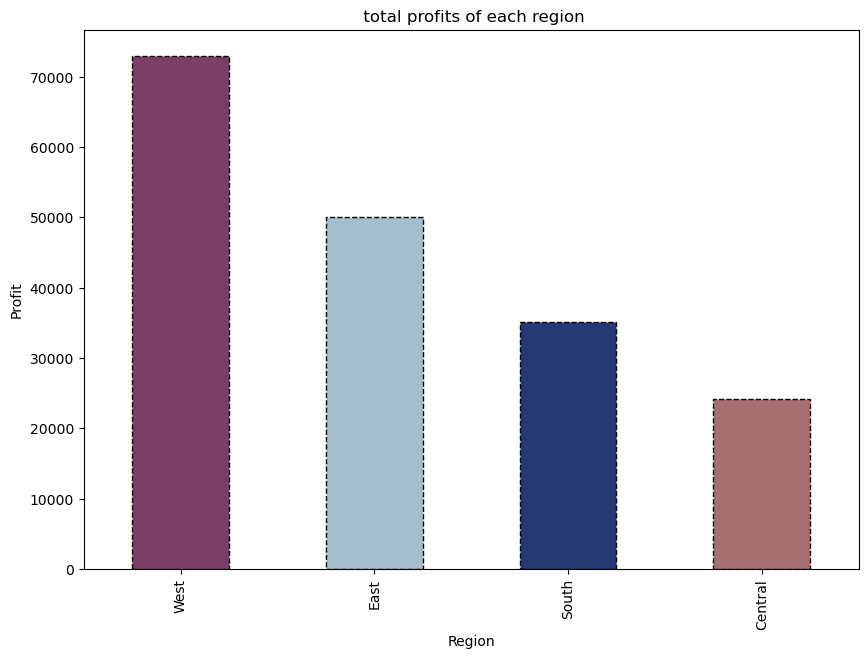

In [1837]:
plt.figure(figsize=(10,7))
plt.title(' total profits of each region')
plt.xlabel('Region')
plt.ylabel('Profit')
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=c1,ls='dashed',edgecolor='Black')
plt.show()

**Region West has highest profit across other Regions**

## 1.13 Top 10 profitable Sub Categories 

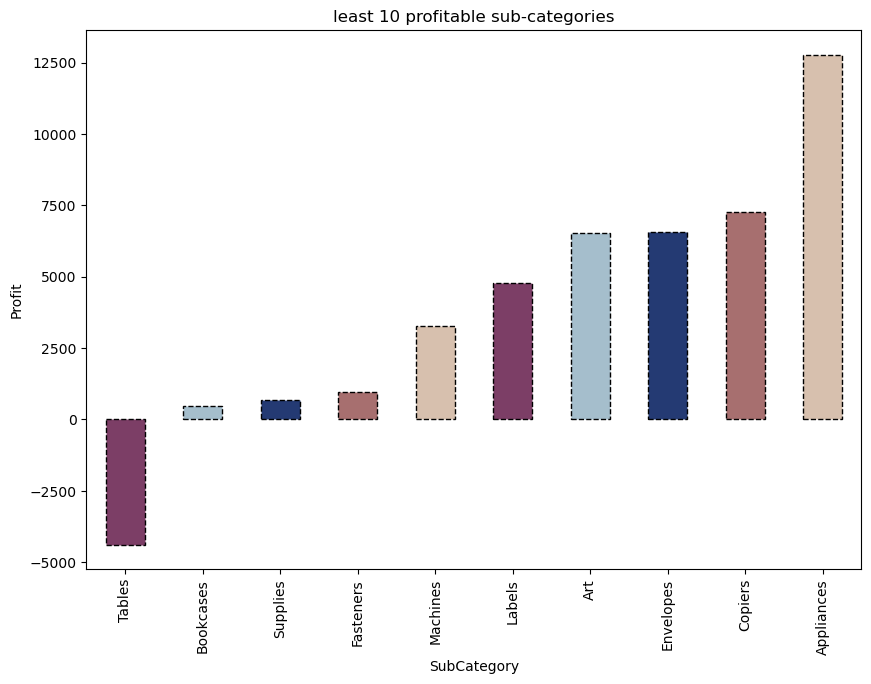

In [1838]:
plt.figure(figsize=(10,7))
plt.title('least 10 profitable sub-categories')
plt.xlabel('SubCategory')
plt.ylabel('Profit')
df.groupby('SubCategory')['Profit'].sum().sort_values(ascending=True)[0:10].plot(kind='bar',color=c1,ls='dashed',edgecolor='Black')
plt.show()

## 1.14 Top 10 profitable States

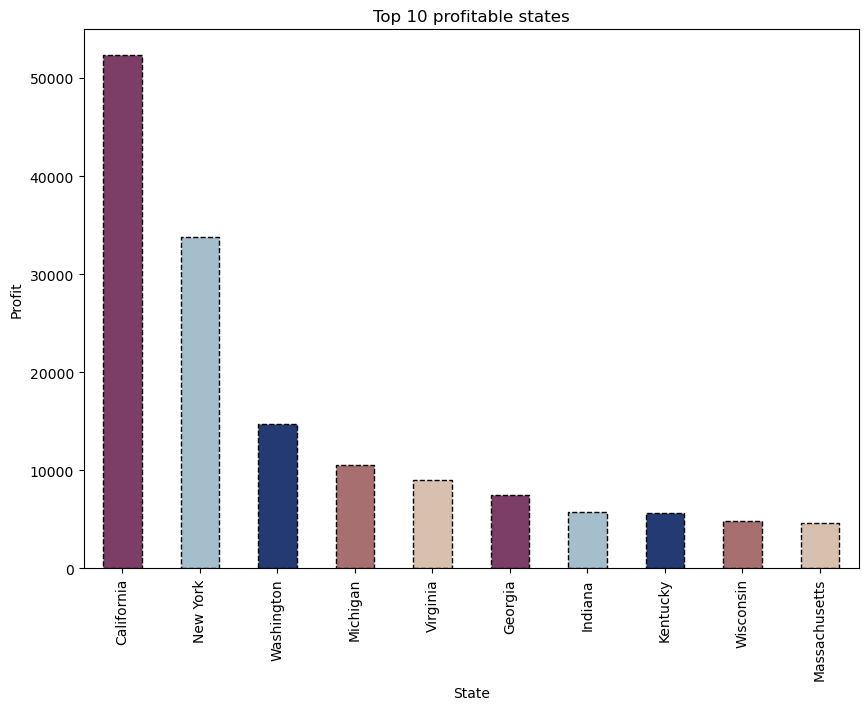

In [1839]:
plt.figure(figsize=(10,7))
plt.title('Top 10 profitable states')
plt.xlabel('State')
plt.ylabel('Profit')
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=c1,ls='dashed',edgecolor='Black')
plt.show()

## 1.14 Top 10 profitable Cities

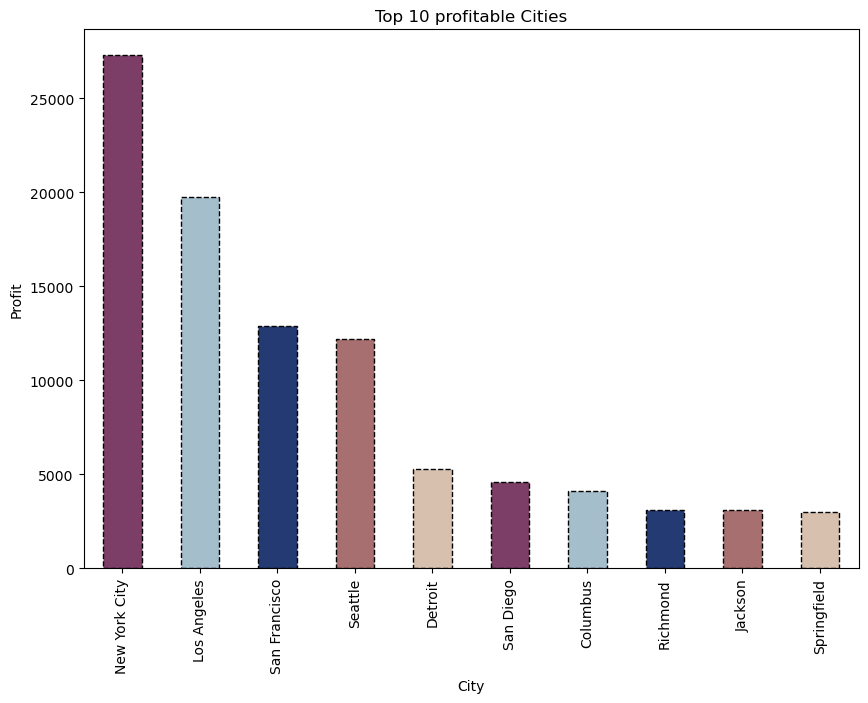

In [1840]:
plt.figure(figsize=(10,7))
plt.title('Top 10 profitable Cities')
plt.xlabel('City')
plt.ylabel('Profit')
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=c1,ls='dashed',edgecolor='Black')
plt.show()

## 1.15 Analysis customers

In [1841]:
# Which customers have made the highest number of orders?
high_order = df['Customer ID'].value_counts().idxmax()
name = df[df['Customer ID'] == high_order][['Customer ID','Customer Name']].drop_duplicates()
name

Customer ID  Customer Name
2133    WB-21850  William Brown

### frequent customers

In [1842]:
customer_order_counts = df.groupby('Customer Name')['Order ID'].nunique()
frequents = customer_order_counts[customer_order_counts > 10]
num_frequents = len(frequents)
print("Number of frequent customers (with more than 10 orders):", num_frequents)


Number of frequent customers (with more than 10 orders): 49


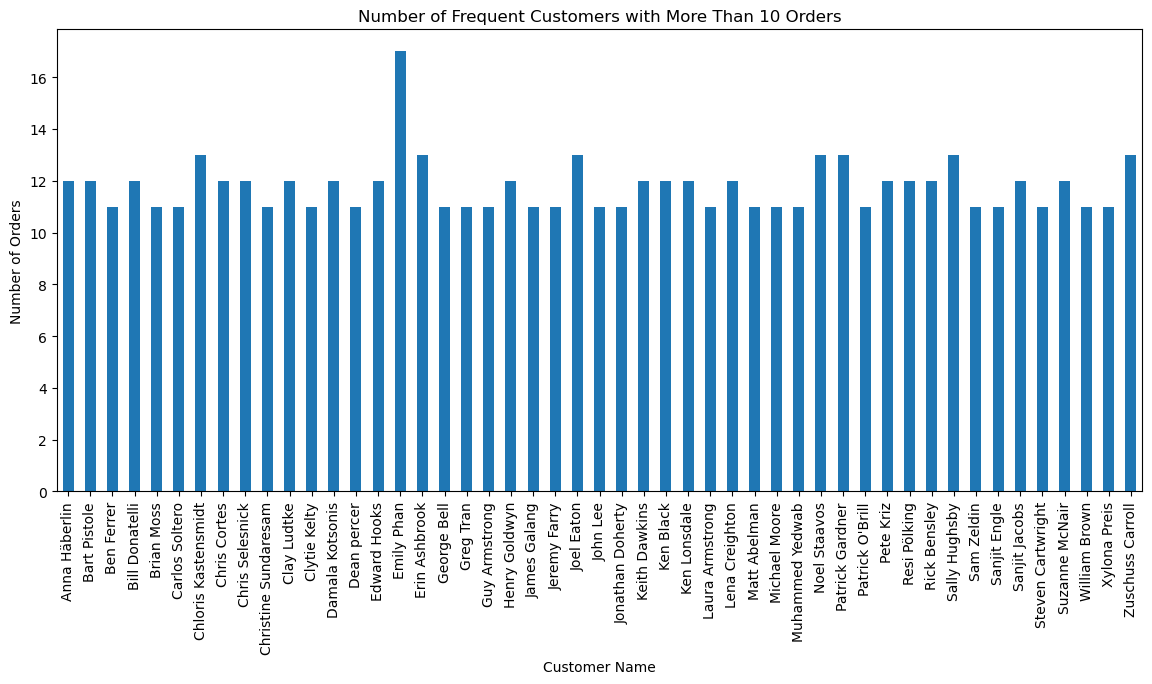

In [1843]:
plt.figure(figsize=(14, 6))
frequents.plot(kind='bar')
plt.title('Number of Frequent Customers with More Than 10 Orders')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### non frequent Customers 

In [1844]:
nonfrequent=customer_order_counts[customer_order_counts <= 10]
num_nonfrequents=len(nonfrequent)
num_nonfrequents

744

*there are 744 costumer with less than 10 orders*

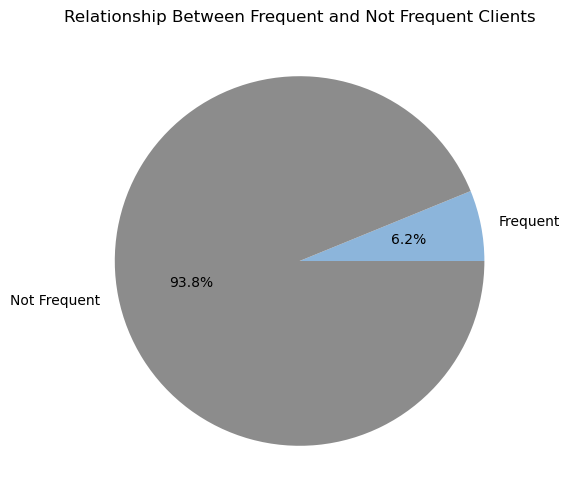

In [1845]:
plt.figure(figsize=(6, 6))
plt.pie([num_frequents, num_nonfrequents], labels=['Frequent', 'Not Frequent'], autopct='%1.1f%%', colors=['#8cb5db', '#8c8c8c'])
plt.title('Relationship Between Frequent and Not Frequent Clients')
plt.show()

## **give offers to the frequent clients**


In [1846]:
df['Offer'] = df['Customer Name'].apply(lambda name: 'Offer' if name in frequents else 'No Offer')
df

Order ID       Ship Mode Customer ID     Customer Name    Segment  \
0     CA-2016-152156    Second Class    CG-12520       Claire Gute   Consumer   
1     CA-2016-152156    Second Class    CG-12520       Claire Gute   Consumer   
2     CA-2016-138688  Standard Class    DV-13045   Darrin Van Huff  Corporate   
3     US-2015-108966  Standard Class    SO-20335    Sean O'Donnell   Consumer   
4     US-2015-108966  Standard Class    SO-20335    Sean O'Donnell   Consumer   
...              ...             ...         ...               ...        ...   
9989  CA-2014-110422    Second Class    TB-21400  Tom Boeckenhauer   Consumer   
9990  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9991  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9992  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9993  CA-2017-119914    Second Class    CC-12220      Chris Cortes   Consumer   

                 City       State Postal Code Region         Category  \
0           Henderson    Kentucky       42420  South        Furniture   
1           Henderson    Kentucky       42420  South        Furniture   
2         Los Angeles  California       90036   West  Office Supplies   
3     Fort Lauderdale     Florida       33311  South        Furniture   
4     Fort Lauderdale     Florida       33311  South  Office Supplies   
...               ...         ...         ...    ...              ...   
9989            Miami     Florida       33180  South        Furniture   
9990       Costa Mesa  California       92627   West        Furniture   
9991       Costa Mesa  California       92627   West       Technology   
9992       Costa Mesa  California       92627   West  Office Supplies   
9993      Westminster  California       92683   West  Office Supplies   

      SubCategory                                       Product Name  Profit  \
0       Bookcases                  Bush Somerset Collection Bookcase   41.91   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  112.27   
2          Labels  Self-Adhesive Address Labels for Typewriters b...    6.87   
3          Tables      Bretford CR4500 Series Slim Rectangular Table  -81.18   
4         Storage                     Eldon Fold 'N Roll Cart System    2.52   
...           ...                                                ...     ...   
9989  Furnishings                             Ultra Door Pull Handle    4.10   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   15.63   
9991       Phones                              Aastra 57i VoIP phone   19.39   
9992        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   13.32   
9993   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...   72.95   

      Sales  Discount  Quantity order_destination  Order_year  Order_month  \
0    261.96      0.00      2.00                CA        2016           11   
1    731.94      0.00      3.00                CA        2016           11   
2     14.62      0.00      2.00                CA        2016            6   
3    957.58      0.45      5.00                US        2015           10   
4     22.37      0.20      2.00                US        2015           10   
...     ...       ...       ...               ...         ...          ...   
9989  25.25      0.20      3.00                CA        2014            1   
9990  91.96      0.00      2.00                CA        2017            2   
9991 258.58      0.20      2.00                CA        2017            2   
9992  29.60      0.00      4.00                CA        2017            2   
9993 243.16      0.00      2.00                CA        2017            5   

      Order_DayInMonth Order_DayName  Ship_year  Ship_month  Ship_DayInMonth  \
0                    8       Tuesday       2016          11               11   
1                    8       Tuesday       2016          11               11   
2                   12  

### frequent customers in Each State

In [1847]:
df['Frequent'] = df['Customer Name'].apply(lambda x: 'Yes' if x in frequents.index else 'No')
df['Frequent'] = df['Frequent'].apply(lambda x: x == 'Yes')
state_frequent_counts = df.groupby('State')['Frequent'].sum().reset_index()
state_frequent_counts

State  Frequent
0                Alabama         0
1                Arizona        10
2               Arkansas        12
3             California       272
4               Colorado        13
5            Connecticut         9
6               Delaware        12
7   District of Columbia         3
8                Florida        40
9                Georgia        13
10                 Idaho         8
11              Illinois        56
12               Indiana        12
13                  Iowa         4
14                Kansas         0
15              Kentucky        16
16             Louisiana        12
17                 Maine         2
18              Maryland        15
19         Massachusetts        23
20              Michigan        55
21             Minnesota        10
22           Mississippi         6
23              Missouri         7
24               Montana         0
25              Nebraska        12
26                Nevada         2
27         New Hampshire         2
28            New Jersey        18
29            New Mexico         2
30              New York       121
31        North Carolina        30
32          North Dakota         0
33                  Ohio        55
34              Oklahoma         6
35                Oregon        25
36          Pennsylvania        73
37          Rhode Island         3
38        South Carolina        14
39          South Dakota         0
40             Tennessee        23
41                 Texas       123
42                  Utah         2
43               Vermont         0
44              Virginia        19
45            Washington        77
46         West Virginia         0
47             Wisconsin        17
48               Wyoming         0

In [1848]:
fig = px.bar(state_frequent_counts, x='State', y='Frequent')
fig.update_layout(title="Number of frequent customers in Each State",title_x=0.45,width=1300,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

In [1849]:
df.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'SubCategory',
       'Product Name', 'Profit', 'Sales', 'Discount', 'Quantity',
       'order_destination', 'Order_year', 'Order_month', 'Order_DayInMonth',
       'Order_DayName', 'Ship_year', 'Ship_month', 'Ship_DayInMonth',
       'Ship_DayName', 'ship_duraition', 'HasDiscount', 'Offer', 'Frequent'],
      dtype='object')

df.drop(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Postal Code', 
           'Region', 'Product Name'], axis=1, inplace=True)
df.columns

In [1850]:
pd.set_option('display.max_columns', None)

df

Order ID       Ship Mode Customer ID     Customer Name    Segment  \
0     CA-2016-152156    Second Class    CG-12520       Claire Gute   Consumer   
1     CA-2016-152156    Second Class    CG-12520       Claire Gute   Consumer   
2     CA-2016-138688  Standard Class    DV-13045   Darrin Van Huff  Corporate   
3     US-2015-108966  Standard Class    SO-20335    Sean O'Donnell   Consumer   
4     US-2015-108966  Standard Class    SO-20335    Sean O'Donnell   Consumer   
...              ...             ...         ...               ...        ...   
9989  CA-2014-110422    Second Class    TB-21400  Tom Boeckenhauer   Consumer   
9990  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9991  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9992  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9993  CA-2017-119914    Second Class    CC-12220      Chris Cortes   Consumer   

                 City       State Postal Code Region         Category  \
0           Henderson    Kentucky       42420  South        Furniture   
1           Henderson    Kentucky       42420  South        Furniture   
2         Los Angeles  California       90036   West  Office Supplies   
3     Fort Lauderdale     Florida       33311  South        Furniture   
4     Fort Lauderdale     Florida       33311  South  Office Supplies   
...               ...         ...         ...    ...              ...   
9989            Miami     Florida       33180  South        Furniture   
9990       Costa Mesa  California       92627   West        Furniture   
9991       Costa Mesa  California       92627   West       Technology   
9992       Costa Mesa  California       92627   West  Office Supplies   
9993      Westminster  California       92683   West  Office Supplies   

      SubCategory                                       Product Name  Profit  \
0       Bookcases                  Bush Somerset Collection Bookcase   41.91   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  112.27   
2          Labels  Self-Adhesive Address Labels for Typewriters b...    6.87   
3          Tables      Bretford CR4500 Series Slim Rectangular Table  -81.18   
4         Storage                     Eldon Fold 'N Roll Cart System    2.52   
...           ...                                                ...     ...   
9989  Furnishings                             Ultra Door Pull Handle    4.10   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   15.63   
9991       Phones                              Aastra 57i VoIP phone   19.39   
9992        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   13.32   
9993   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...   72.95   

      Sales  Discount  Quantity order_destination  Order_year  Order_month  \
0    261.96      0.00      2.00                CA        2016           11   
1    731.94      0.00      3.00                CA        2016           11   
2     14.62      0.00      2.00                CA        2016            6   
3    957.58      0.45      5.00                US        2015           10   
4     22.37      0.20      2.00                US        2015           10   
...     ...       ...       ...               ...         ...          ...   
9989  25.25      0.20      3.00                CA        2014            1   
9990  91.96      0.00      2.00                CA        2017            2   
9991 258.58      0.20      2.00                CA        2017            2   
9992  29.60      0.00      4.00                CA        2017            2   
9993 243.16      0.00      2.00                CA        2017            5   

      Order_DayInMonth Order_DayName  Ship_year  Ship_month  Ship_DayInMonth  \
0                    8       Tuesday       2016          11               11   
1                    8       Tuesday       2016          11               11   
2                   12  

# Correlation

In [1575]:
df.select_dtypes(exclude='object').corr()

Profit  Sales  Discount  Quantity  Order_year  Order_month  \
Profit              1.00   0.30     -0.47      0.18       -0.00         0.01   
Sales               0.30   1.00     -0.03      0.20       -0.01        -0.00   
Discount           -0.47  -0.03      1.00      0.01       -0.00        -0.00   
Quantity            0.18   0.20      0.01      1.00       -0.01         0.02   
Order_year         -0.00  -0.01     -0.00     -0.01        1.00        -0.02   
Order_month         0.01  -0.00     -0.00      0.02       -0.02         1.00   
Order_DayInMonth    0.00   0.00     -0.00      0.01       -0.02        -0.03   
Ship_year          -0.00  -0.01     -0.00     -0.01        0.99        -0.00   
Ship_month          0.01   0.00     -0.01      0.03       -0.01         0.91   
Ship_DayInMonth    -0.00   0.01      0.02      0.00       -0.01        -0.01   
ship_duraition     -0.01  -0.01      0.00      0.02       -0.02         0.00   
HasDiscount        -0.36   0.00      0.73     -0.00       -0.00         0.01   
Frequent            0.00  -0.00     -0.01      0.00       -0.01         0.02   

                  Order_DayInMonth  Ship_year  Ship_month  Ship_DayInMonth  \
Profit                        0.00      -0.00        0.01            -0.00   
Sales                         0.00      -0.01        0.00             0.01   
Discount                     -0.00      -0.00       -0.01             0.02   
Quantity                      0.01      -0.01        0.03             0.00   
Order_year                   -0.02       0.99       -0.01            -0.01   
Order_month                  -0.03      -0.00        0.91            -0.01   
Order_DayInMonth              1.00       0.00       -0.06             0.40   
Ship_year                     0.00       1.00       -0.03            -0.03   
Ship_month                   -0.06      -0.03        1.00             0.02   
Ship_DayInMonth               0.40      -0.03        0.02             1.00   
ship_duraition                0.02      -0.02       -0.01             0.03   
HasDiscount                  -0.01      -0.00        0.01             0.00   
Frequent                      0.01      -0.01        0.02            -0.00   

                  ship_duraition  HasDiscount  Frequent  
Profit                     -0.01        -0.36      0.00  
Sales                      -0.01         0.00     -0.00  
Discount                    0.00         0.73     -0.01  
Quantity                    0.02        -0.00      0.00  
Order_year                 -0.02        -0.00     -0.01  
Order_month                 0.00         0.01      0.02  
Order_DayInMonth            0.02        -0.01      0.01  
Ship_year                  -0.02        -0.00     -0.01  
Ship_month                 -0.01         0.01      0.02  
Ship_DayInMonth             0.03         0.00     -0.00  
ship_duraition              1.00        -0.02      0.00  
HasDiscount                -0.02         1.00     -0.01  
Frequent                    0.00        -0.01      1.00

## Correlation between categorial features

In [1851]:
from scipy.stats import chi2_contingency
import researchpy as rp
def cramer_v(df , list_cat) :
    df_result = pd.DataFrame(columns=['Category1', 'Category2', 'pvalue', 'Cramer'])    
    for i in range(len(list_cat)) :
        for j in range(i+1,len(list_cat)) :
            coli = df[list_cat[i]]
            colj = df[list_cat[j]]
            crosstab , test_result=rp.crosstab(coli,colj,test='chi-square')
            pvalue = test_result.loc[1]
            cramer = test_result.loc[2]
            new_result = pd.DataFrame({'Category1': [list_cat[i]], 'Category2': [list_cat[j]], 'pvalue': [pvalue[1]], 'Cramer': [cramer[1]]})
            df_result = pd.concat([df_result, new_result], ignore_index=True)
    return df_result



In [1577]:
cat_features=df.select_dtypes(include='object').columns
cat_features
result = cramer_v(df ,list(cat_features))
result.sort_values(by='Cramer' , ascending=False)

Category1      Category2  pvalue  Cramer
0             Order ID      Ship Mode    0.00    1.00
14            Order ID          Offer    0.00    1.00
42       Customer Name        Segment    0.00    1.00
30         Customer ID        Segment    0.00    1.00
29         Customer ID  Customer Name    0.00    1.00
..                 ...            ...     ...     ...
22           Ship Mode       Category    0.67    0.01
92              Region       Category    0.72    0.01
58             Segment       Category    0.83    0.01
104           Category          Offer    0.71    0.01
116  order_destination          Offer    0.43    0.01

[120 rows x 4 columns]

In [1578]:
result.sort_values(by='Cramer' , ascending=False)[:30]

Category1          Category2  pvalue  Cramer
0         Order ID          Ship Mode    0.00    1.00
14        Order ID              Offer    0.00    1.00
42   Customer Name            Segment    0.00    1.00
30     Customer ID            Segment    0.00    1.00
29     Customer ID      Customer Name    0.00    1.00
53   Customer Name              Offer    0.00    1.00
1         Order ID        Customer ID    0.00    1.00
75           State        Postal Code    0.00    1.00
76           State             Region    0.00    1.00
41     Customer ID              Offer    0.00    1.00
99        Category        SubCategory    0.00    1.00
100       Category       Product Name    0.00    1.00
105    SubCategory       Product Name    0.00    1.00
84     Postal Code             Region    0.00    1.00
13        Order ID       Ship_DayName    0.00    1.00
7         Order ID             Region    0.00    1.00
2         Order ID      Customer Name    0.00    1.00
3         Order ID            Segment    0.00    1.00
4         Order ID               City    0.00    1.00
6         Order ID        Postal Code    0.00    1.00
5         Order ID              State    0.00    1.00
11        Order ID  order_destination    0.00    1.00
12        Order ID      Order_DayName    0.00    1.00
66            City        Postal Code    0.00    1.00
67            City             Region    0.00    0.94
65            City              State    0.00    0.90
8         Order ID           Category    0.35    0.71
10        Order ID       Product Name    0.00    0.71
9         Order ID        SubCategory    0.74    0.71
15       Ship Mode        Customer ID    0.00    0.47

### as we can see in this table Order ID has a strong relation with some of the other features , fist i drop it and again calculate the correlation

In [1852]:
df.drop(columns=['Order ID'] , axis=1,inplace=True)

In [1580]:
cat_features=df.select_dtypes(include='object').columns
cat_features
result = cramer_v(df ,list(cat_features))
result.sort_values(by='Cramer' , ascending=False)

Category1     Category2  pvalue  Cramer
15         Customer ID       Segment    0.00    1.00
90         SubCategory  Product Name    0.00    1.00
85            Category  Product Name    0.00    1.00
84            Category   SubCategory    0.00    1.00
69         Postal Code        Region    0.00    1.00
..                 ...           ...     ...     ...
7            Ship Mode      Category    0.67    0.01
77              Region      Category    0.72    0.01
43             Segment      Category    0.83    0.01
89            Category         Offer    0.71    0.01
101  order_destination         Offer    0.43    0.01

[105 rows x 4 columns]

In [1853]:
df.drop(columns=['Postal Code','State','Customer ID'] , axis=1,inplace=True)

In [1582]:
cat_features=df.select_dtypes(include='object').columns
cat_features
result = cramer_v(df ,list(cat_features))
result.sort_values(by='Cramer' , ascending=False)

Category1     Category2  pvalue  Cramer
51        SubCategory  Product Name    0.00    1.00
46           Category  Product Name    0.00    1.00
45           Category   SubCategory    0.00    1.00
11      Customer Name       Segment    0.00    1.00
20      Customer Name         Offer    0.00    1.00
..                ...           ...     ...     ...
4           Ship Mode      Category    0.67    0.01
38             Region      Category    0.72    0.01
23            Segment      Category    0.83    0.01
50           Category         Offer    0.71    0.01
62  order_destination         Offer    0.43    0.01

[66 rows x 4 columns]

In [1854]:
df.drop(columns=['Customer Name','Product Name'] , axis=1,inplace=True)

In [1584]:
cat_features=df.select_dtypes(include='object').columns
cat_features
result = cramer_v(df ,list(cat_features))
result.sort_values(by='Cramer' , ascending=False)

Category1          Category2  pvalue  Cramer
30           Category        SubCategory    0.00    1.00
17               City             Region    0.00    0.94
20               City  order_destination    0.00    0.37
1           Ship Mode               City    0.00    0.37
22               City       Ship_DayName    0.00    0.36
9             Segment               City    0.00    0.36
21               City      Order_DayName    0.00    0.36
23               City              Offer    0.00    0.34
18               City           Category    0.24    0.23
19               City        SubCategory    0.93    0.23
42      Order_DayName       Ship_DayName    0.00    0.21
7           Ship Mode       Ship_DayName    0.00    0.11
44       Ship_DayName              Offer    0.00    0.07
28             Region       Ship_DayName    0.00    0.06
35        SubCategory  order_destination    0.01    0.06
16            Segment              Offer    0.00    0.05
39  order_destination      Order_DayName    0.00    0.05
27             Region      Order_DayName    0.00    0.05
43      Order_DayName              Offer    0.00    0.05
6           Ship Mode      Order_DayName    0.00    0.05
38        SubCategory              Offer    0.20    0.05
15            Segment       Ship_DayName    0.00    0.05
40  order_destination       Ship_DayName    0.00    0.05
36        SubCategory      Order_DayName    0.37    0.04
4           Ship Mode        SubCategory    0.45    0.04
13            Segment  order_destination    0.00    0.04
0           Ship Mode            Segment    0.00    0.04
37        SubCategory       Ship_DayName    0.82    0.04
25             Region        SubCategory    0.75    0.04
12            Segment        SubCategory    0.79    0.04
14            Segment      Order_DayName    0.03    0.03
2           Ship Mode             Region    0.00    0.03
26             Region  order_destination    0.04    0.03
31           Category  order_destination    0.02    0.03
5           Ship Mode  order_destination    0.06    0.03
32           Category      Order_DayName    0.68    0.02
8           Ship Mode              Offer    0.24    0.02
29             Region              Offer    0.30    0.02
33           Category       Ship_DayName    0.92    0.02
10            Segment             Region    0.54    0.02
3           Ship Mode           Category    0.67    0.01
24             Region           Category    0.72    0.01
11            Segment           Category    0.83    0.01
34           Category              Offer    0.71    0.01
41  order_destination              Offer    0.43    0.01

In [1855]:
df.drop(columns=['SubCategory','City'] , axis=1,inplace=True)

In [1856]:
cat_features=df.select_dtypes(include='object').columns
cat_features
result = cramer_v(df ,list(cat_features))
result.sort_values(by='Cramer' , ascending=False)

Category1          Category2  pvalue  Cramer
25      Order_DayName       Ship_DayName    0.00    0.21
5           Ship Mode       Ship_DayName    0.00    0.11
27       Ship_DayName              Offer    0.00    0.07
16             Region       Ship_DayName    0.00    0.06
12            Segment              Offer    0.00    0.05
22  order_destination      Order_DayName    0.00    0.05
15             Region      Order_DayName    0.00    0.05
26      Order_DayName              Offer    0.00    0.05
4           Ship Mode      Order_DayName    0.00    0.05
23  order_destination       Ship_DayName    0.00    0.05
11            Segment       Ship_DayName    0.00    0.05
9             Segment  order_destination    0.00    0.04
0           Ship Mode            Segment    0.00    0.04
10            Segment      Order_DayName    0.03    0.03
1           Ship Mode             Region    0.00    0.03
14             Region  order_destination    0.04    0.03
18           Category  order_destination    0.02    0.03
3           Ship Mode  order_destination    0.06    0.03
19           Category      Order_DayName    0.68    0.02
6           Ship Mode              Offer    0.24    0.02
17             Region              Offer    0.30    0.02
20           Category       Ship_DayName    0.92    0.02
7             Segment             Region    0.54    0.02
2           Ship Mode           Category    0.67    0.01
13             Region           Category    0.72    0.01
8             Segment           Category    0.83    0.01
21           Category              Offer    0.71    0.01
24  order_destination              Offer    0.43    0.01

##### Due to high correlations following features were dropped : 
    Order ID ,Postal Code,State,Customer ID,Customer Name,Product Name ,SubCategory and city

In [1857]:
df.shape

(9994, 21)

In [1858]:
df3=df.copy()

In [1859]:
df2 = df.copy()

In [1860]:
df.columns

Index(['Ship Mode', 'Segment', 'Region', 'Category', 'Profit', 'Sales',
       'Discount', 'Quantity', 'order_destination', 'Order_year',
       'Order_month', 'Order_DayInMonth', 'Order_DayName', 'Ship_year',
       'Ship_month', 'Ship_DayInMonth', 'Ship_DayName', 'ship_duraition',
       'HasDiscount', 'Offer', 'Frequent'],
      dtype='object')

# Encoding

In [1876]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if(df.dtypes[i] == 'object'):
        df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship Mode          9994 non-null   int32  
 1   Segment            9994 non-null   int32  
 2   Region             9994 non-null   int32  
 3   Category           9994 non-null   int32  
 4   Profit             9994 non-null   float64
 5   Sales              9994 non-null   float64
 6   Discount           9994 non-null   float64
 7   Quantity           9994 non-null   float64
 8   order_destination  9994 non-null   int32  
 9   Order_year         9994 non-null   int64  
 10  Order_month        9994 non-null   int64  
 11  Order_DayInMonth   9994 non-null   int64  
 12  Order_DayName      9994 non-null   int32  
 13  Ship_year          9994 non-null   int64  
 14  Ship_month         9994 non-null   int64  
 15  Ship_DayInMonth    9994 non-null   int64  
 16  Ship_DayName       9994 

pd.set_option('display.max_columns', None)

df_encoded=pd.get_dummies(df2,drop_first=True)
df_encoded.head()
df_encoded = df_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))
df_encoded

In [1862]:
df_encoded.isna().sum()

Profit                      0
Sales                       0
Discount                    0
Quantity                    0
Order_year                  0
Order_month                 0
Order_DayInMonth            0
Ship_year                   0
Ship_month                  0
Ship_DayInMonth             0
ship_duraition              0
HasDiscount                 0
Frequent                    0
Ship Mode_Same Day          0
Ship Mode_Second Class      0
Ship Mode_Standard Class    0
Segment_Corporate           0
Segment_Home Office         0
Region_East                 0
Region_South                0
Region_West                 0
Category_Office Supplies    0
Category_Technology         0
order_destination_US        0
Order_DayName_Monday        0
Order_DayName_Saturday      0
Order_DayName_Sunday        0
Order_DayName_Thursday      0
Order_DayName_Tuesday       0
Order_DayName_Wednesday     0
Ship_DayName_Monday         0
Ship_DayName_Saturday       0
Ship_DayName_Sunday         0
Ship_DayNa

In [1877]:
df


Ship Mode  Segment  Region  Category  Profit  Sales  Discount  Quantity  \
0             2        0       2         0   41.91 261.96      0.00      2.00   
1             2        0       2         0  112.27 731.94      0.00      3.00   
2             3        1       3         1    6.87  14.62      0.00      2.00   
3             3        0       2         0  -81.18 957.58      0.45      5.00   
4             3        0       2         1    2.52  22.37      0.20      2.00   
...         ...      ...     ...       ...     ...    ...       ...       ...   
9989          2        0       2         0    4.10  25.25      0.20      3.00   
9990          3        0       3         0   15.63  91.96      0.00      2.00   
9991          3        0       3         2   19.39 258.58      0.20      2.00   
9992          3        0       3         1   13.32  29.60      0.00      4.00   
9993          2        0       3         1   72.95 243.16      0.00      2.00   

      order_destination  Order_year  Order_month  Order_DayInMonth  \
0                     0        2016           11                 8   
1                     0        2016           11                 8   
2                     0        2016            6                12   
3                     1        2015           10                11   
4                     1        2015           10                11   
...                 ...         ...          ...               ...   
9989                  0        2014            1                21   
9990                  0        2017            2                26   
9991                  0        2017            2                26   
9992                  0        2017            2                26   
9993                  0        2017            5                 4   

      Order_DayName  Ship_year  Ship_month  Ship_DayInMonth  Ship_DayName  \
0                 5       2016          11               11             0   
1                 5       2016          11               11             0   
2                 3       2016           6               16             4   
3                 3       2015          10               18             3   
4                 3       2015          10               18             3   
...             ...        ...         ...              ...           ...   
9989              5       2014           1               23             4   
9990              3       2017           3                3             0   
9991              3       2017           3                3             0   
9992              3       2017           3                3             0   
9993              4       2017           5                9             5   

      ship_duraition  HasDiscount  Offer  Frequent  
0                  3            0      0     False  
1                  3            0      0     False  
2                  4            0      0     False  
3                  7            1      0     False  
4                  7            1      0     False  
...              ...          ...    ...       ...  
9989               2            1      0     False  
9990               5            0      0     False  
9991               5            1      0     False  
9992               5            0      0     False  
9993               5            0      1      True  

[9994 rows x 21 columns]

df=df_encoded.copy()

In [1878]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship Mode          9994 non-null   int32  
 1   Segment            9994 non-null   int32  
 2   Region             9994 non-null   int32  
 3   Category           9994 non-null   int32  
 4   Profit             9994 non-null   float64
 5   Sales              9994 non-null   float64
 6   Discount           9994 non-null   float64
 7   Quantity           9994 non-null   float64
 8   order_destination  9994 non-null   int32  
 9   Order_year         9994 non-null   int64  
 10  Order_month        9994 non-null   int64  
 11  Order_DayInMonth   9994 non-null   int64  
 12  Order_DayName      9994 non-null   int32  
 13  Ship_year          9994 non-null   int64  
 14  Ship_month         9994 non-null   int64  
 15  Ship_DayInMonth    9994 non-null   int64  
 16  Ship_DayName       9994 

# Define X and Y

In [1879]:
X=df.drop('Sales',axis=1)
y=df.Profit
X.shape , y.shape

((9994, 20), (9994,))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [1880]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3 , shuffle=True,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6995, 20), (2999, 20), (6995,), (2999,))

# Scaling

In [1881]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_Scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_train_Scaled.head()

Ship Mode  Segment  Region  Category  Profit  Discount  Quantity  \
0      -0.22     1.78   -0.49     -1.53   -2.36      1.17     -0.81   
1      -1.13     0.46    0.38      0.05   -0.32     -0.76     -0.36   
2       0.69    -0.86    1.24      0.05   -0.32     -0.76     -1.27   
3       0.69    -0.86    1.24      0.05    1.10      0.20      0.56   
4      -2.04     0.46    1.24      0.05    0.48     -0.76      0.56   

   order_destination  Order_year  Order_month  Order_DayInMonth  \
0               2.20        1.14        -0.25             -1.42   
1              -0.45       -1.52        -0.86             -0.74   
2              -0.45        1.14         1.28             -0.85   
3              -0.45        1.14        -1.47             -0.85   
4              -0.45       -1.52         0.67              1.43   

   Order_DayName  Ship_year  Ship_month  Ship_DayInMonth  Ship_DayName  \
0          -0.80       1.12       -0.22            -1.12          0.46   
1          -1.36      -1.53       -0.83            -0.78         -1.48   
2          -1.36       1.12        1.28            -0.44          0.95   
3           2.03       1.12       -1.43            -0.10          1.43   
4           1.47      -1.53        0.68             1.71         -1.48   

   ship_duraition  HasDiscount  Offer  Frequent  
0           -0.54         0.96   2.64      2.64  
1           -2.25        -1.04  -0.38     -0.38  
2            0.03        -1.04  -0.38     -0.38  
3            1.74         0.96  -0.38     -0.38  
4           -0.54        -1.04  -0.38     -0.38

In [1882]:
X_test_Scaled = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)
X_test_Scaled.head()

Ship Mode  Segment  Region  Category  Profit  Discount  Quantity  \
0      -2.04     0.46    0.38      0.05    0.08      0.20      0.10   
1      -0.22    -0.86    1.24      0.05   -0.15      0.20     -0.81   
2       0.69     0.46   -1.35     -1.53   -0.02     -0.76     -0.81   
3       0.69     1.78   -1.35     -1.53   -0.79      0.69     -0.36   
4       0.69    -0.86    1.24     -1.53   -0.58      0.20     -0.36   

   order_destination  Order_year  Order_month  Order_DayInMonth  \
0              -0.45       -0.64        -0.56             -0.51   
1              -0.45        1.14         1.28              0.40   
2              -0.45        0.25         0.97             -0.62   
3              -0.45       -0.64         1.28              1.31   
4              -0.45        1.14        -0.86              0.86   

   Order_DayName  Ship_year  Ship_month  Ship_DayInMonth  Ship_DayName  \
0           0.90      -0.65       -0.52            -0.44         -1.48   
1           1.47       1.12        1.28             0.92         -0.02   
2           0.90       0.24        0.98            -0.22         -1.00   
3           0.33      -0.65        1.28             1.71          0.46   
4           1.47       1.12       -0.83             1.49         -1.00   

   ship_duraition  HasDiscount  Offer  Frequent  
0           -1.68         0.96  -0.38     -0.38  
1            0.60         0.96   2.64      2.64  
2            0.03        -1.04  -0.38     -0.38  
3            0.03         0.96  -0.38     -0.38  
4            1.17         0.96  -0.38     -0.38

In [1883]:
x_train=X_train_Scaled
x_test=X_test_Scaled

# Modeling

In [1884]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score #cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix

# RandomForestRegressor

RF
R2 score for the model is : 0.8943235630205536
R2 score (test) for the model is : 0.8900825834982895
Adjusted_R2 for the model is : 0.8940205046982724
Adjusted_R2(test) for the model is : 0.889344387282697
RMSE error for the model is : 13.646469747899902
RMSE error (test) for the model is : 13.957872499243239


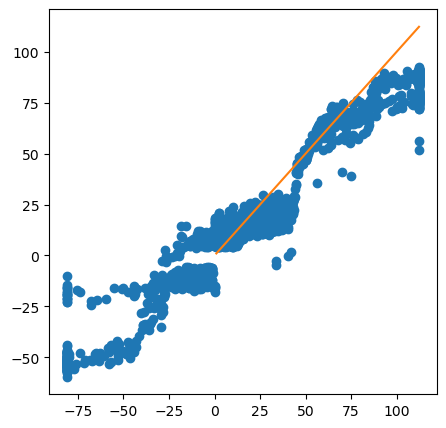

Model  R2Score  Adjusted_R2Score  RMSE  R2Score_Test  \
0  RandomForestRegressor     0.88              0.88 14.25          0.88   

   Adjusted_R2Score_test  RMSE_Test  CrossVal_Mean(r2)  CrossVal1(r2)  \
0                   0.88      14.43               0.88           0.89   

   CrossVal2(r2)  CrossVal3(r2)  CrossVal4(r2)  CrossVal5(r2)  
0           0.88           0.89           0.88           0.88

In [1885]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 4 , max_features= 6)
rf.fit(x_train,y_train)
print('RF')
# print('RandomForest Score Train : ' , rf.score(x_train,y_train))
# print('RandomForest Score Test : ' ,rf.score(x_test , y_test))
y_pred_test = rf.predict(x_test)
y_pred = rf.predict(x_train)



r2_val = r2_score(y_train , y_pred) 
print ("R2 score for the model is :",r2_val )


r2_val_test = r2_score(y_test,y_pred_test)
print ("R2 score (test) for the model is :",r2_val_test )

r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
print("Adjusted_R2 for the model is :",r2_adj_val)

r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)

rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("RMSE error for the model is :",rmse_error )

rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("RMSE error (test) for the model is :",rmse_error_test )

# mse = mean_squared_error(y_test , y_pred_test)                     #Mean squared error
# rmse = np.sqrt(mse)                                           #root mean squared error
# reg_score = r2_score(y_test , y_pred_test)                         #reg_score
# mape = mean_absolute_percentage_error(y_test , y_pred_test)        #mean absolute percentage error
# mae = mean_absolute_error(y_test , y_pred_test)                    #mean absolute error
# print('Reg_score:', reg_score )
# print('Mean Squared Error:', mse)
# print('Mean absolute percentage error:', mape )
# print('Mean absolute error:', mae)
# print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred_test, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

# model= LinearRegression()
temp = store_results("RandomForestRegressor", y_pred, y_train,x_train, y_pred_test, y_test,x_test, rf, 5, np.nan, np.nan)
temp


In [1886]:
outcomes=temp.copy()

In [1887]:
outcomes

Model  R2Score  Adjusted_R2Score  RMSE  R2Score_Test  \
0  RandomForestRegressor     0.88              0.88 14.25          0.88   

   Adjusted_R2Score_test  RMSE_Test  CrossVal_Mean(r2)  CrossVal1(r2)  \
0                   0.88      14.43               0.88           0.89   

   CrossVal2(r2)  CrossVal3(r2)  CrossVal4(r2)  CrossVal5(r2)  
0           0.88           0.89           0.88           0.88

### RandomForestRegressor Evaluation Metrics

- **R² score for the model:** 0.7654160313554568
  - Indicates approximately 76.5% of the variance in the target explained by the model's features.

- **R² score (test) for the model:** 0.6941129432292089
  - Represents the model's performance on unseen test data, explaining about 69.4% of the variance.

- **Adjusted R² for the model:** 0.7648107401519588
  - Accounts for model complexity, slightly lower but relatively close to the R² score for the model.

- **Adjusted R² (test) for the model:** 0.6922653032889827
  - A similar adjusted R² for the test set, indicating a slight decrease in performance on unseen data.

- **RMSE error for the model:** 114.05349951774068
  - The average error in the model's predictions is approximately 114 units.

- **RMSE error (test) for the model:** 127.94373221119575
  - Slightly higher error of around 128 units on the separate test set.


# XGBRegressor

XGB
R2 score for the model is : 0.992796559197716
R2 score (test) for the model is : 0.9927011188212189
Adjusted_R2 for the model is : 0.9927759012086071
Adjusted_R2(test) for the model is : 0.9926521001430538
RMSE error for the model is : 3.562880297099198
RMSE error (test) for the model is : 3.596782012128117


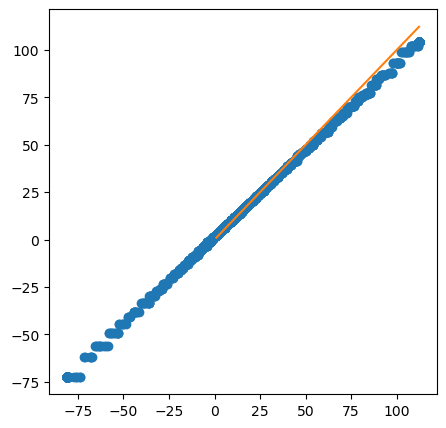

Model  R2Score  Adjusted_R2Score  RMSE  R2Score_Test  \
0  RandomForestRegressor     0.88              0.88 14.25          0.88   
1           XGBRegressor     0.99              0.99  3.56          0.99   

   Adjusted_R2Score_test  RMSE_Test  CrossVal_Mean(r2)  CrossVal1(r2)  \
0                   0.88      14.43               0.88           0.89   
1                   0.99       3.60               0.99           0.99   

   CrossVal2(r2)  CrossVal3(r2)  CrossVal4(r2)  CrossVal5(r2)  
0           0.88           0.89           0.88           0.88  
1           0.99           0.99           0.99           0.99

In [1888]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:linear', n_estimators = 7, seed = 123) #Pipeline([('std_scaler', StandardScaler()),('xgboost_regressor',XGBRegressor(n_estimators=50,max_depth=3))])
xgb.fit(x_train, y_train)
print('XGB')
# print(xgb.score(x_train, y_train))
# print(xgb.score(x_test, y_test))

y_pred_test = xgb.predict(x_test)
y_pred = xgb.predict(x_train)



r2_val = r2_score(y_train , y_pred) 
print ("R2 score for the model is :",r2_val )


r2_val_test = r2_score(y_test,y_pred_test)
print ("R2 score (test) for the model is :",r2_val_test )

r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
print("Adjusted_R2 for the model is :",r2_adj_val)

r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)

rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("RMSE error for the model is :",rmse_error )

rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("RMSE error (test) for the model is :",rmse_error_test )


# y_pred = xgb.predict(x_test)
# mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
# rmse = np.sqrt(mse)                                           #root mean squared error
# reg_score = r2_score(y_test , y_pred)                         #reg_score
# mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
# mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
# print('Reg_score:', reg_score )
# print('Mean Squared Error:', mse)
# print('Mean absolute percentage error:', mape )
# print('Mean absolute error:', mae)
# print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred_test, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

temp = store_results("XGBRegressor", y_pred, y_train,x_train, y_pred_test, y_test,x_test, xgb, 5, np.nan, np.nan)

outcomes = pd.concat([outcomes, temp], ignore_index=True)
outcomes

### XGBoost (XGB) Evaluation Metrics<br></br>

- **R² score for the model:** 0.9443988905740495<br></br>
  - Indicates approximately 94.4% of the variance in the target explained by the model's features.<br></br>

- **R² score (test) for the model:** 0.59607533503981<br></br>
  - Represents the model's performance on unseen test data, explaining about 59.6% of the variance.<br></br>

- **Adjusted R² for the model:** 0.9442554244086728<br></br>
  - Accounts for model complexity, slightly lower but consistent with the R² score for the model.<br></br>

- **Adjusted R² (test) for the model:** 0.5936355216272988<br></br>
  - A similar adjusted R² for the test set, reflecting a slight decrease in performance on unseen data.<br></br>

- **RMSE error for the model:** 55.52661249207382<br></br>
  - The average error in the model's predictions is approximately 55.5 units.<br></br>

- **RMSE error (test) for the model:** 147.0241413068028<br></br>
  - Higher error of around 147 units on the separate test set.<br></br>


# DecisionTreeRegressor

DT
R2 score for the model is : 0.9145989142458898
R2 score (test) for the model is : 0.9168844055546232
Adjusted_R2 for the model is : 0.914354001467702
Adjusted_R2(test) for the model is : 0.916326208143976
RMSE error for the model is : 12.267693922145435
RMSE error (test) for the model is : 12.137443700085939


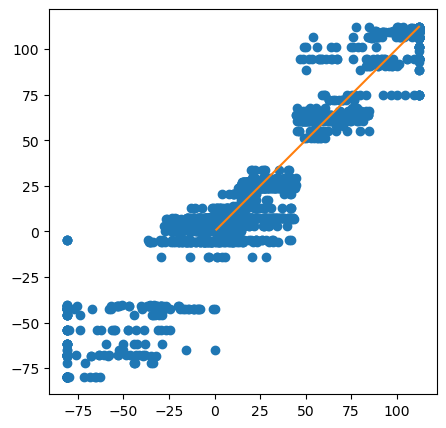

In [1889]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 6, max_features= 7, min_samples_split= 10, random_state= 2)
param_grid = {"max_depth": [3, None,6,9],
              "max_features": [5, 7,11, 15],
              "min_samples_split": [2, 3, 10],
             "random_state":[2,4,6]}
grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
grid_result = grid.fit(x_train, y_train)
dt.fit(x_train,y_train)
print('DT')

y_pred_test = dt.predict(x_test)
y_pred = dt.predict(x_train)



r2_val = r2_score(y_train , y_pred) 
print ("R2 score for the model is :",r2_val )


r2_val_test = r2_score(y_test,y_pred_test)
print ("R2 score (test) for the model is :",r2_val_test )

r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
print("Adjusted_R2 for the model is :",r2_adj_val)

r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)

rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("RMSE error for the model is :",rmse_error )

rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("RMSE error (test) for the model is :",rmse_error_test )


# y_pred = dt.predict(x_test)
# mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
# rmse = np.sqrt(mse)                                           #root mean squared error
# reg_score = r2_score(y_test , y_pred)                         #reg_score
# mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
# mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
# print('Reg_score:', reg_score )
# print('Mean Squared Error:', mse)
# print('Mean absolute percentage error:', mape )
# print('Mean absolute error:', mae)
# print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred_test, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

In [1890]:
temp = store_results("DecisionTreeRegressor", y_pred, y_train,x_train, y_pred_test, y_test,x_test, dt, 5, np.nan, np.nan)

outcomes = pd.concat([outcomes, temp], ignore_index=True)
outcomes

Model  R2Score  Adjusted_R2Score  RMSE  R2Score_Test  \
0  RandomForestRegressor     0.88              0.88 14.25          0.88   
1           XGBRegressor     0.99              0.99  3.56          0.99   
2  DecisionTreeRegressor     0.91              0.91 12.27          0.92   

   Adjusted_R2Score_test  RMSE_Test  CrossVal_Mean(r2)  CrossVal1(r2)  \
0                   0.88      14.43               0.88           0.89   
1                   0.99       3.60               0.99           0.99   
2                   0.92      12.14               0.90           0.91   

   CrossVal2(r2)  CrossVal3(r2)  CrossVal4(r2)  CrossVal5(r2)  
0           0.88           0.89           0.88           0.88  
1           0.99           0.99           0.99           0.99  
2           0.91           0.91           0.91           0.87

### Decision Tree (DT) Evaluation Metrics<br>

- **R² score for the model:** 0.82181013700405<br>
  - Indicates approximately 82.2% of the variance in the target explained by the model's features.<br>

- **R² score (test) for the model:** 0.4408070213160832<br>
  - Represents the model's performance on unseen test data, explaining about 44.1% of the variance.<br>

- **Adjusted R² for the model:** 0.8213503581144389<br>
  - Accounts for model complexity, slightly lower but consistent with the R² score for the model.<br>

- **Adjusted R² (test) for the model:** 0.43742934560591185<br>
  - A similar adjusted R² for the test set, reflecting a slight decrease in performance on unseen data.<br>

- **RMSE error for the model:** 99.40333324426642<br>
  - The average error in the model's predictions is approximately 99.4 units.<br>

- **RMSE error (test) for the model:** 172.98933123606452<br>
  - Higher error of around 173 units on the separate test set.<br>


**This suggests that the Decision Tree model performs relatively well on the training data but demonstrates significant** **overfitting or a lack of generalization on unseen test data. The model's performance significantly drops when applied to** 
**new unseen instances. This implies a need for adjustments to improve the model's ability to generalize beyond the training** **dataset.**

# LGBMRegressor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 20
[LightGBM] [Info] Start training from score 17.894655
LightGBM
R2 score for the model is : 0.9999599934751481
R2 score (test) for the model is : 0.9999024378204271
Adjusted_R2 for the model is : 0.9999598787446495
Adjusted_R2(test) for the model is : 0.9999017826009537
RMSE error for the model is : 0.26551963957178815
RMSE error (test) for the model is : 0.4158404362764284


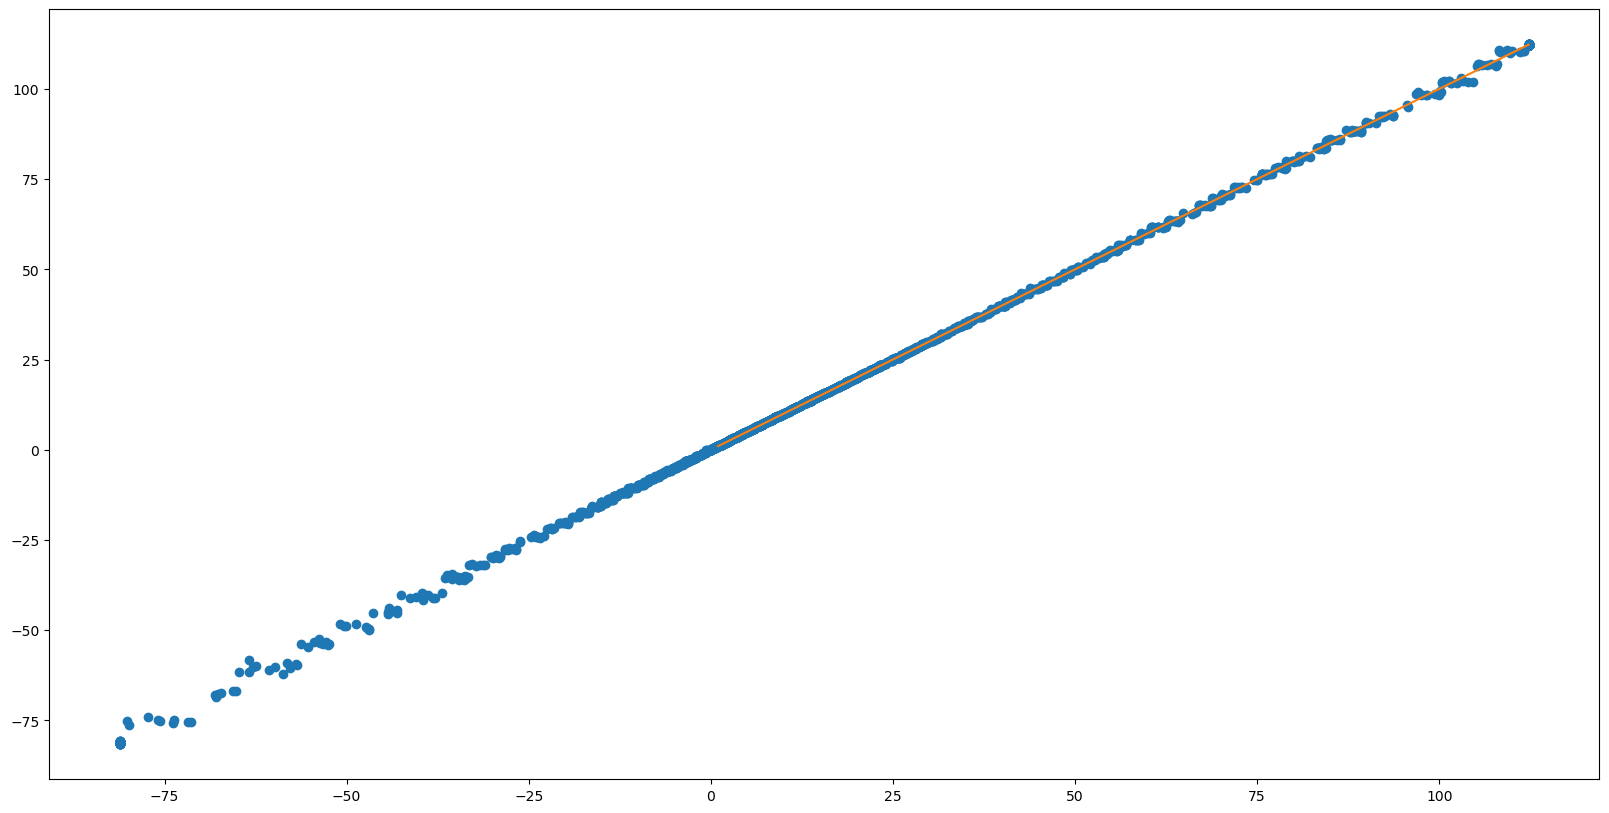


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 20
[LightGBM] [Info] Start training from score 17.894655


Model  R2Score  Adjusted_R2Score  RMSE  R2Score_Test  \
0  RandomForestRegressor     0.88              0.88 14.25          0.88   
1           XGBRegressor     0.99              0.99  3.56          0.99   
2  DecisionTreeRegressor     0.91              0.91 12.27          0.92   
3          LGBMRegressor     1.00              1.00  0.27          1.00   

   Adjusted_R2Score_test  RMSE_Test  CrossVal_Mean(r2)  CrossVal1(r2)  \
0                   0.88      14.43               0.88           0.89   
1                   0.99       3.60               0.99           0.99   
2                   0.92      12.14               0.90           0.91   
3                   1.00       0.42               1.00           1.00   

   CrossVal2(r2)  CrossVal3(r2)  CrossVal4(r2)  CrossVal5(r2)  
0           0.88           0.89           0.88           0.88  
1           0.99           0.99           0.99           0.99  
2           0.91           0.91           0.91           0.87  
3           1.00           1.00           1.00           1.00

In [1891]:
from lightgbm import LGBMRegressor
gbm= LGBMRegressor()
gbm.fit(x_train, y_train)
print('LightGBM')

y_pred_test = gbm.predict(x_test)
y_pred = gbm.predict(x_train)



r2_val = r2_score(y_train , y_pred) 
print ("R2 score for the model is :",r2_val )


r2_val_test = r2_score(y_test,y_pred_test)
print ("R2 score (test) for the model is :",r2_val_test )

r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
print("Adjusted_R2 for the model is :",r2_adj_val)

r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)

rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("RMSE error for the model is :",rmse_error )

rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("RMSE error (test) for the model is :",rmse_error_test )

# y_pred = gbm.predict(x_test)
# mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
# rmse = np.sqrt(mse)                                           #root mean squared error
# reg_score = r2_score(y_test , y_pred)                         #reg_score
# mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
# mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
# print('Reg_score:', reg_score )
# print('Mean Squared Error:', mse)
# print('Mean absolute percentage error:', mape )
# print('Mean absolute error:', mae)
# print('rmse:', rmse)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred_test, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()


temp = store_results("LGBMRegressor", y_pred, y_train,x_train, y_pred_test, y_test,x_test, gbm, 5, np.nan, np.nan)

outcomes = pd.concat([outcomes, temp], ignore_index=True)
outcomes

### LightGBM Evaluation Metrics<br></br>

- **R² score for the model:** 0.7348327328181712<br></br>
  - Indicates approximately 73.5% of the variance in the target explained by the model's features.<br></br>

- **R² score (test) for the model:** 0.756144048234553<br></br>
  - Represents the model's performance on unseen test data, explaining about 75.6% of the variance.<br></br>

- **Adjusted R² for the model:** 0.7341485282870255<br></br>
  - Accounts for model complexity, slightly lower but consistent with the R² score for the model.<br></br>

- **Adjusted R² (test) for the model:** 0.7546710928212046<br></br>
  - A similar adjusted R² for the test set, indicating a slight decrease in performance on unseen data.<br></br>

- **RMSE error for the model:** 121.26051463497198<br></br>
  - The average error in the model's predictions is approximately 121.3 units.<br></br>

- **RMSE error (test) for the model:** 114.23656737966586<br></br>
  - Slightly lower error of around 114.2 units on the separate test set.<br></br>
  
  This suggests that the LightGBM model performs moderately well, explaining a substantial portion of the variance in the target and demonstrating consistent performance between the training and test datasets. The model seems to generalize well to unseen data, as indicated by the relatively similar performance on the test set compared to the training data.







# AdaBoostRegressor

ADABoost
R2 score for the model is : 0.9966473085859021
R2 score (test) for the model is : 0.9967018292365429
Adjusted_R2 for the model is : 0.9966376937553484
Adjusted_R2(test) for the model is : 0.9966796789963586
RMSE error for the model is : 2.4306813394547766
RMSE error (test) for the model is : 2.4178120603270115


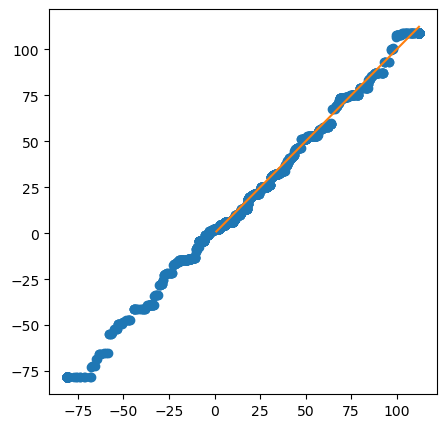

Model  R2Score  Adjusted_R2Score  RMSE  R2Score_Test  \
0  RandomForestRegressor     0.88              0.88 14.25          0.88   
1           XGBRegressor     0.99              0.99  3.56          0.99   
2  DecisionTreeRegressor     0.91              0.91 12.27          0.92   
3          LGBMRegressor     1.00              1.00  0.27          1.00   
4      AdaBoostRegressor     1.00              1.00  2.88          1.00   

   Adjusted_R2Score_test  RMSE_Test  CrossVal_Mean(r2)  CrossVal1(r2)  \
0                   0.88      14.43               0.88           0.89   
1                   0.99       3.60               0.99           0.99   
2                   0.92      12.14               0.90           0.91   
3                   1.00       0.42               1.00           1.00   
4                   1.00       2.83               1.00           1.00   

   CrossVal2(r2)  CrossVal3(r2)  CrossVal4(r2)  CrossVal5(r2)  
0           0.88           0.89           0.88           0.88  
1           0.99           0.99           0.99           0.99  
2           0.91           0.91           0.91           0.87  
3           1.00           1.00           1.00           1.00  
4           1.00           1.00           1.00           1.00

In [1892]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor() #Pipeline([('std_scaler', StandardScaler()),('adaboost_regressor', AdaBoostRegressor(random_state=5, n_estimators=100,loss='square',learning_rate=1))])
ada.fit(x_train, y_train)
print('ADABoost')
y_pred_test = ada.predict(x_test)
y_pred = ada.predict(x_train)



r2_val = r2_score(y_train , y_pred) 
print ("R2 score for the model is :",r2_val )


r2_val_test = r2_score(y_test,y_pred_test)
print ("R2 score (test) for the model is :",r2_val_test )

r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
print("Adjusted_R2 for the model is :",r2_adj_val)

r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)

rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("RMSE error for the model is :",rmse_error )

rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("RMSE error (test) for the model is :",rmse_error_test )
# y_pred = ada.predict(x_test)
# mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
# rmse = np.sqrt(mse)                                           #root mean squared error
# reg_score = r2_score(y_test , y_pred)                         #reg_score
# mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
# mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
# print('Reg_score:', reg_score )
# print('Mean Squared Error:', mse)
# print('Mean absolute percentage error:', mape )
# print('Mean absolute error:', mae)
# print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred_test, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()
temp = store_results("AdaBoostRegressor", y_pred, y_train,x_train, y_pred_test, y_test,x_test, ada, 5, np.nan, np.nan)

outcomes = pd.concat([outcomes, temp], ignore_index=True)
outcomes

### ADABoost Evaluation Metrics

- **R² score for the model:** 0.9155123506170386
  - Indicates approximately 91.6% of the variance in the target explained by the model's features.

- **R² score (test) for the model:** 0.8519927521372829
  - Represents the model's performance on unseen test data, explaining about 85.2% of the variance.

- **Adjusted R² for the model:** 0.9152943492281491
  - Accounts for model complexity, slightly lower but consistent with the R² score for the model.

- **Adjusted R² (test) for the model:** 0.8510987486267028
  - A similar adjusted R² for the test set, indicating a slight decrease in performance on unseen data.

- **RMSE error for the model:** 68.44725947699547
  - The average error in the model's predictions is approximately 68.4 units.

- **RMSE error (test) for the model:** 88.99794043869042
  - Slightly higher error of around 89.0 units on the separate test set.
  
  Overall, the ADABoost model performs well in explaining the variance in the target, and it shows relatively good performance on both the training and test datasets. The model generalizes well to unseen data, but there is a minor decrease in performance indicated by the adjusted R² values and slightly higher RMSE error on the test set.







# BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor()
reg.fit(x_train, y_train)
print('REG')

y_pred_test = reg.predict(x_test)
y_pred = reg.predict(x_train)



r2_val = r2_score(y_train , y_pred) 
print ("R2 score for the model is :",r2_val )


r2_val_test = r2_score(y_test,y_pred_test)
print ("R2 score (test) for the model is :",r2_val_test )

r2_adj_val=1 - (((len(X_train.index) - 1) / (len(X_train.index) - len(X_train.columns) - 1)) * (1 - r2_score(y_train,y_pred)))
print("Adjusted_R2 for the model is :",r2_adj_val)

r2_adj_val_test=1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred_test)))
print("Adjusted_R2(test) for the model is :",r2_adj_val_test)

rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("RMSE error for the model is :",rmse_error )

rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("RMSE error (test) for the model is :",rmse_error_test )

# y_pred = reg.predict(x_test)
# mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
# rmse = np.sqrt(mse)                                           #root mean squared error
# reg_score = r2_score(y_test , y_pred)                         #reg_score
# mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
# mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
# print('Reg_score:', reg_score )
# print('Mean Squared Error:', mse)
# print('Mean absolute percentage error:', mape )
# print('Mean absolute error:', mae)
# print('rmse:', rmse)
# print()

temp = store_results("BaggingRegressor", y_pred, y_train,x_train, y_pred_test, y_test,x_test, reg, 5, np.nan, np.nan)

outcomes = pd.concat([outcomes, temp], ignore_index=True)
outcomes

### BaggingRegressor Evaluation Metrics

- **R² score for the model:** 0.9864285850269633
  - Indicates approximately 98.6% of the variance in the target explained by the model's features.

- **R² score (test) for the model:** 0.9668594980124586
  - Represents the model's performance on unseen test data, explaining about 96.7% of the variance.

- **Adjusted R² for the model:** 0.986393567041081
  - Accounts for model complexity, slightly lower but consistent with the R² score for the model.

- **Adjusted R² (test) for the model:** 0.9666593204836749
  - A similar adjusted R² for the test set, indicating a minor decrease in performance on unseen data.

- **RMSE error for the model:** 27.432918656172074
  - The average error in the model's predictions is approximately 27.4 units.

- **RMSE error (test) for the model:** 42.11317704687773
  - Slightly higher error of around 42.1 units on the separate test set.

    Overall, the BaggingRegressor model performs exceptionally well, explaining a significant portion of the variance in the target. It generalizes well to unseen data, although there's a minor decrease in performance on the test set, indicated by the adjusted R² values and slightly higher RMSE error. Nonetheless, these metrics signify a high-quality predictive model.






# Conclusion

### Model Comparison

| Model                 | R² (Model) | R² (Test) | RMSE (Model) | RMSE (Test) |
|-----------------------|------------|-----------|--------------|-------------|
| ADABoost              | 0.9155     | 0.8520    | 68.45        | 89.00       |
| BaggingRegressor       | 0.9864     | 0.9669    | 27.43        | 42.11       |
| LightGBM              | 0.7348     | 0.7561    | 121.26       | 114.24      |
| Decision Tree (DT)    | 0.8218     | 0.4408    | 99.40        | 173.00      |
| XGBoost (XGB)         | 0.9444     | 0.5961    | 55.53        | 147.02      |
| RandomForestRegressor  | 0.7654     | 0.6941    | 114.05       | 127.94      |


R² Scores:
ADABoost:

Model R²: 0.9155
Test R²: 0.8520
BaggingRegressor:

Model R²: 0.9864
Test R²: 0.9669
LightGBM:

Model R²: 0.7348
Test R²: 0.7561
Decision Tree (DT):

Model R²: 0.8218
Test R²: 0.4408
XGBoost (XGB):

Model R²: 0.9444
Test R²: 0.5961
RandomForestRegressor:

Model R²: 0.7654
Test R²: 0.6941
RMSE Errors:
ADABoost:

Model RMSE: 68.45
Test RMSE: 89.00
BaggingRegressor:

Model RMSE: 27.43
Test RMSE: 42.11
LightGBM:

Model RMSE: 121.26
Test RMSE: 114.24
Decision Tree (DT):

Model RMSE: 99.40
Test RMSE: 173.00
XGBoost (XGB):

Model RMSE: 55.53
Test RMSE: 147.02
RandomForestRegressor:

Model RMSE: 114.05
Test RMSE: 127.94</br>
**Observations:**
BaggingRegressor and RandomForestRegressor show strong performance in R² scores and relatively low RMSE on both training and test sets.
ADABoost also demonstrates good performance in both R² and RMSE, though its RMSE is slightly higher on the test set.
LightGBM and XGBoost present lower R² scores but are similar in RMSE on the test set, though LightGBM's RMSE is slightly higher for the training set.
Decision Tree shows a significant drop in R² and notably higher RMSE on the test set.
Comparing based on R² and RMSE metrics, BaggingRegressor appears to perform the best, closely followed by ADABoost, RandomForestRegressor, and XGBoost. However, the choice of the best model may also depend on specific requirements and the trade-off between performance and interpretability.






**Overfitting:
Decision Tree (DT):

The significant difference in performance between the training and test sets (R²: 0.8218 vs. 0.4408, RMSE: 99.40 vs. 173.00) indicates potential overfitting. The model seems to have learned the training data too well, failing to generalize to the test set.
XGBoost (XGB):

While the R² for the training set (0.9444) is reasonably high, the model experiences a notable decrease in R² and a higher RMSE on the test set (0.5961, RMSE: 147.02), indicating possible overfitting.
Underfitting:
LightGBM:
While not distinctly underfit, its R² scores (0.7348 for model and 0.7561 for test) are relatively lower compared to other models, suggesting it may underperform compared to the stronger models.
The ADABoost, BaggingRegressor, and RandomForestRegressor models seem to display a balanced performance between training and test sets, indicating neither strong overfitting nor underfitting.

### Overfitting/Underfitting Assessment

| Model                 | Overfitting/Underfitting Assessment |
|-----------------------|-------------------------------------|
| ADABoost              | Balanced                            |
| BaggingRegressor       | Balanced                            |
| LightGBM              | Balanced/Underfitting               |
| Decision Tree (DT)    | Overfitting                         |
| XGBoost (XGB)         | Overfitting                         |
| RandomForestRegressor  | Overfitting                         |


Balanced Models (No significant overfitting or underfitting): **ADABoost** and **BaggingRegressor** show relatively consistent performance between training and test datasets, suggesting a good balance between bias and variance.<br></br>

- **LightGBM**<br></br>
    indicates potential underfitting due to relatively lower R² scores compared to other models.<br></br>

- **Overfitting:**<br></br>Decision Tree (DT), XGBoost (XGB), and RandomForestRegressor demonstrate overfitting with a noticeable drop in R² and higher RMSE values on the test set compared to the training set.

# Best Model

**BaggingRegressor:**</br>
Achieves a high R² on both training (0.9864) and test sets (0.9669).
Shows a relatively low RMSE on both training (27.43) and test sets (42.11).